In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import glob
import glob
import obspy  # To handle `.mseed` files
import numpy as np
import polars as pl
from obspy import read
import seaborn as sns
from obspy.signal.trigger import classic_sta_lta
from matplotlib.dates import DateFormatter

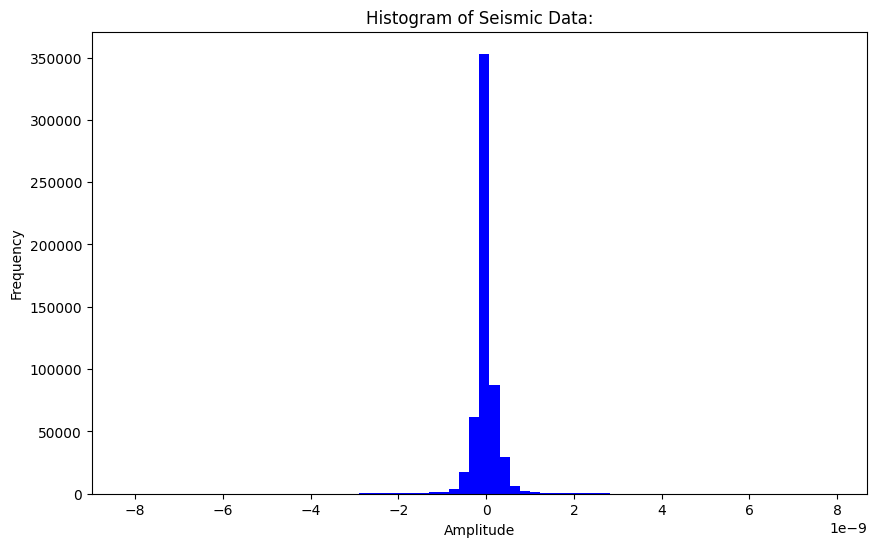

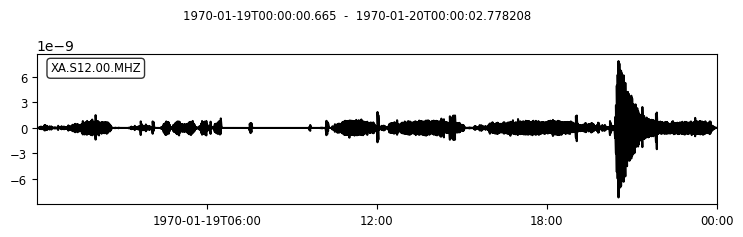

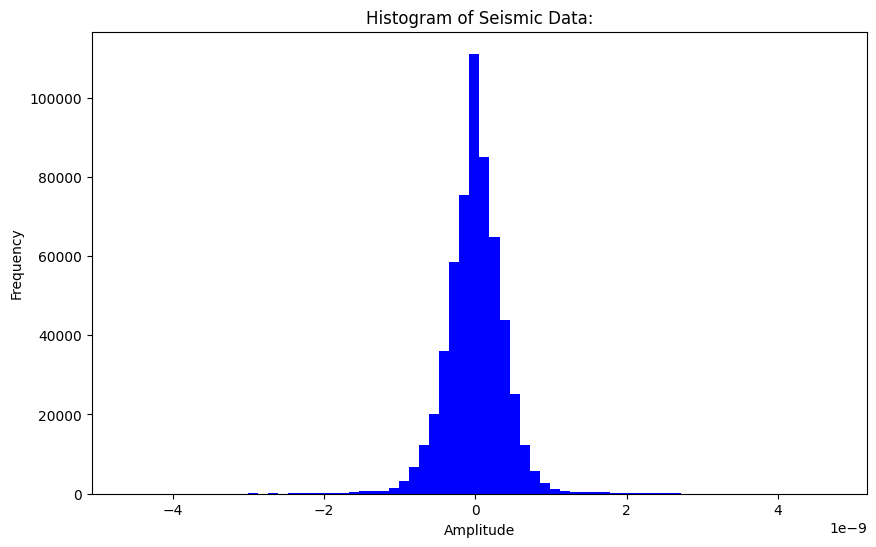

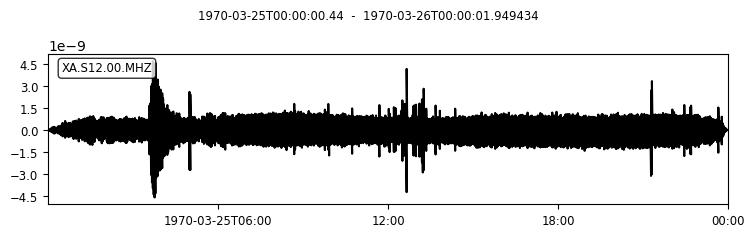

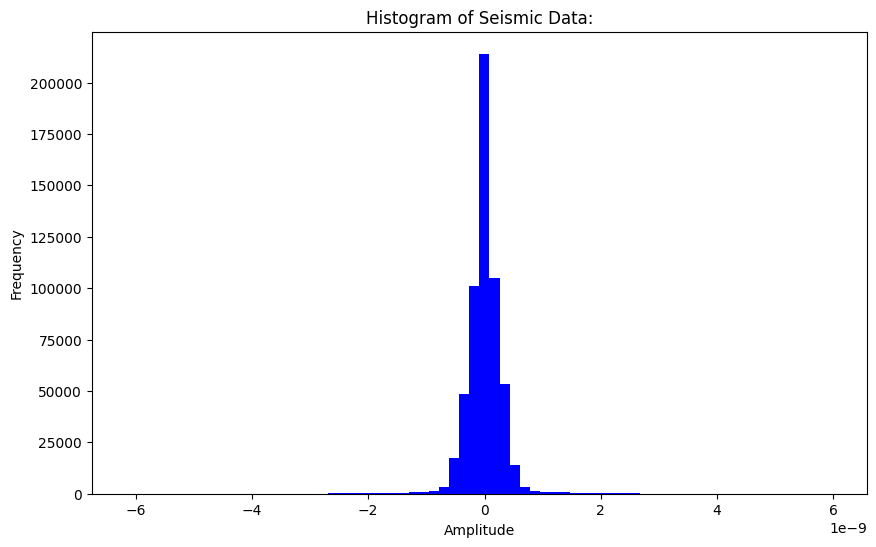

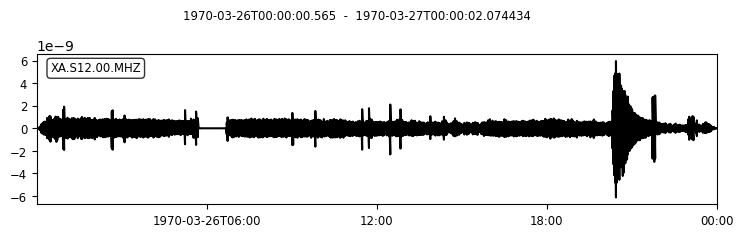

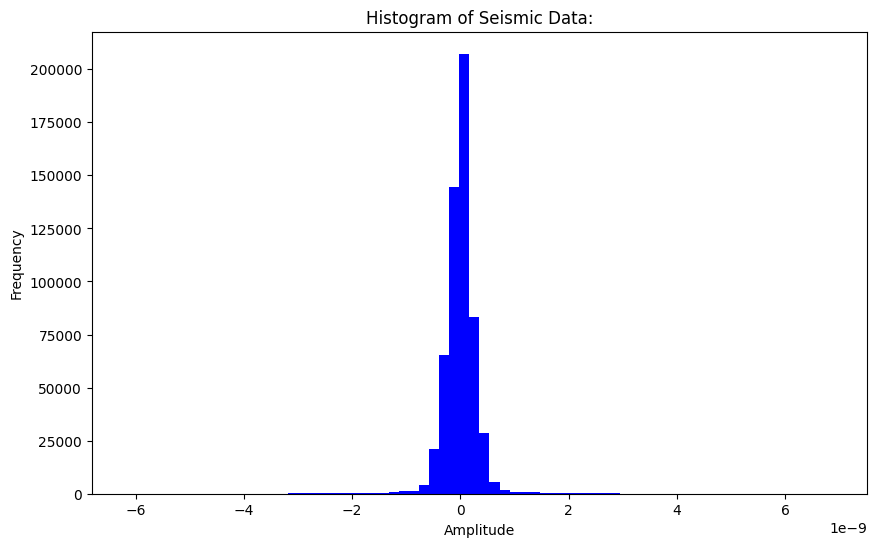

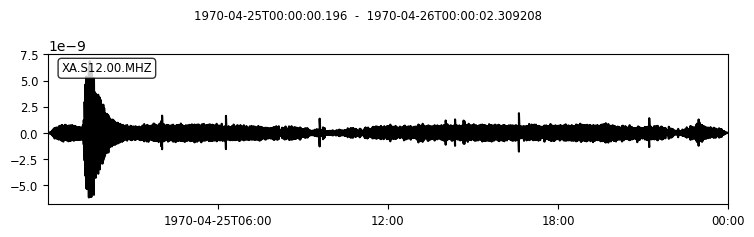

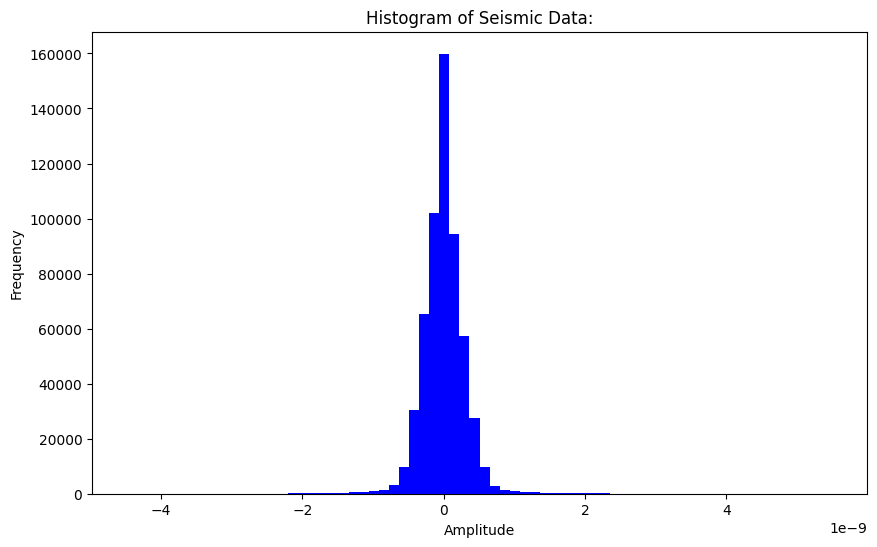

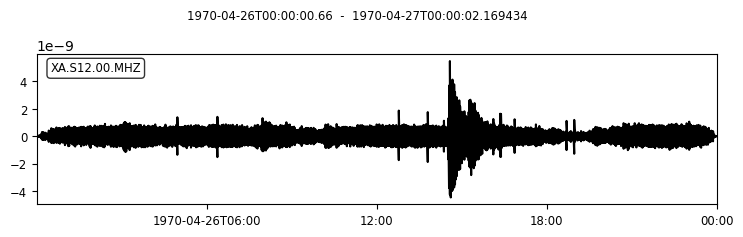

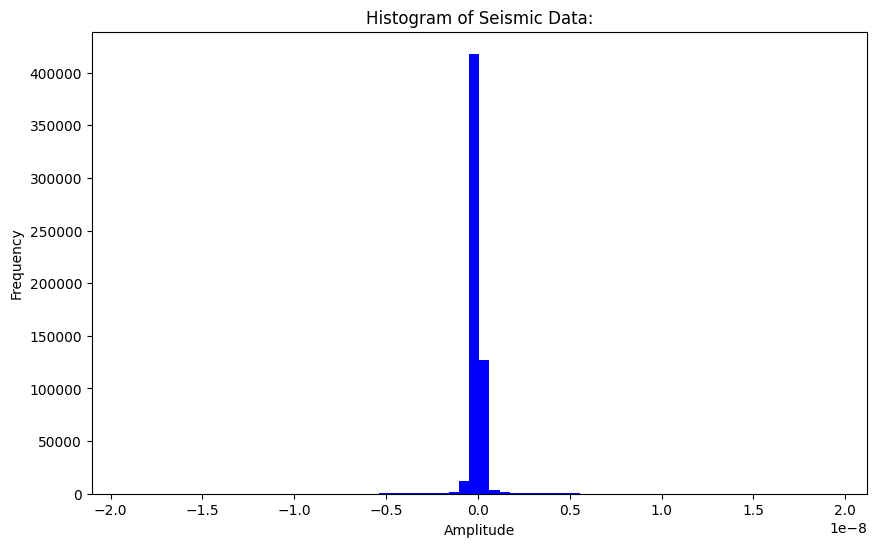

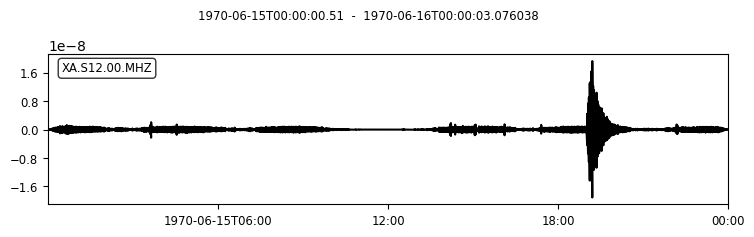

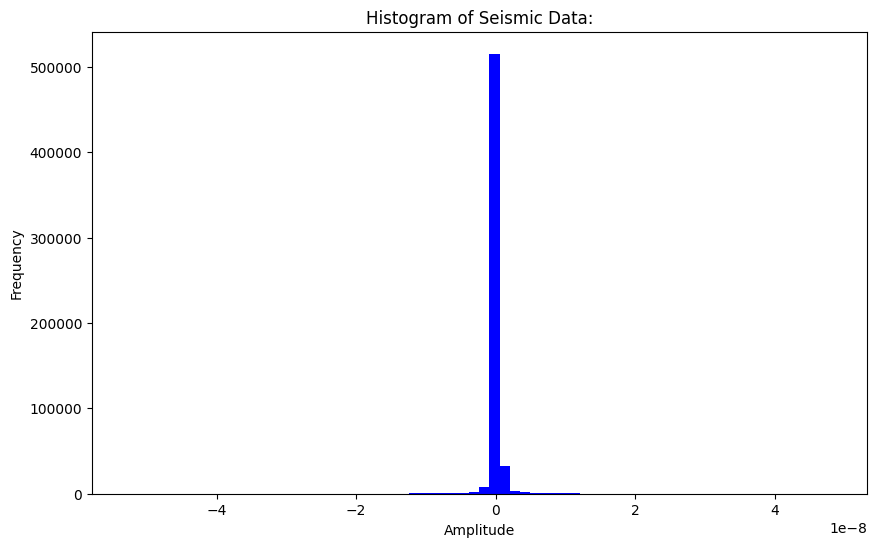

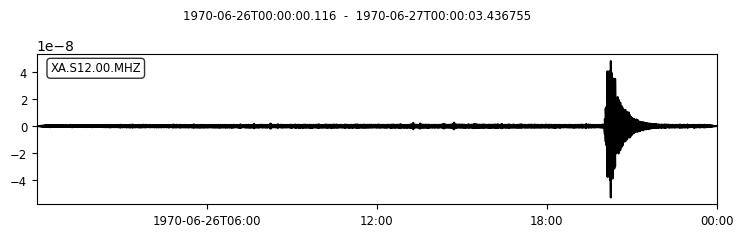

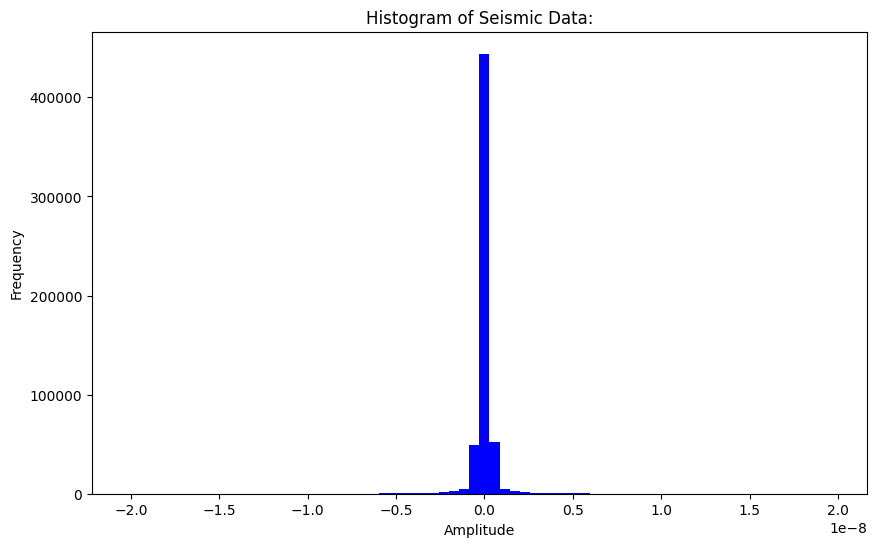

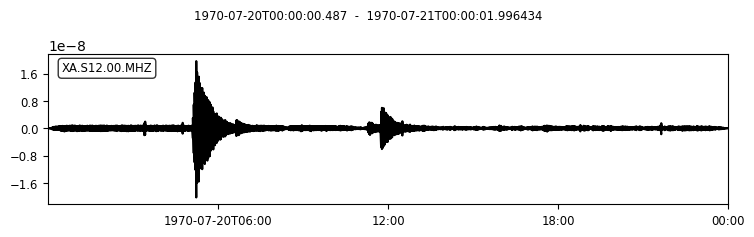

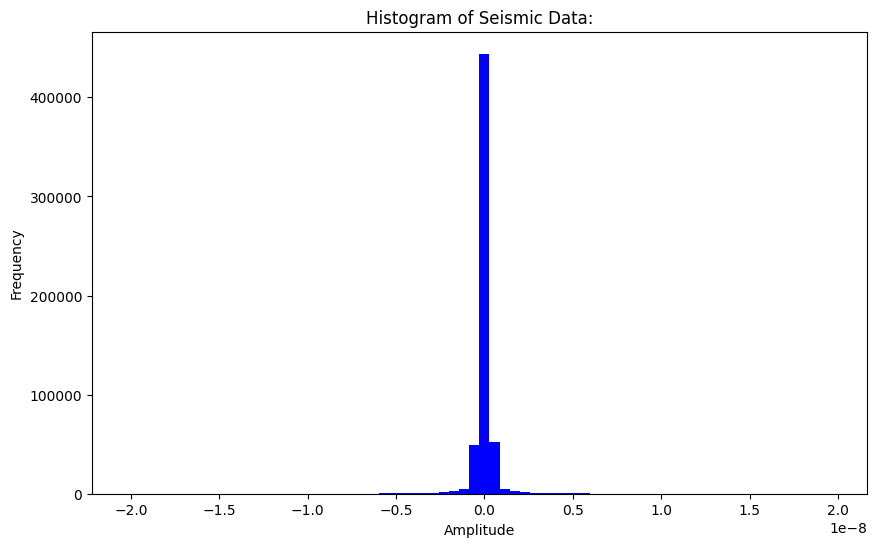

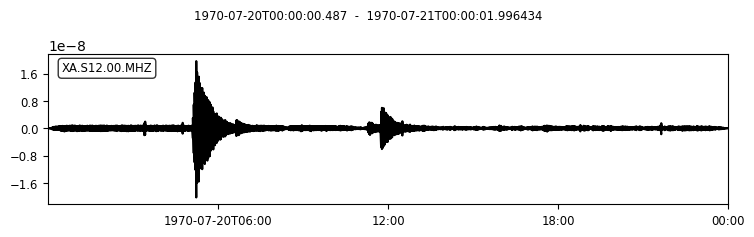

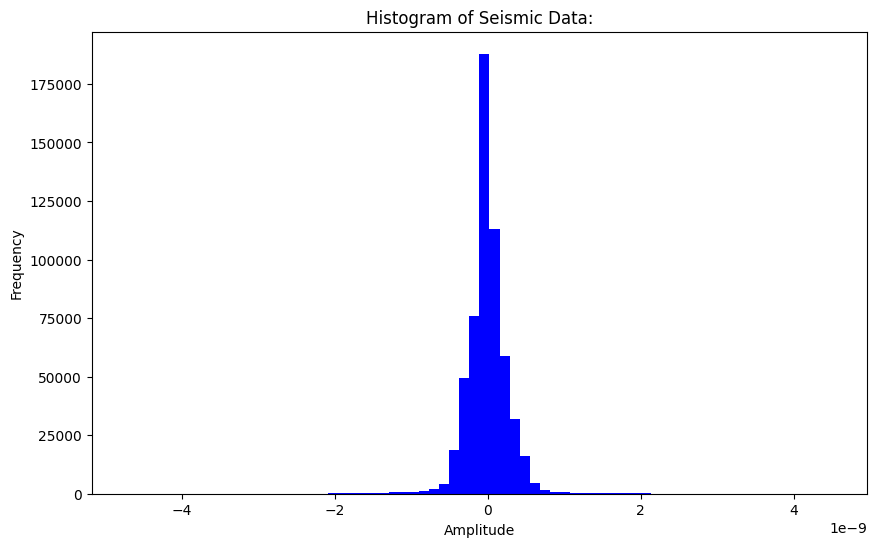

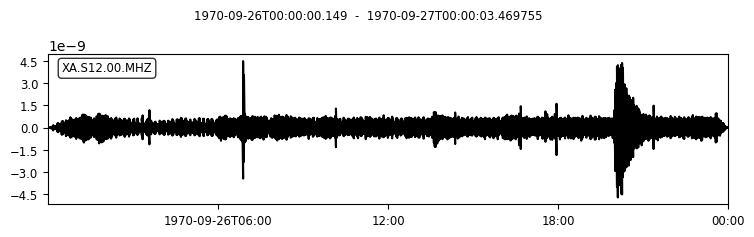

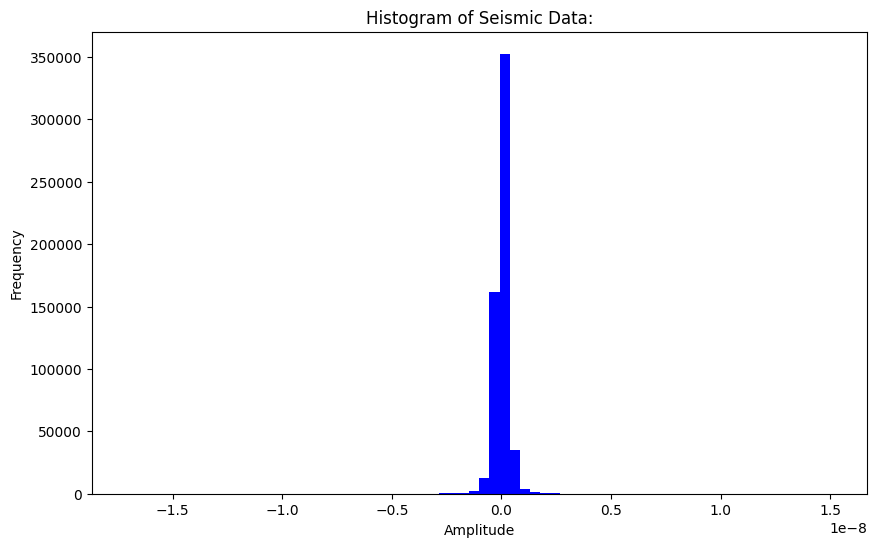

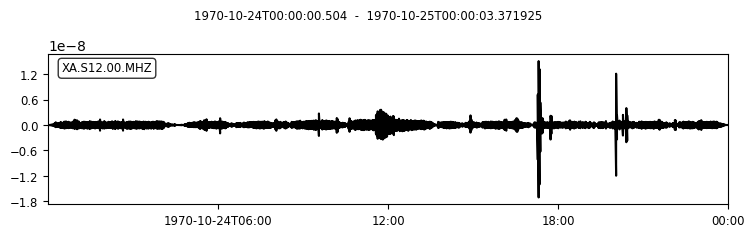

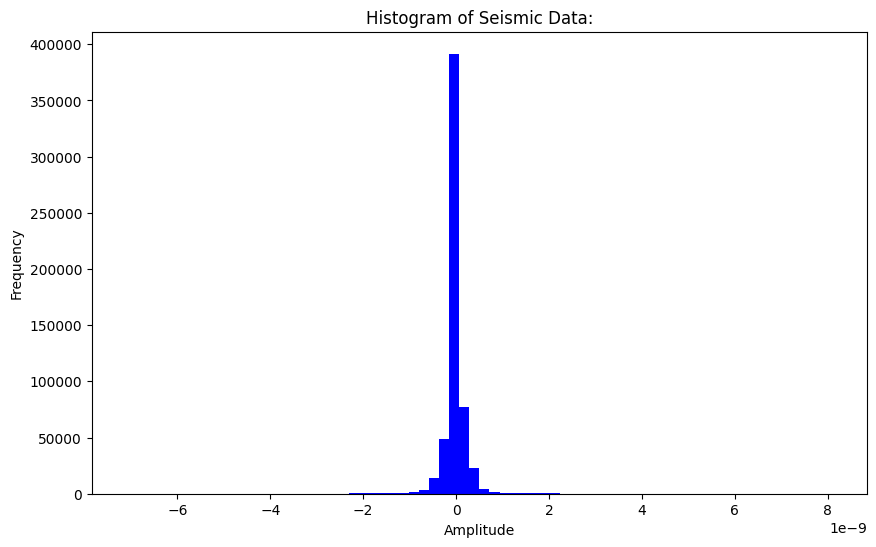

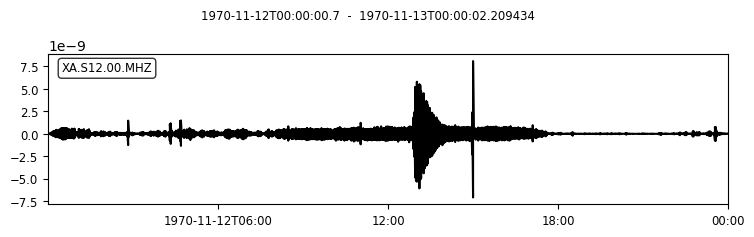

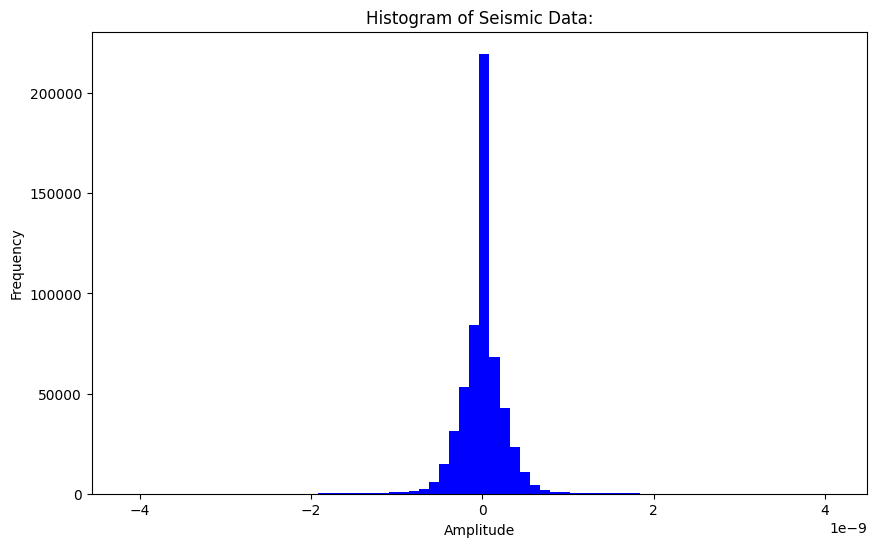

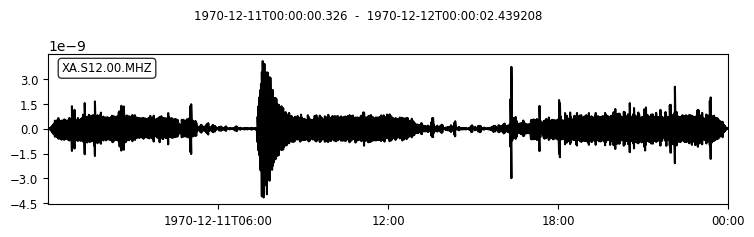

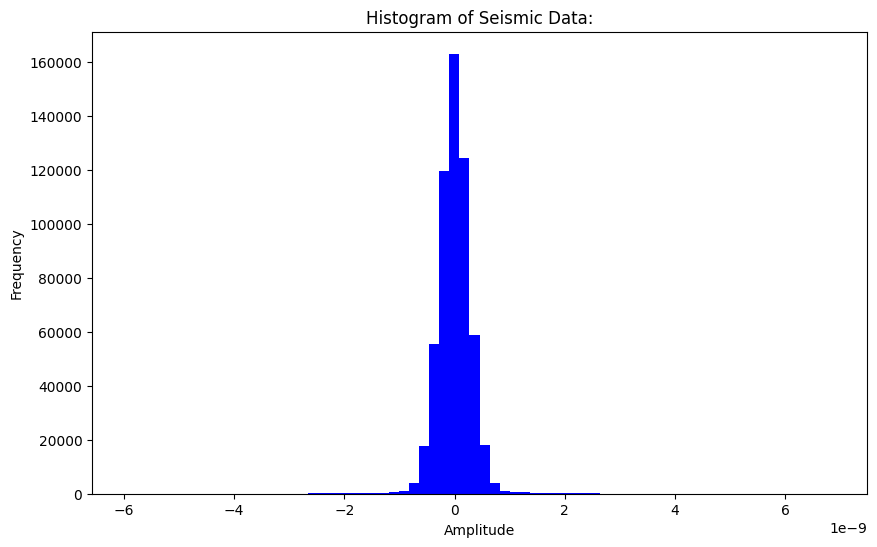

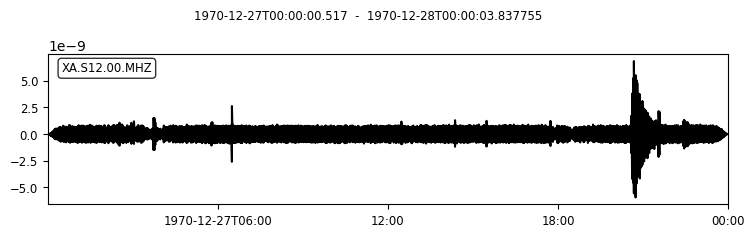

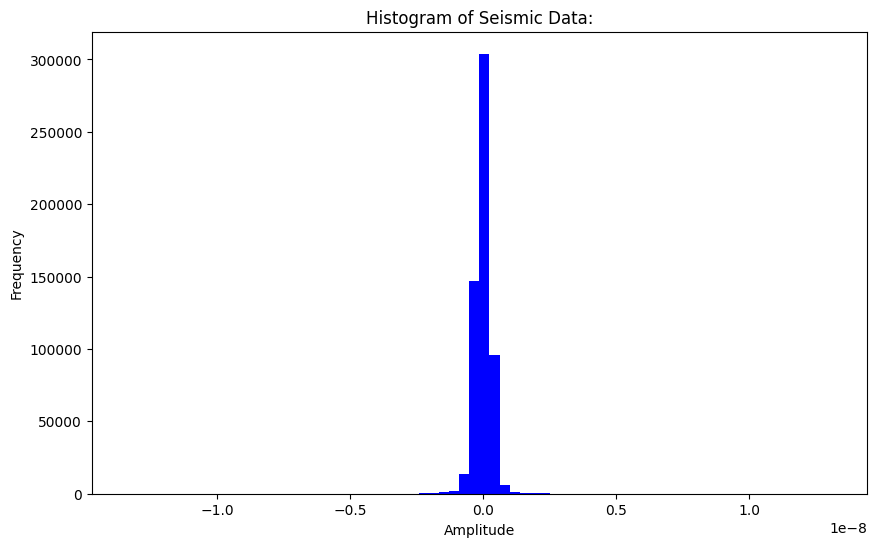

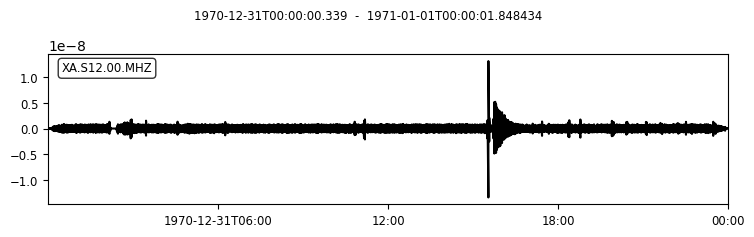

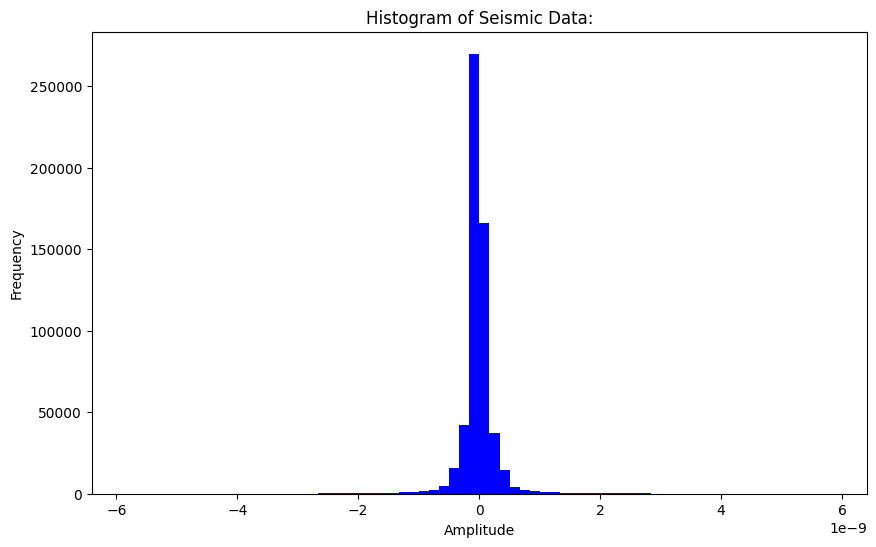

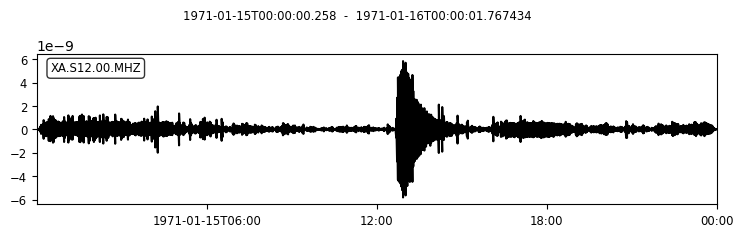

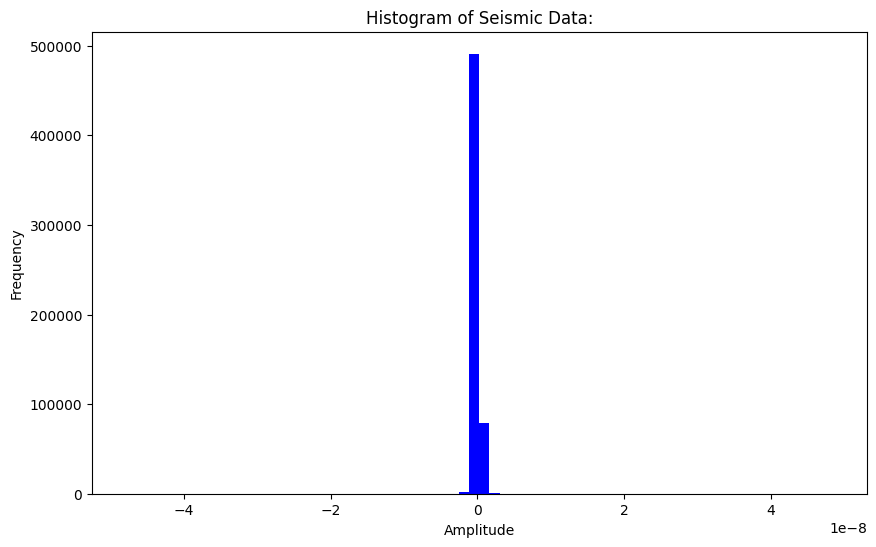

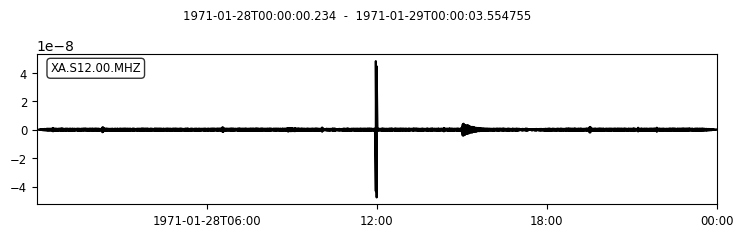

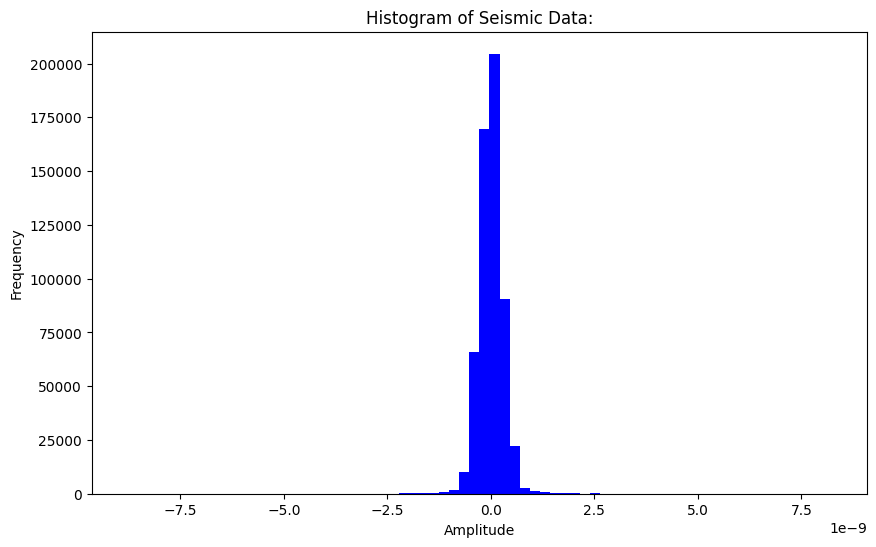

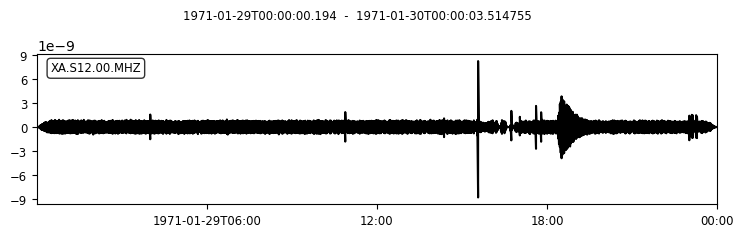

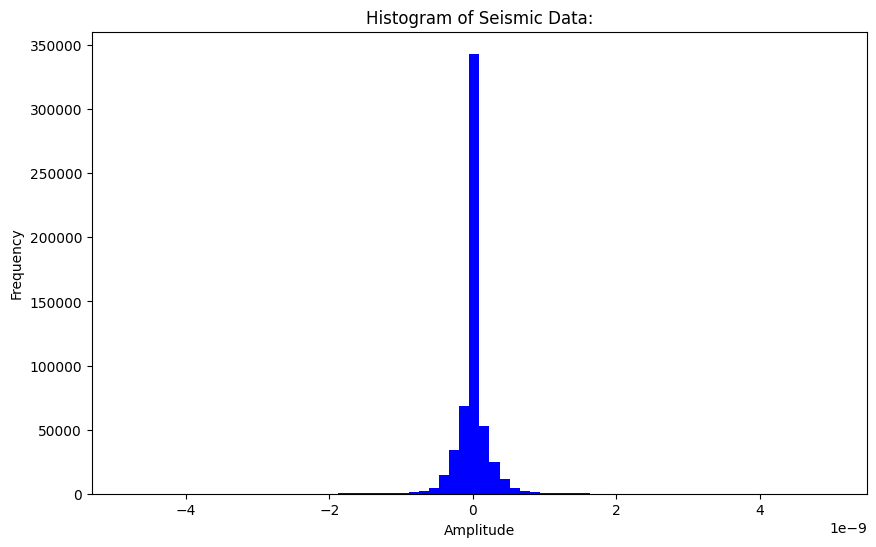

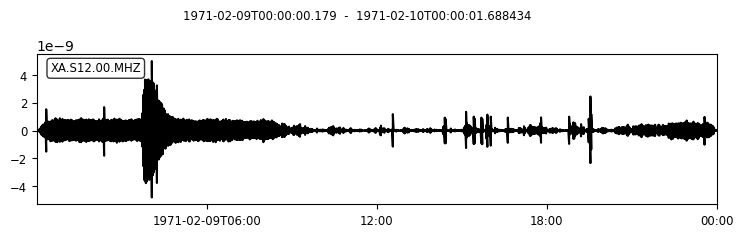

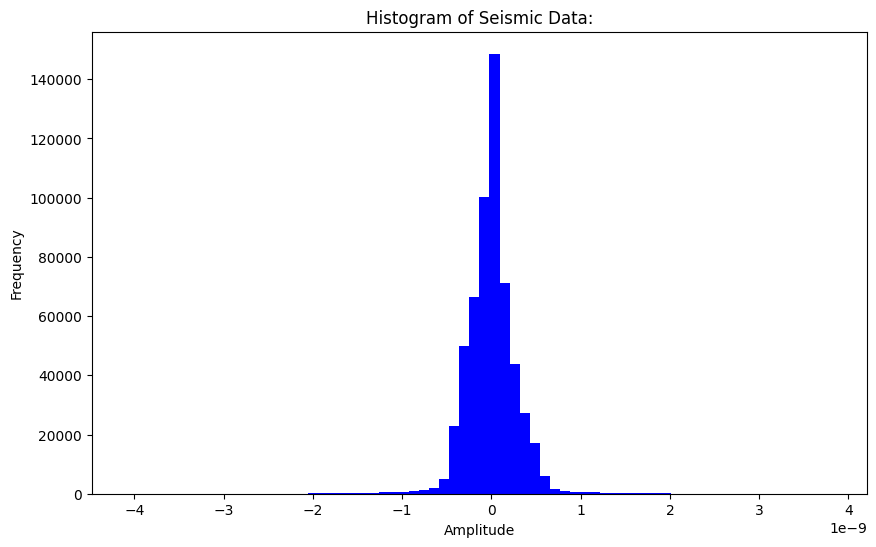

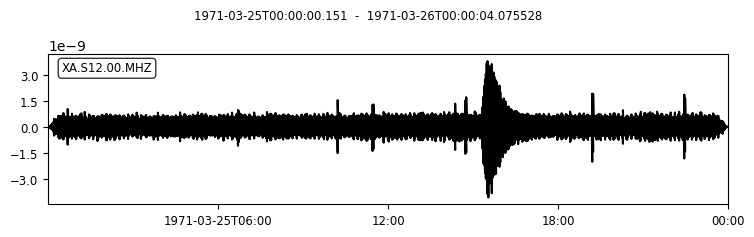

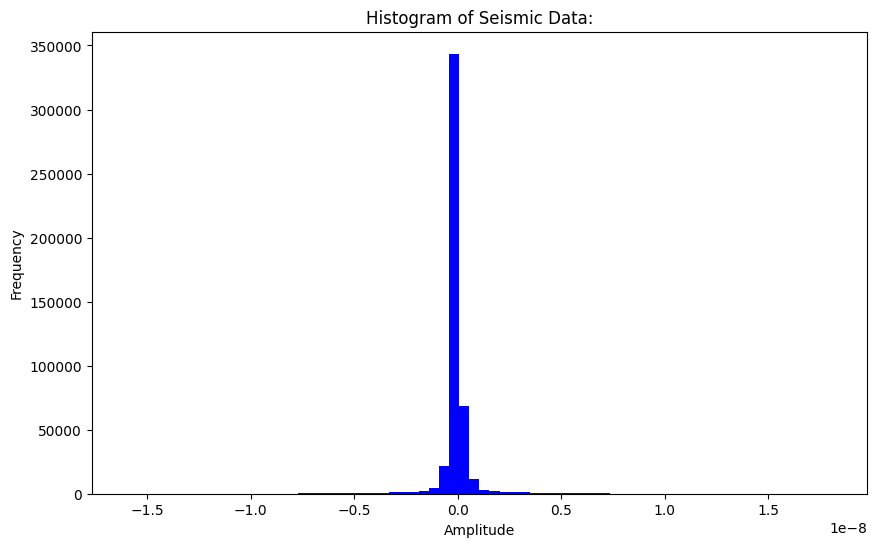

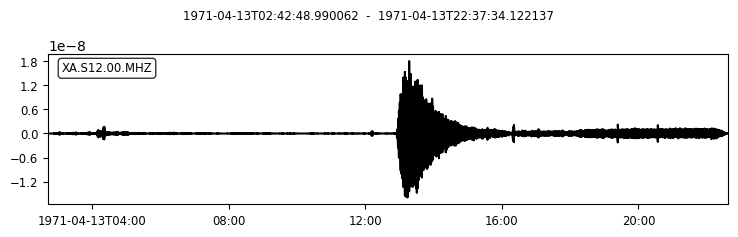

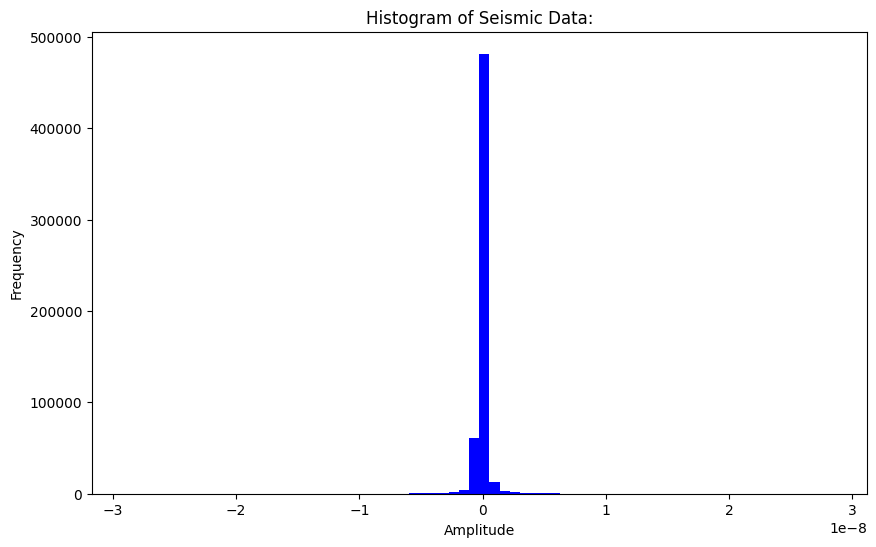

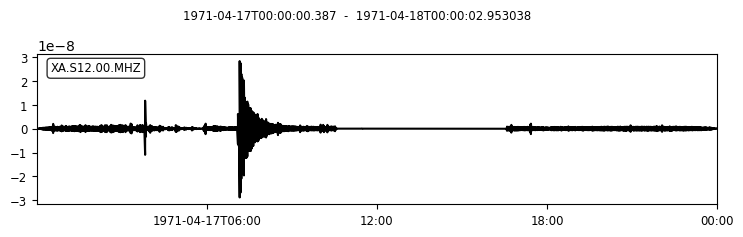

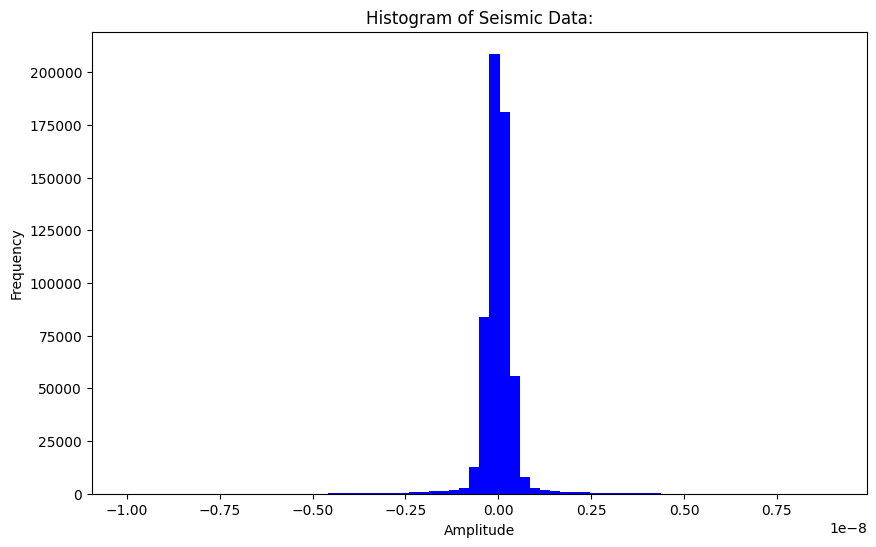

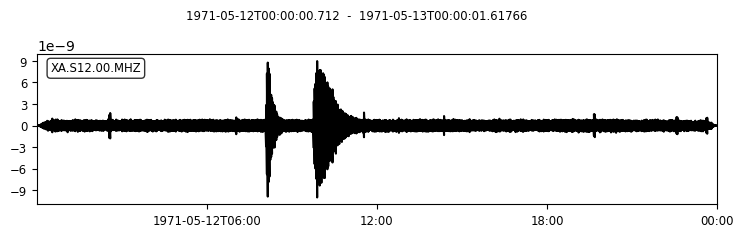

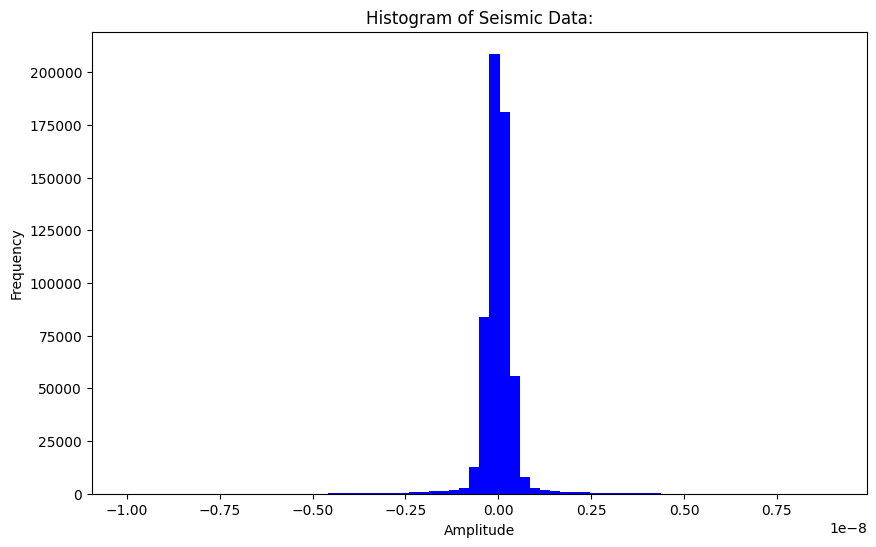

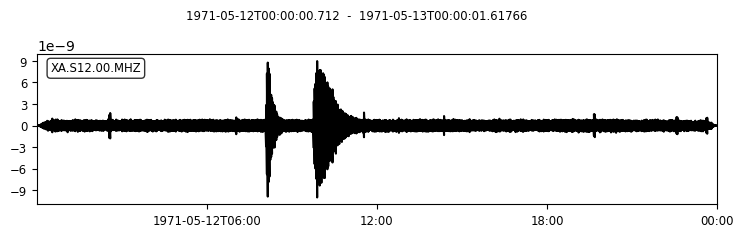

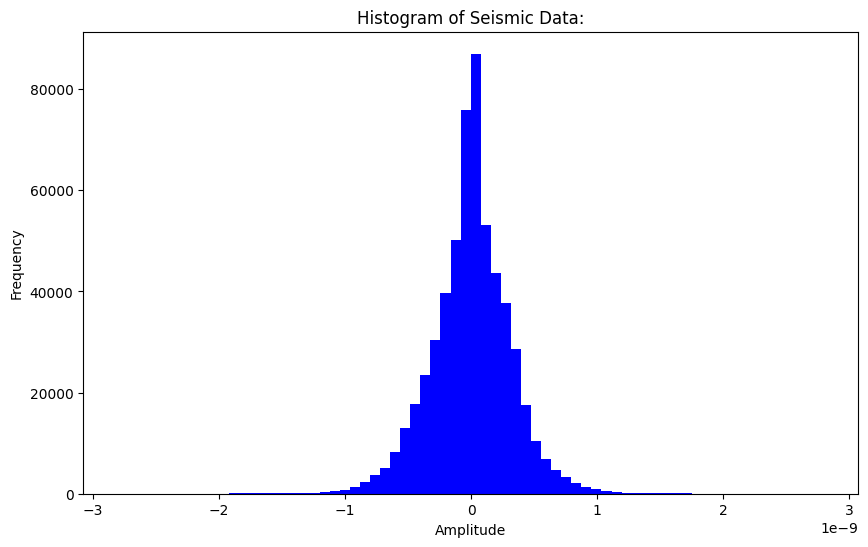

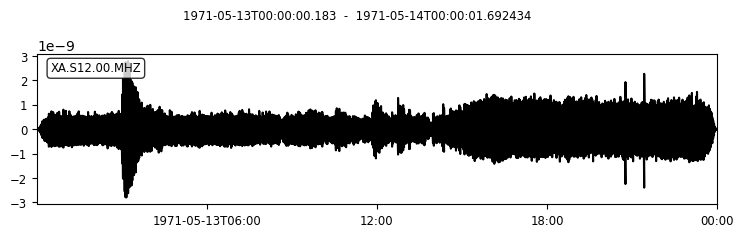

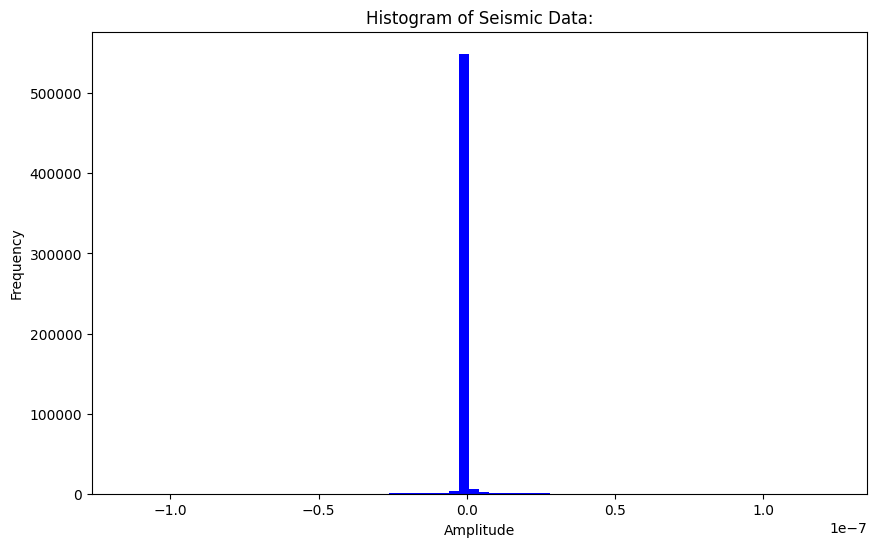

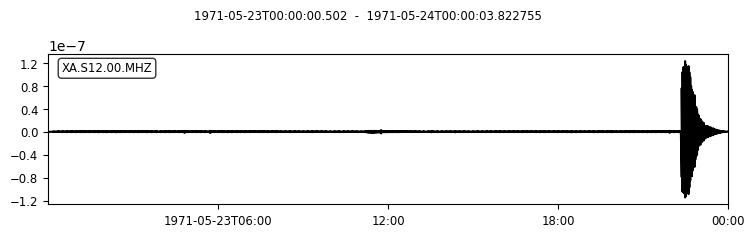

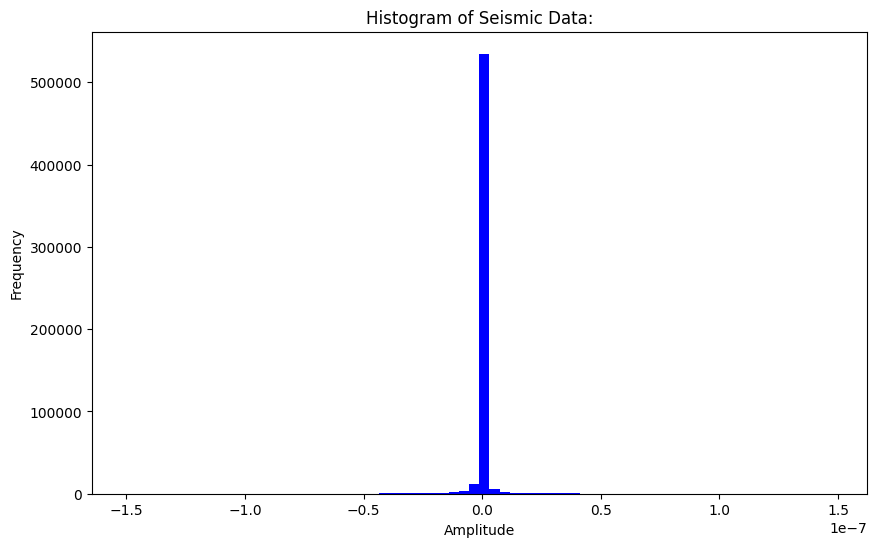

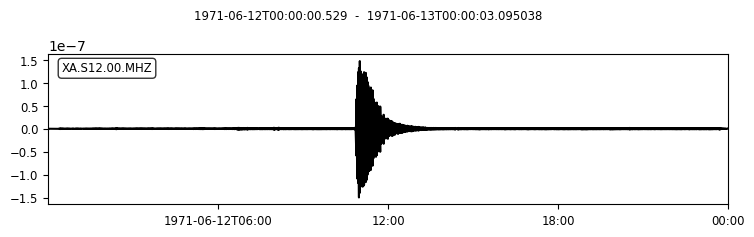

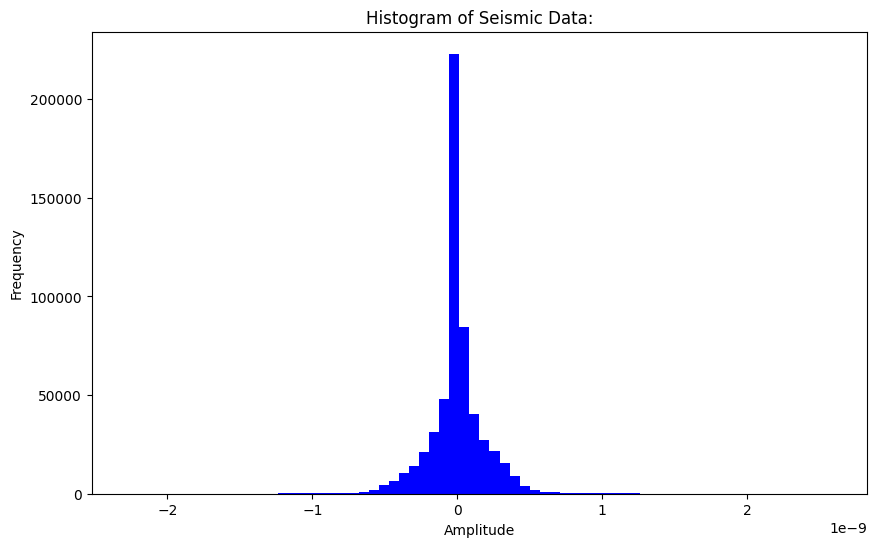

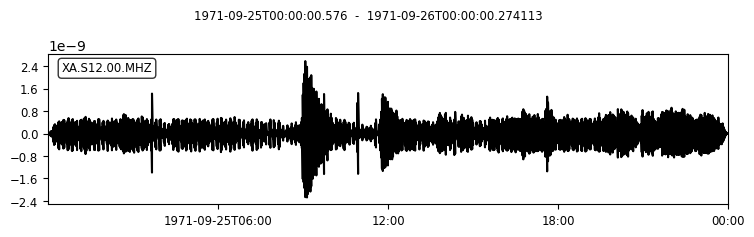

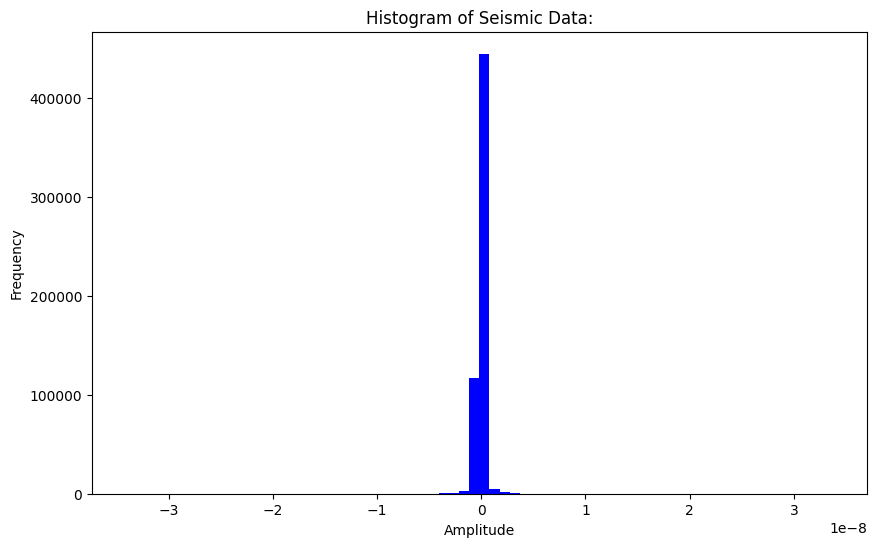

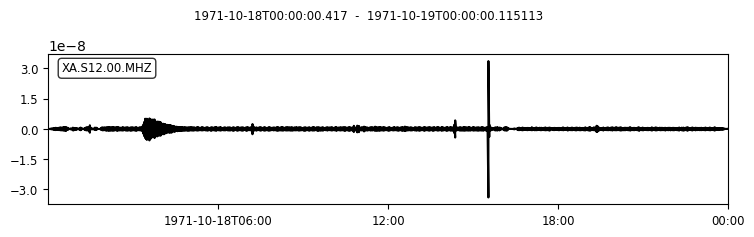

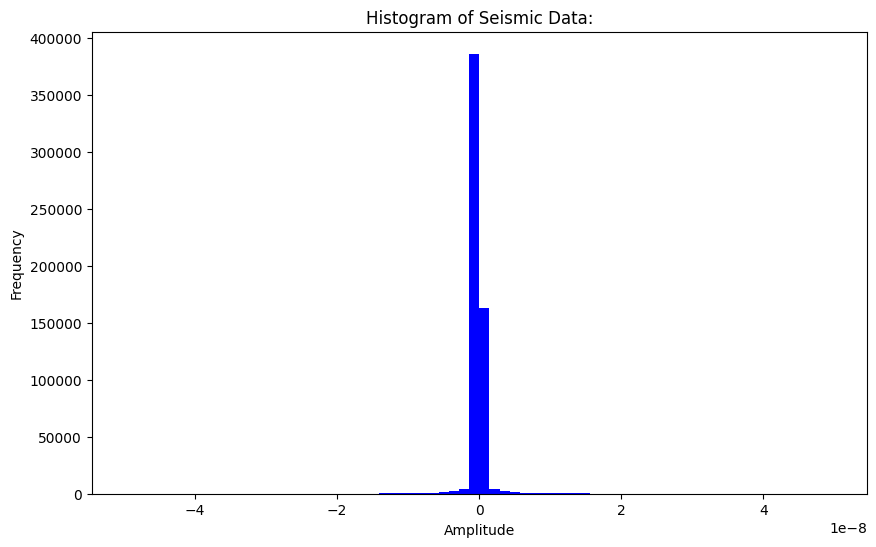

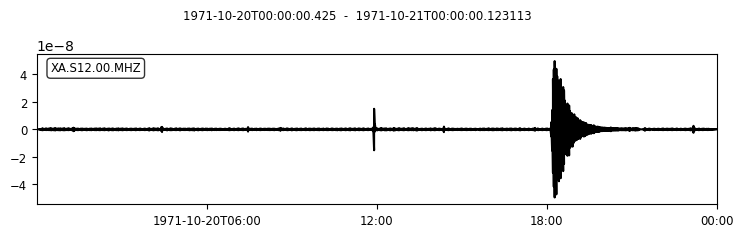

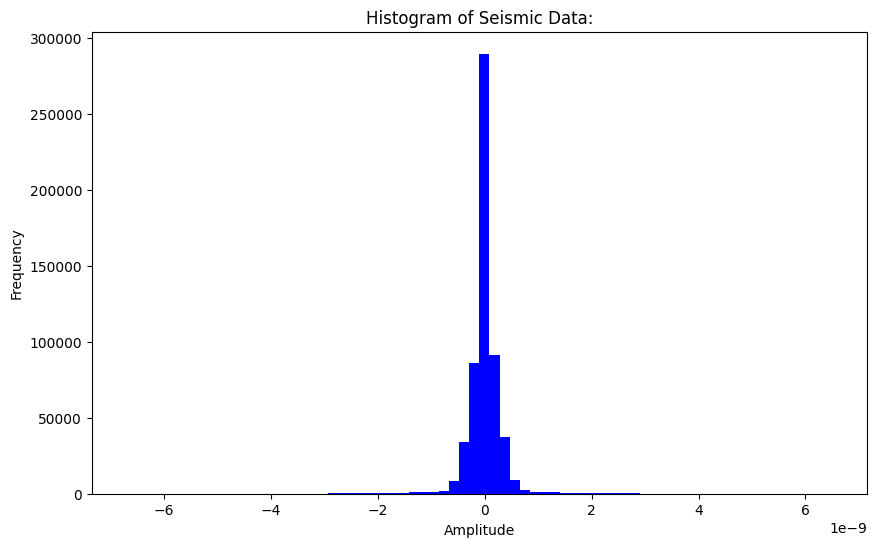

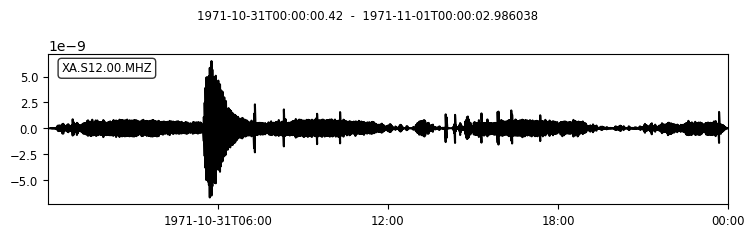

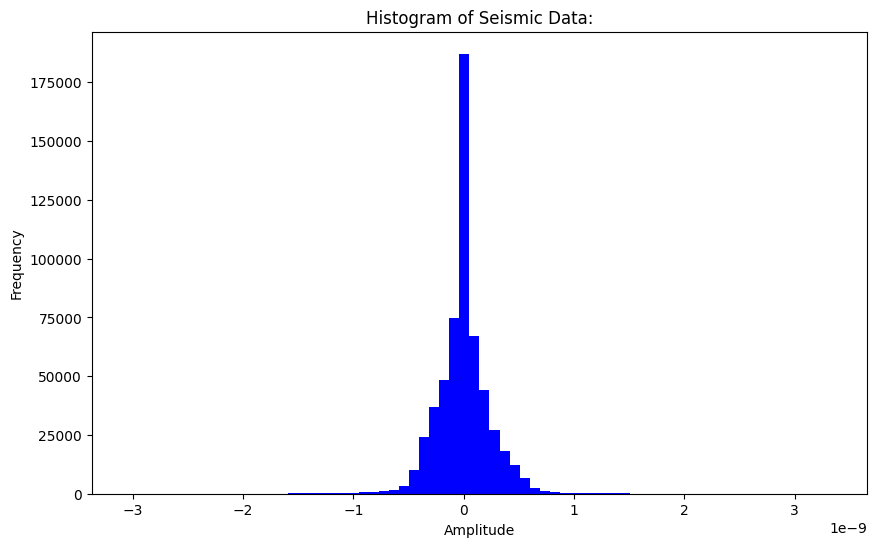

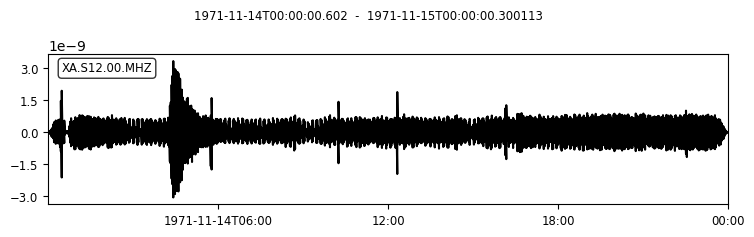

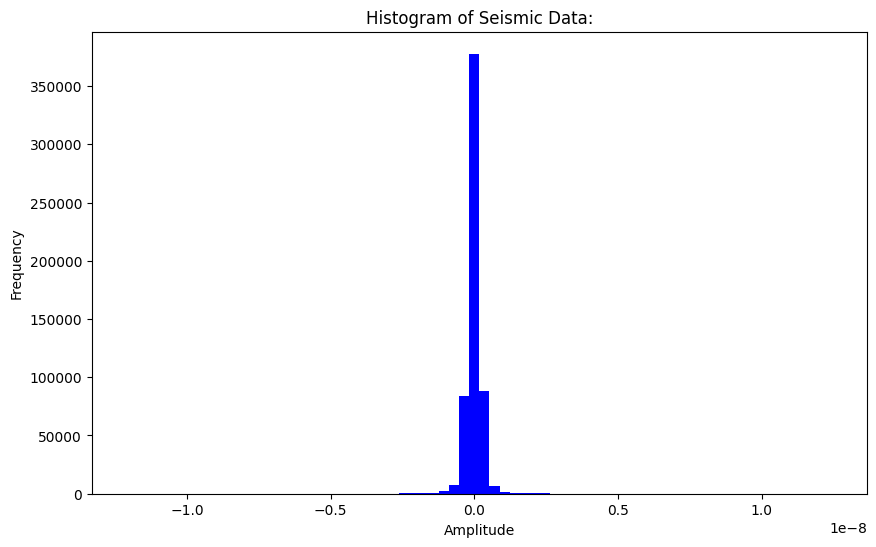

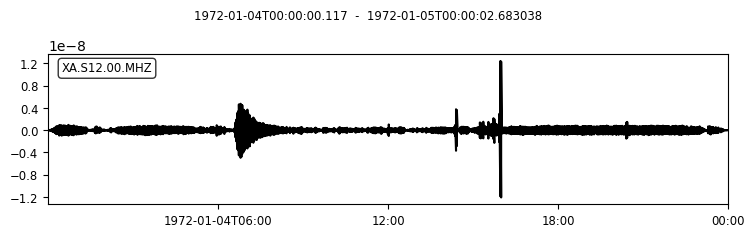

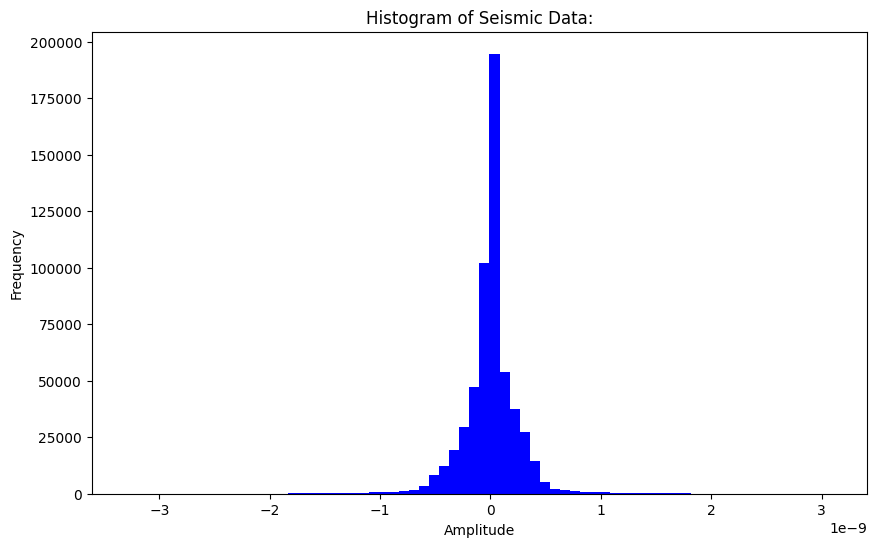

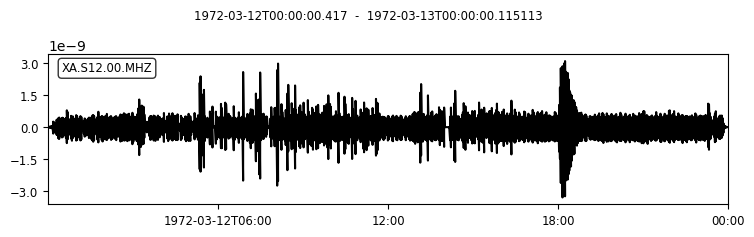

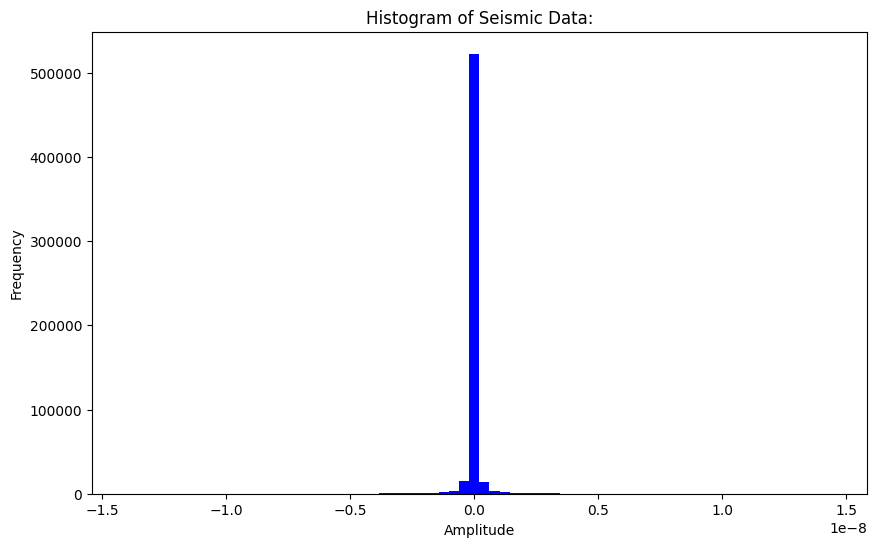

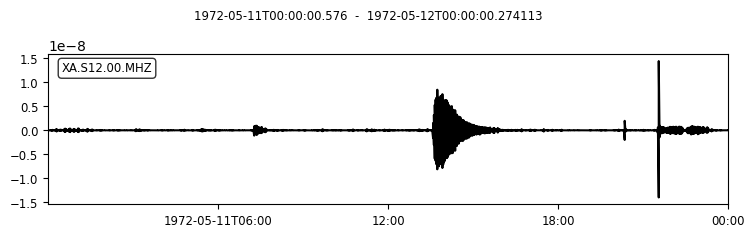

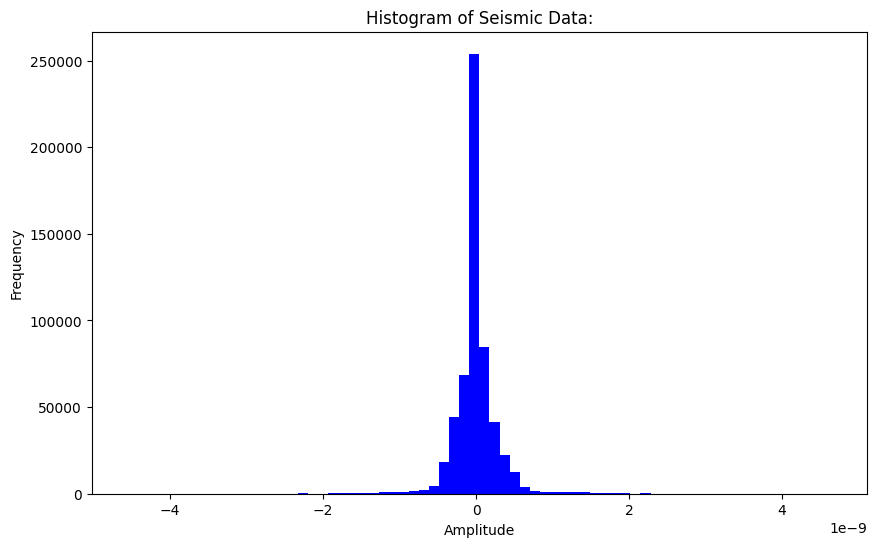

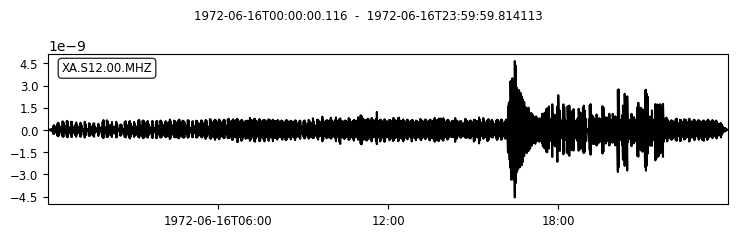

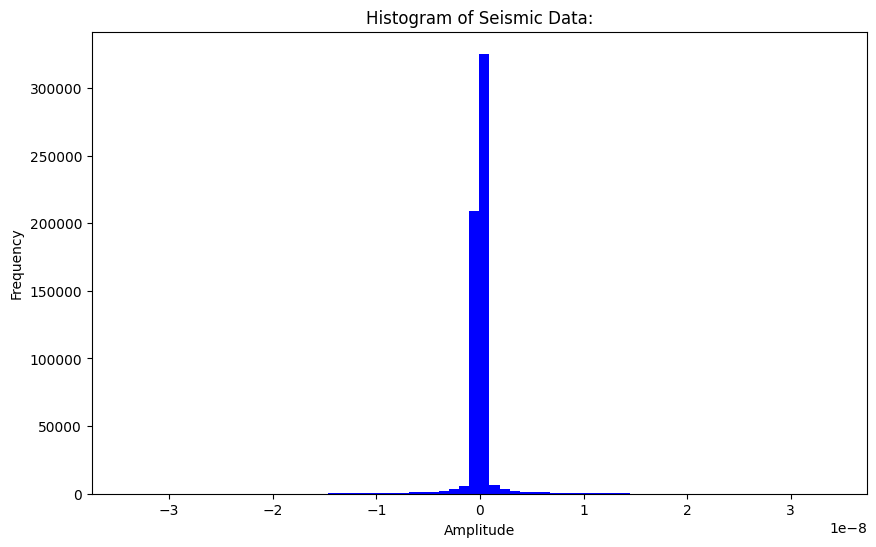

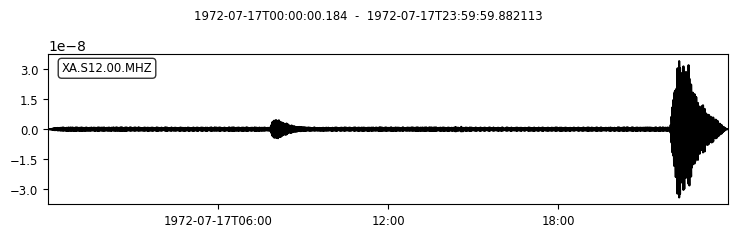

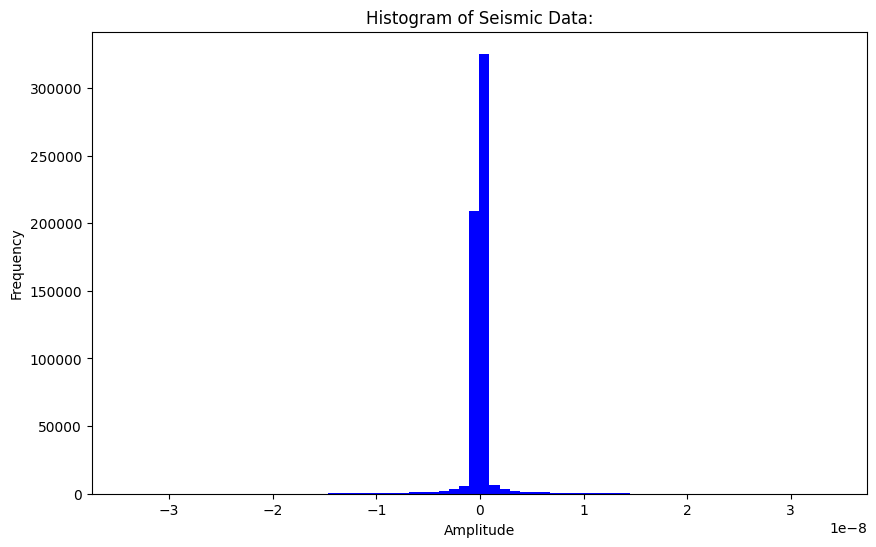

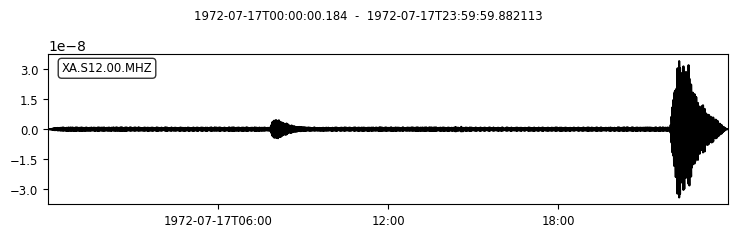

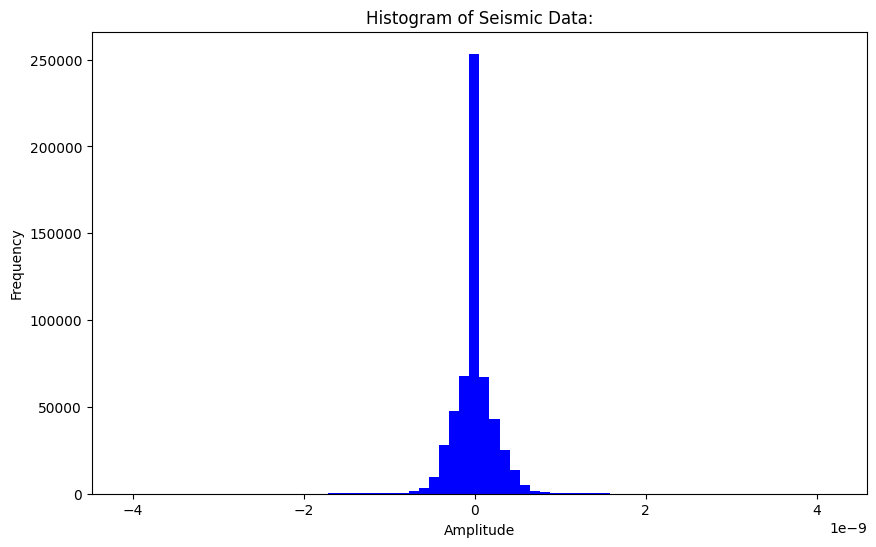

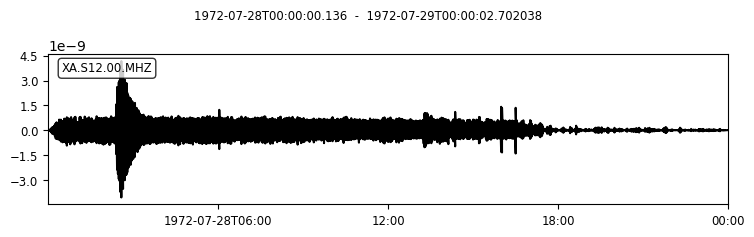

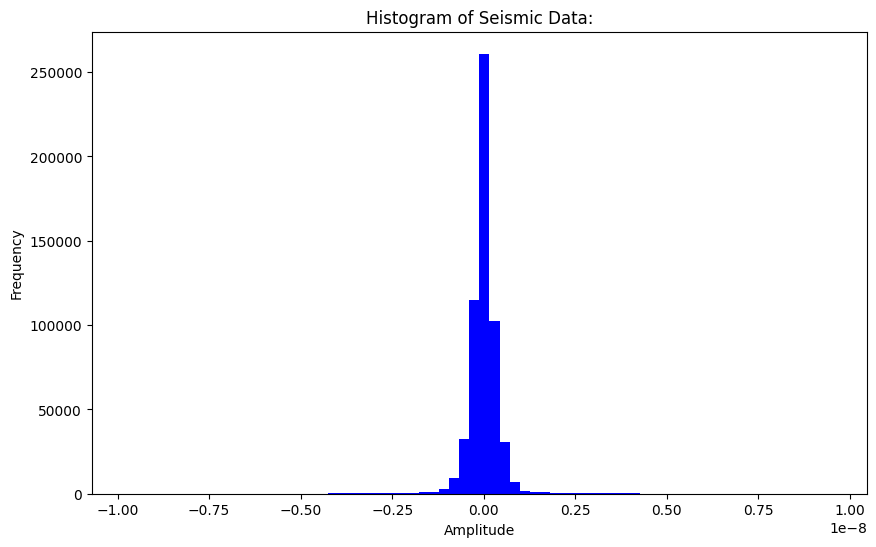

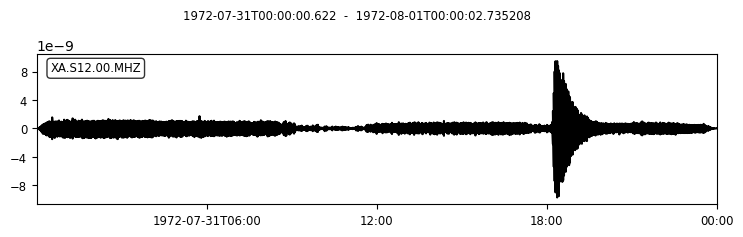

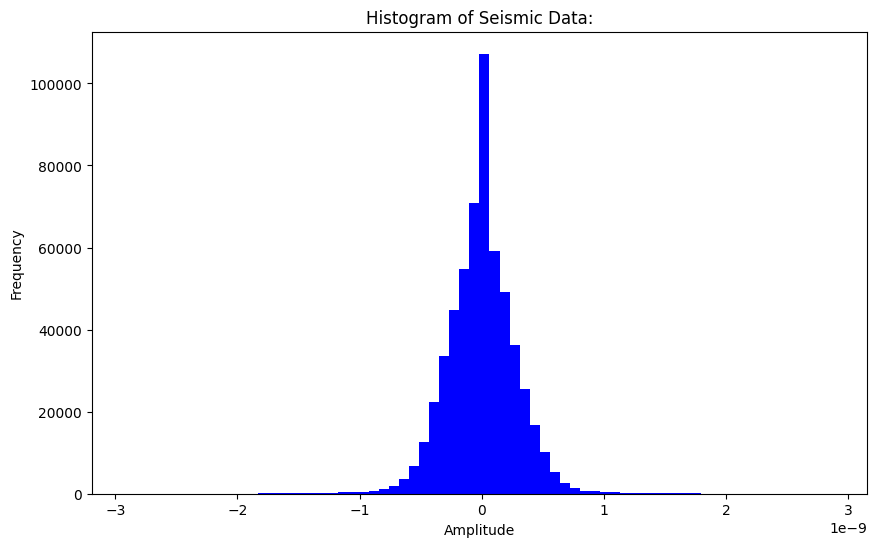

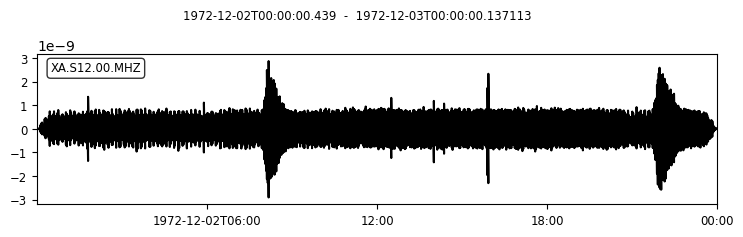

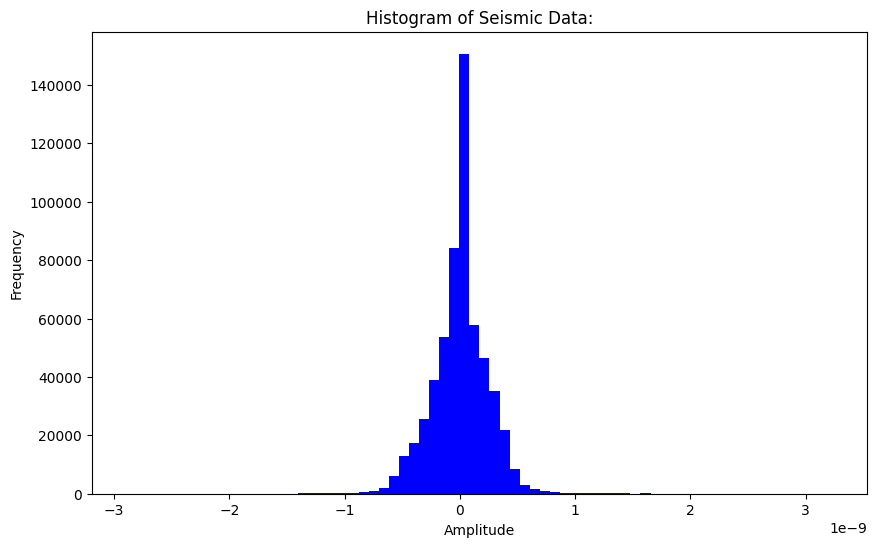

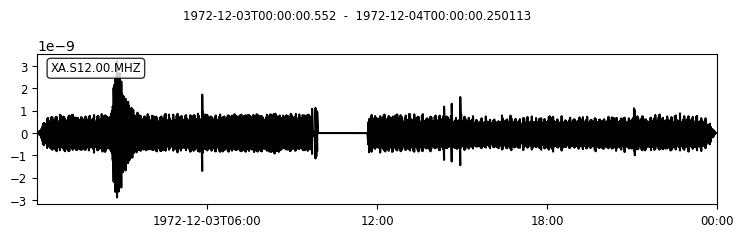

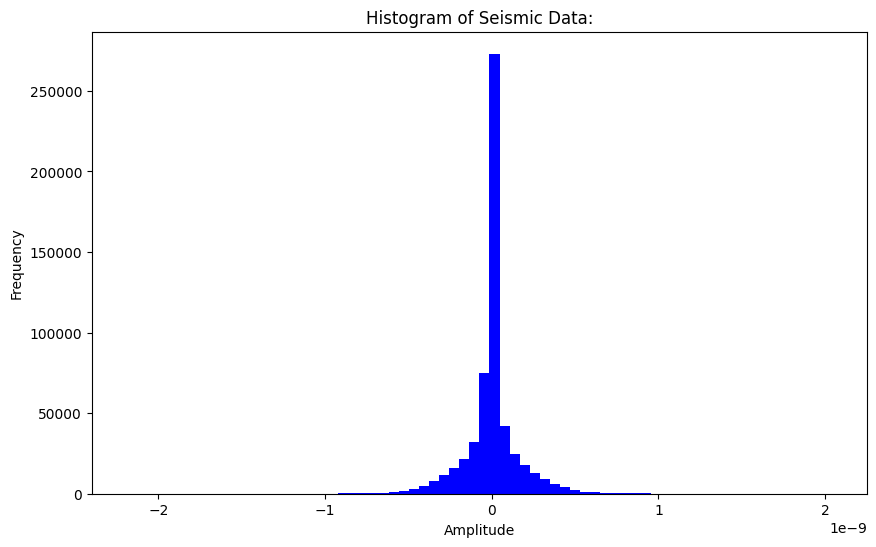

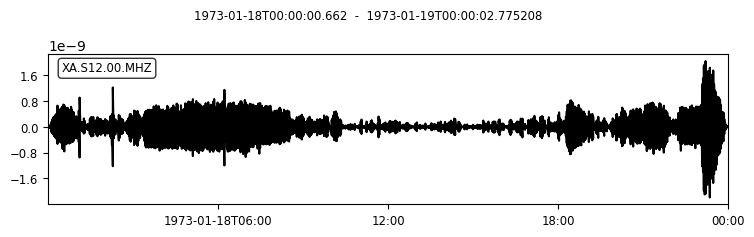

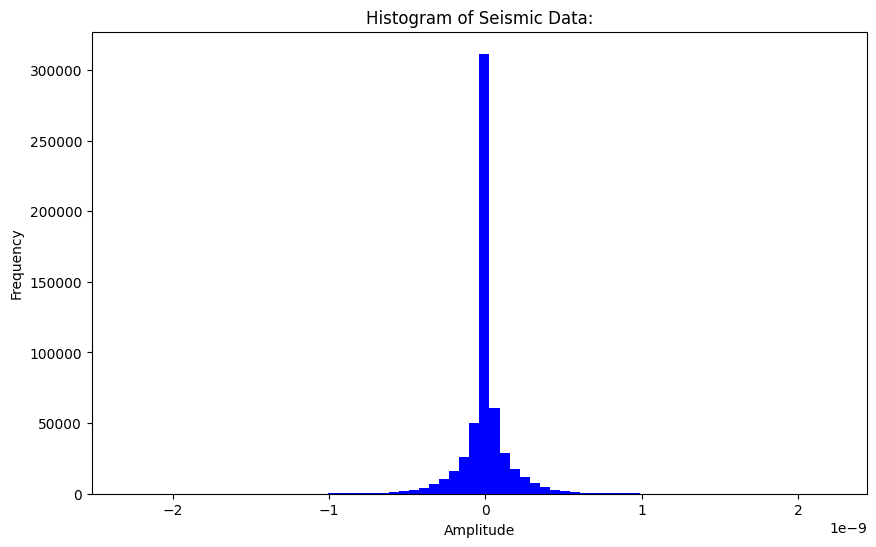

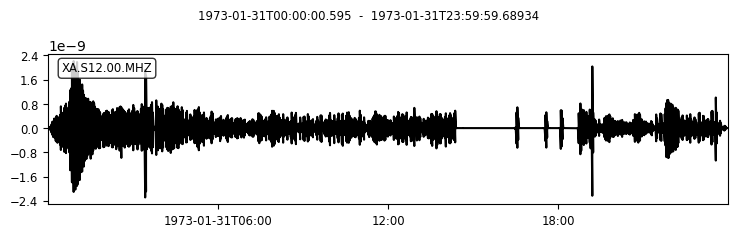

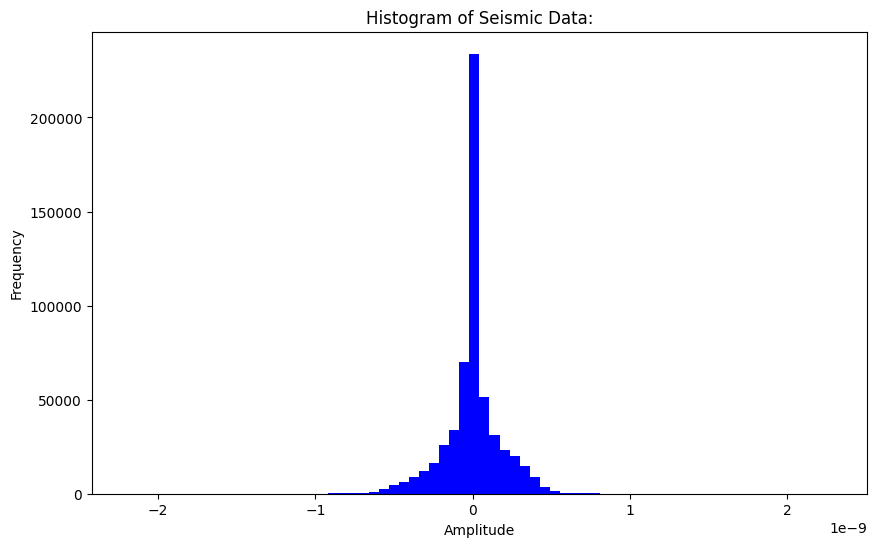

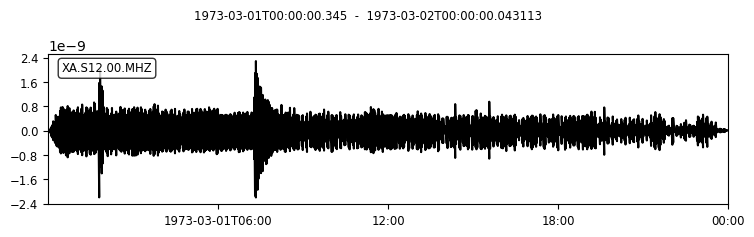

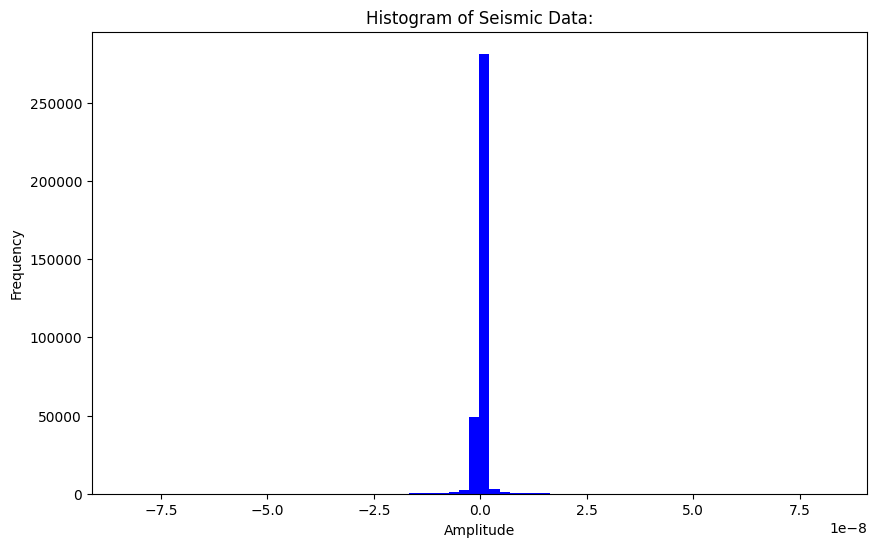

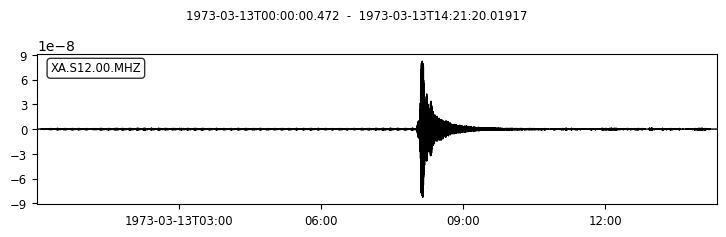

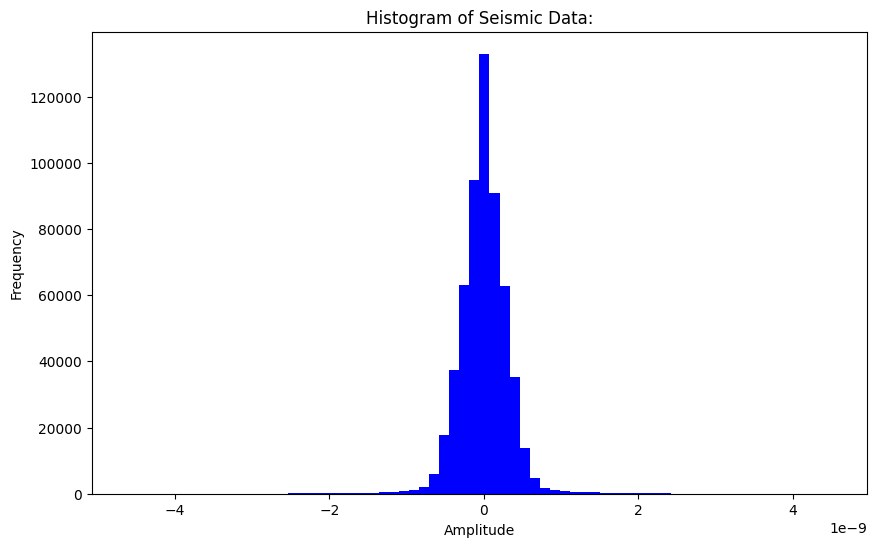

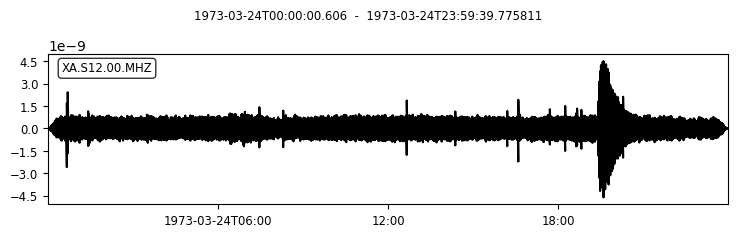

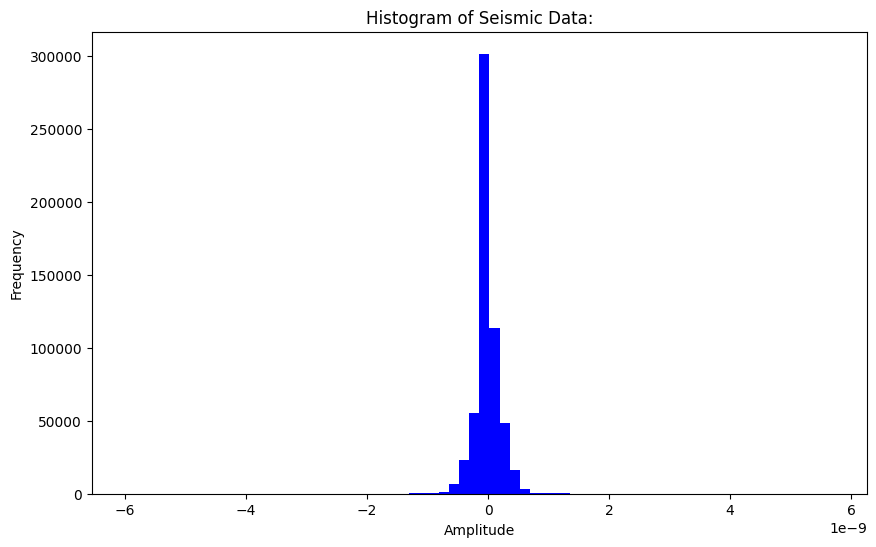

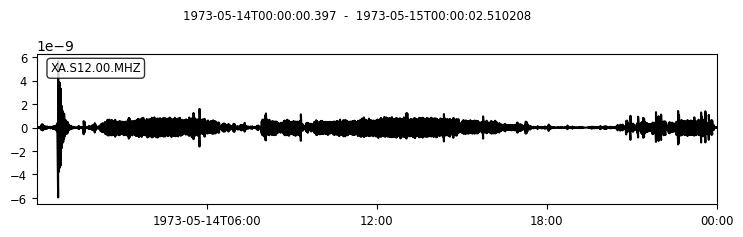

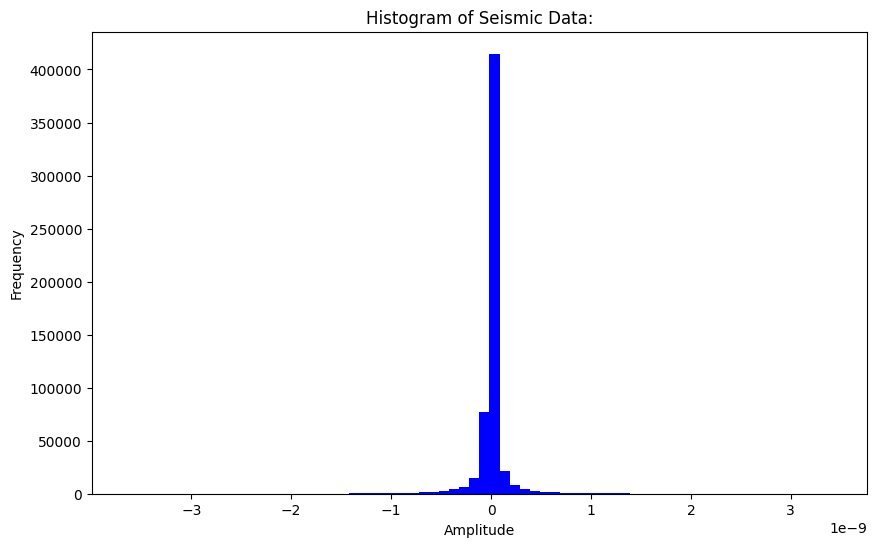

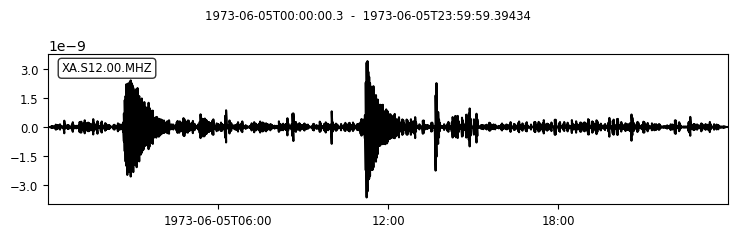

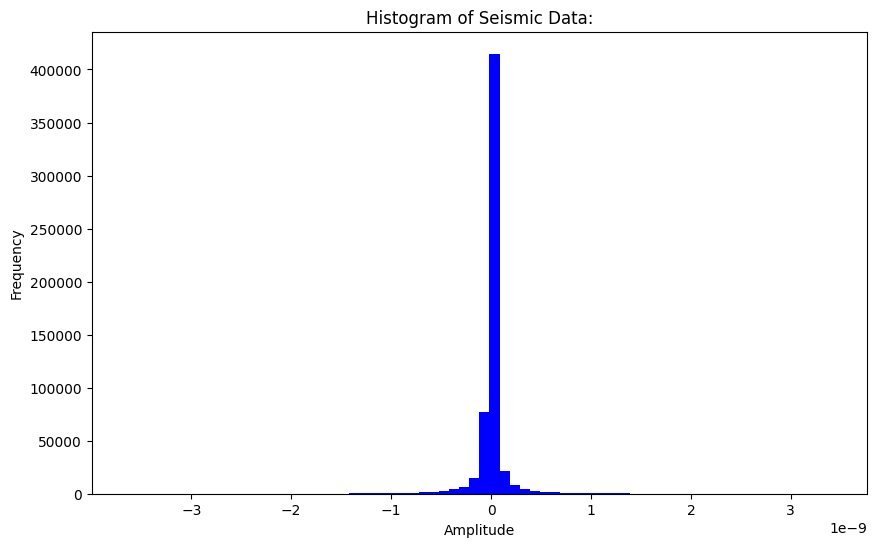

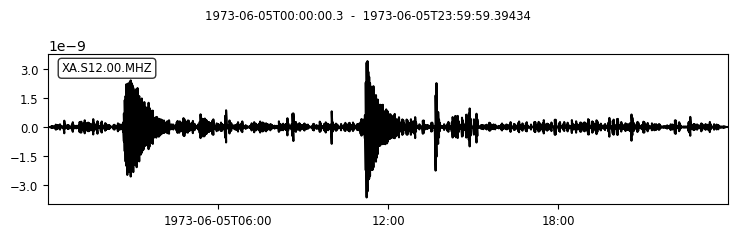

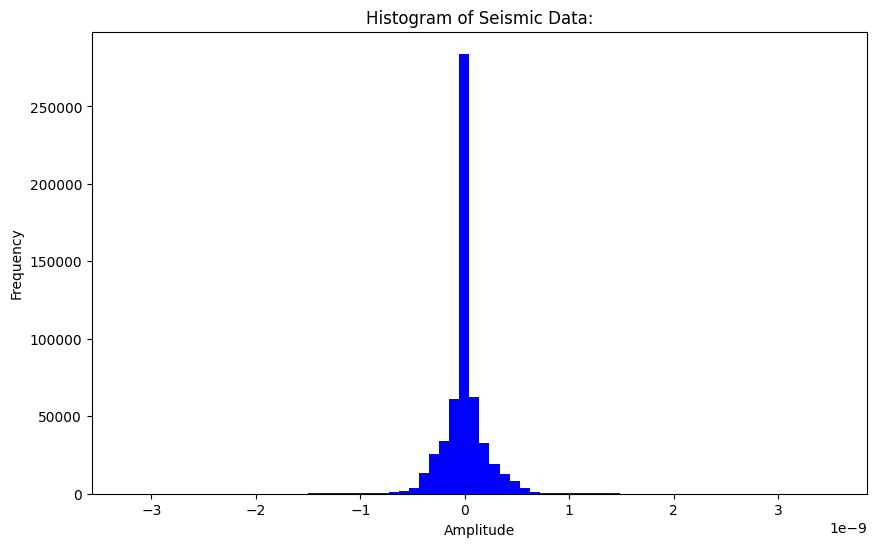

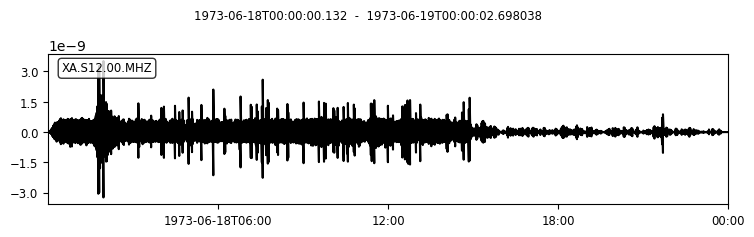

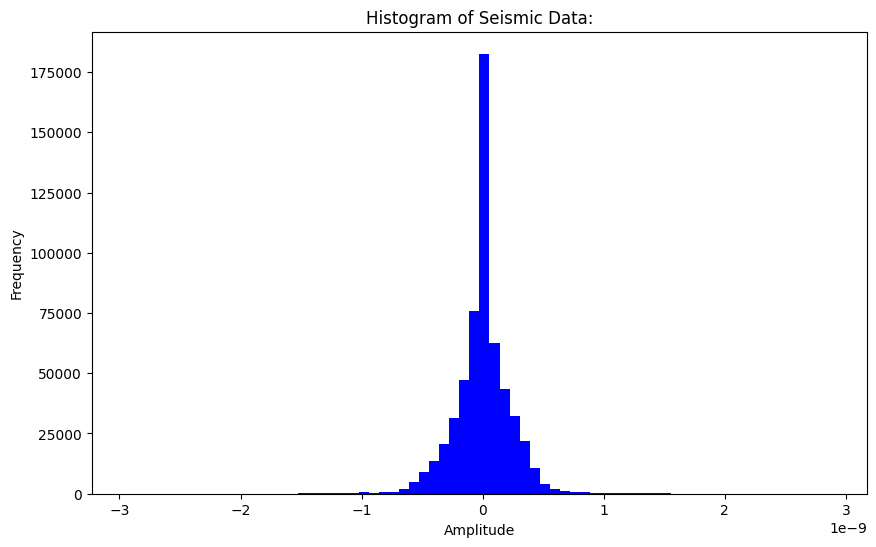

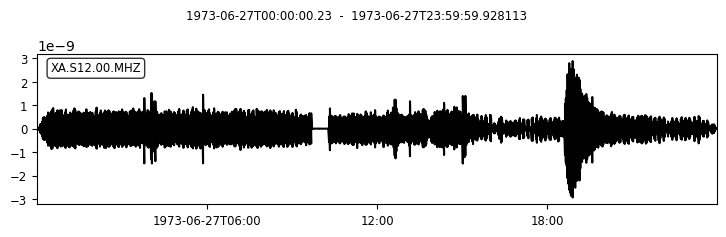

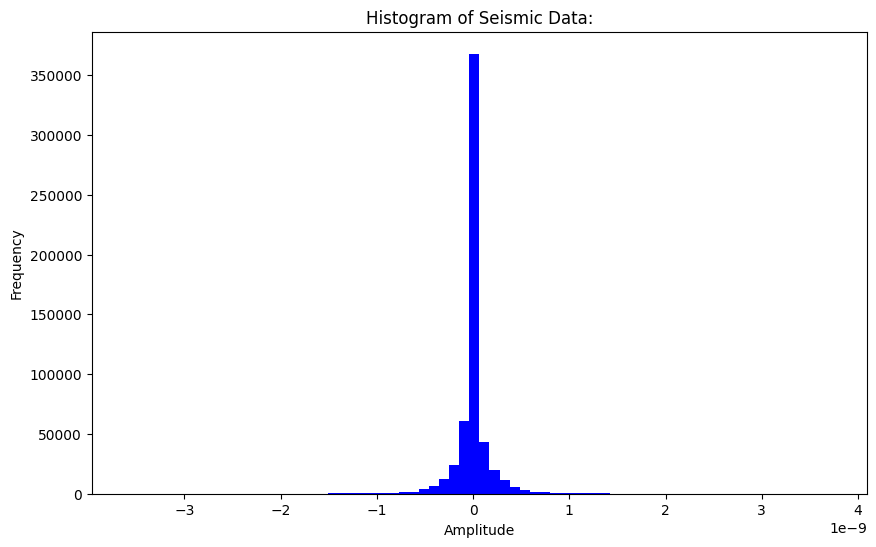

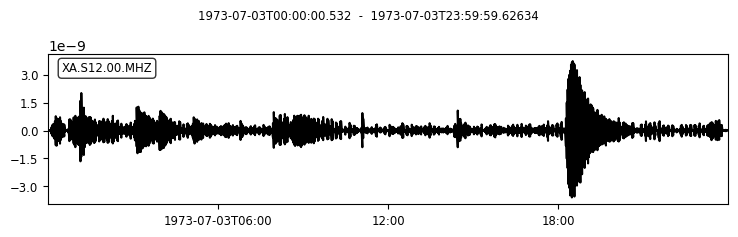

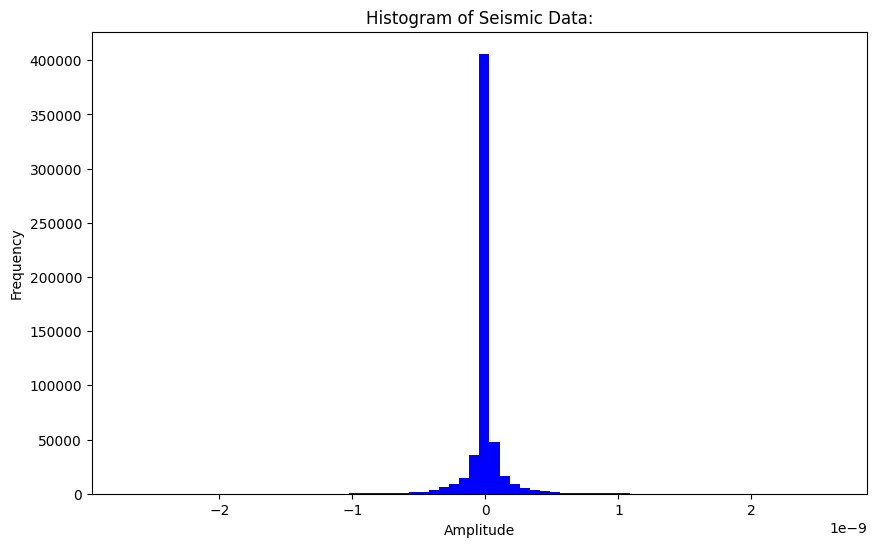

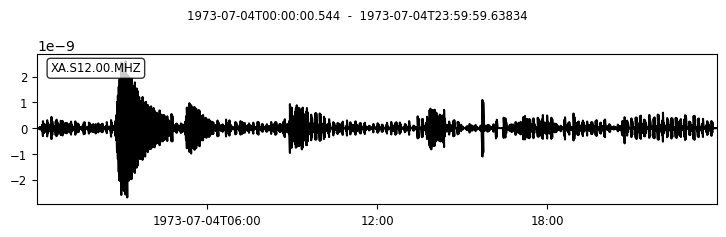

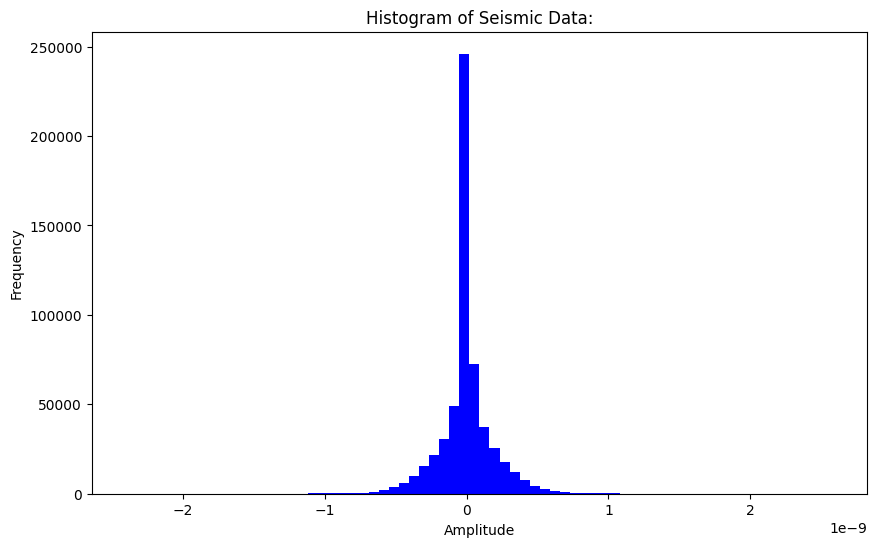

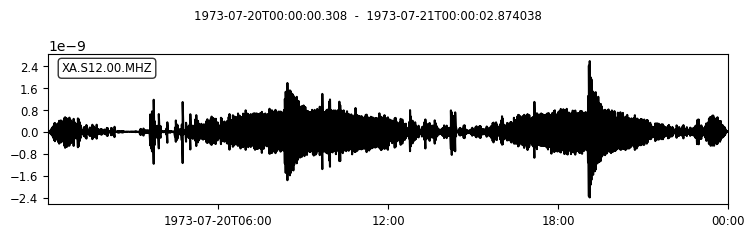

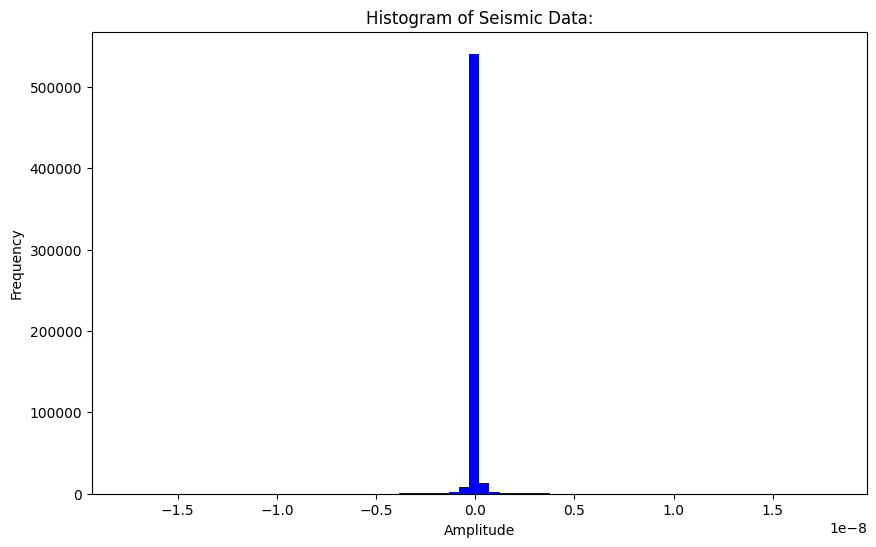

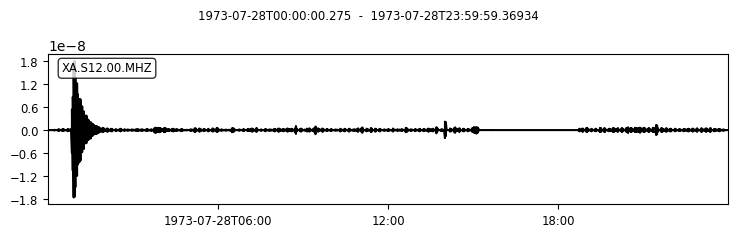

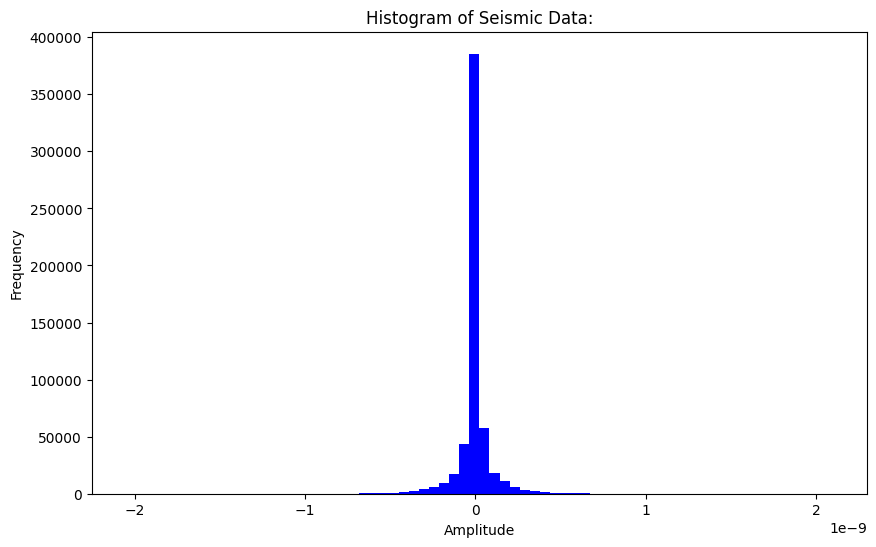

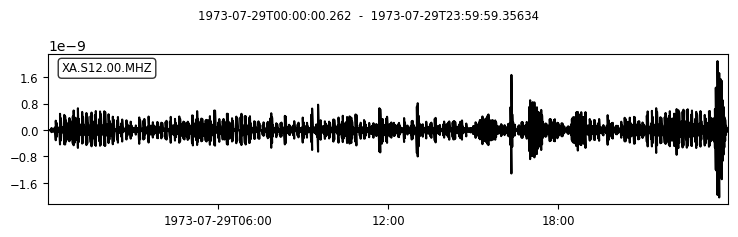

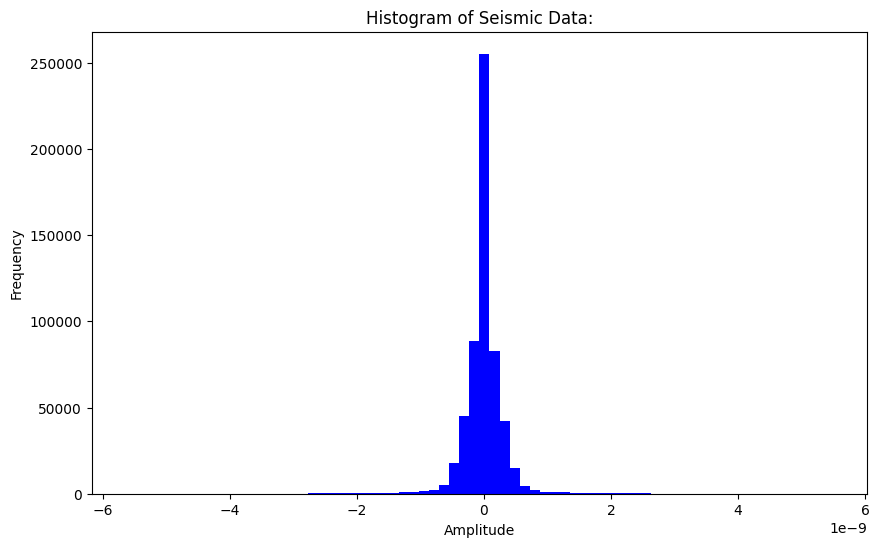

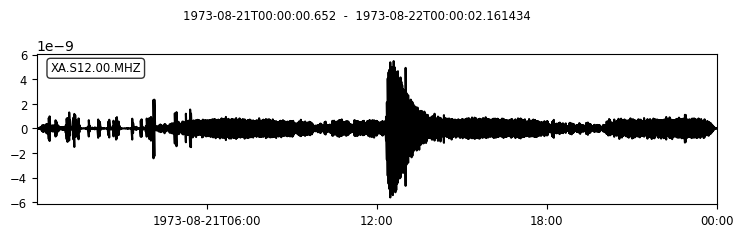

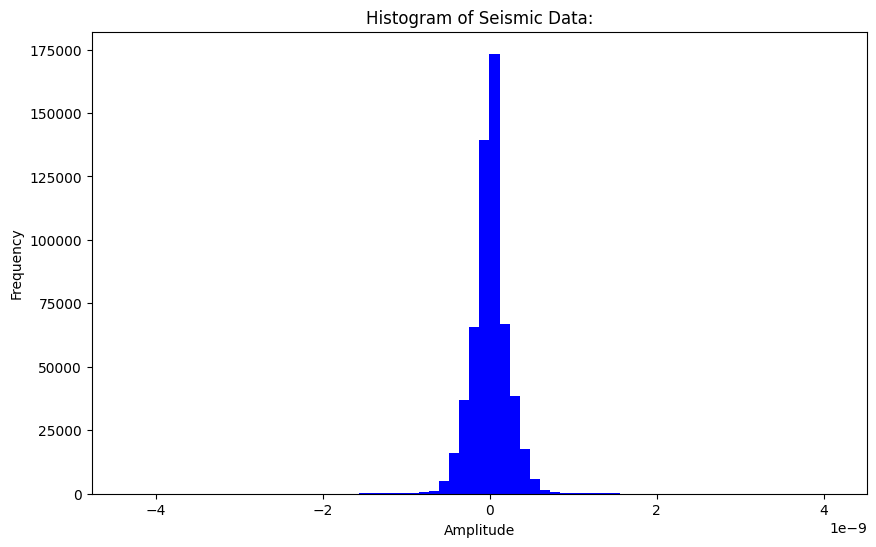

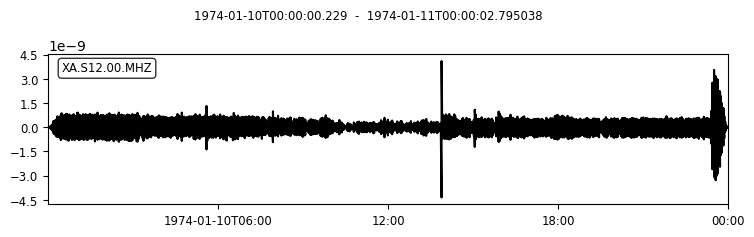

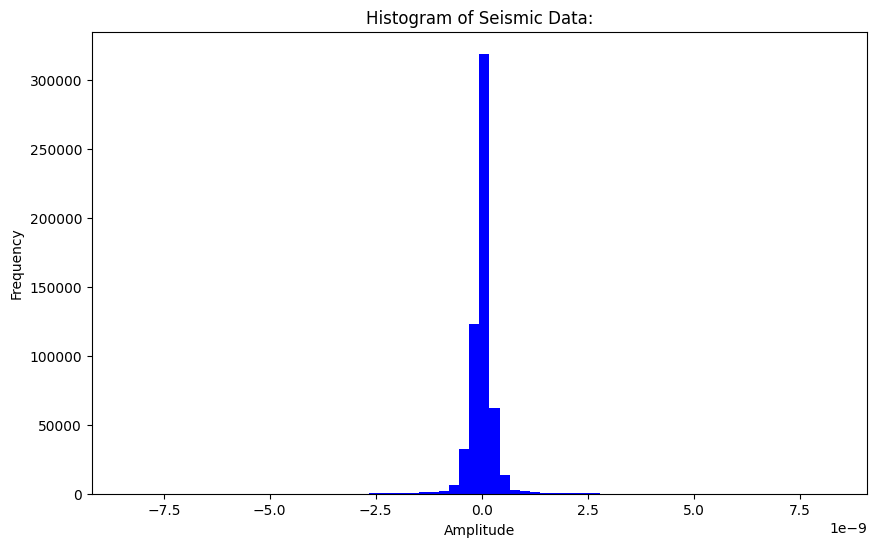

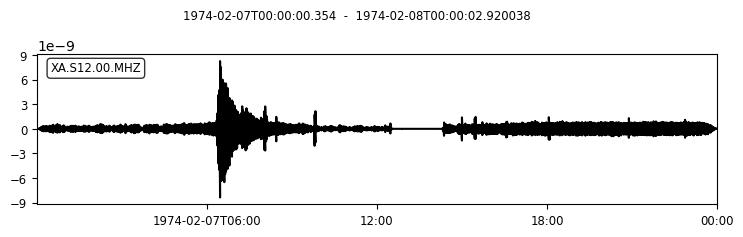

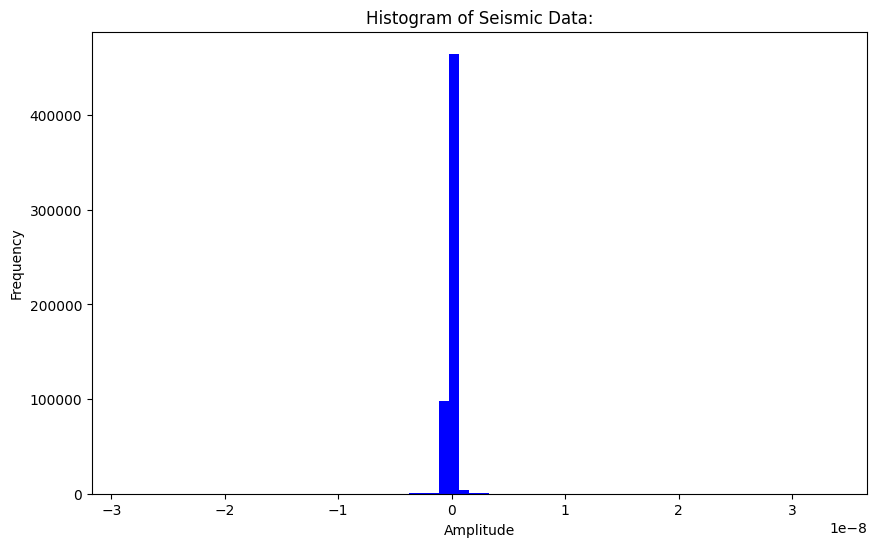

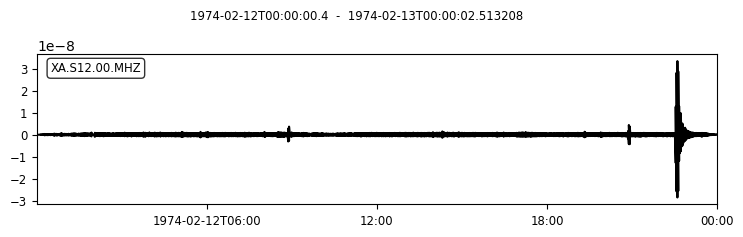

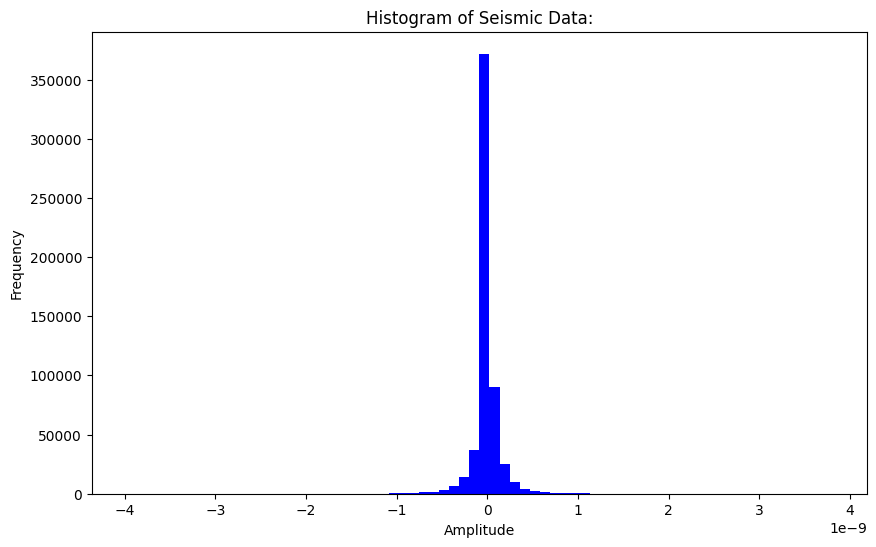

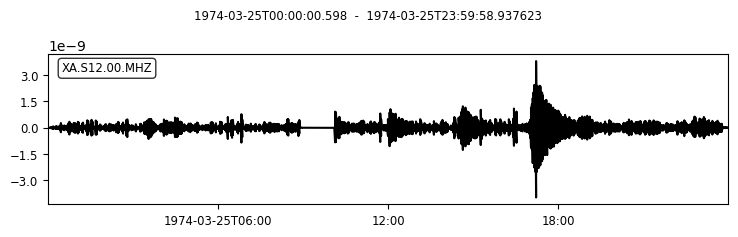

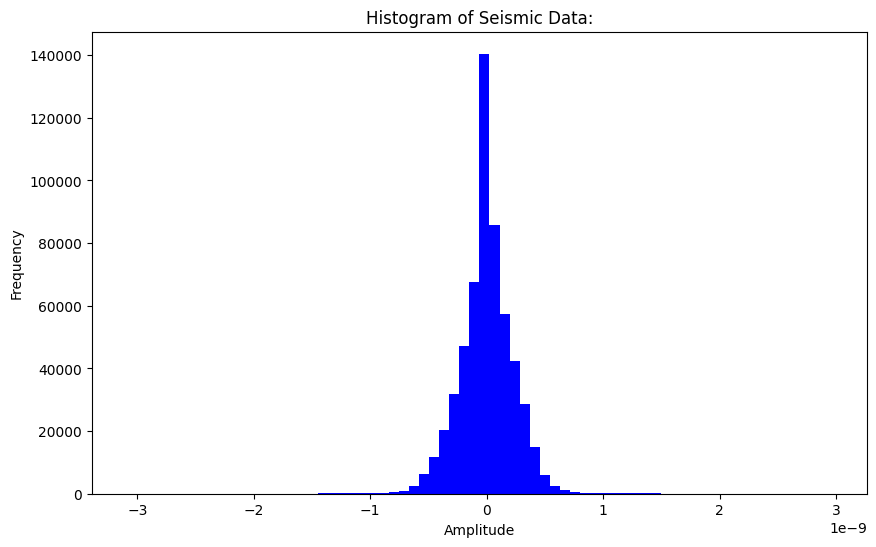

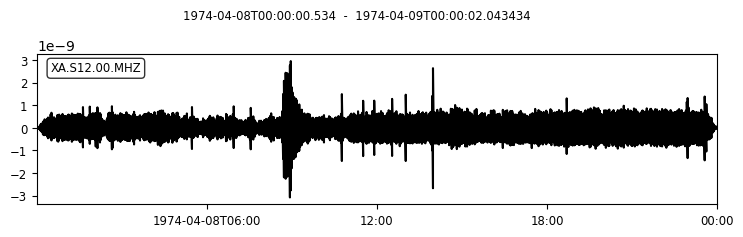

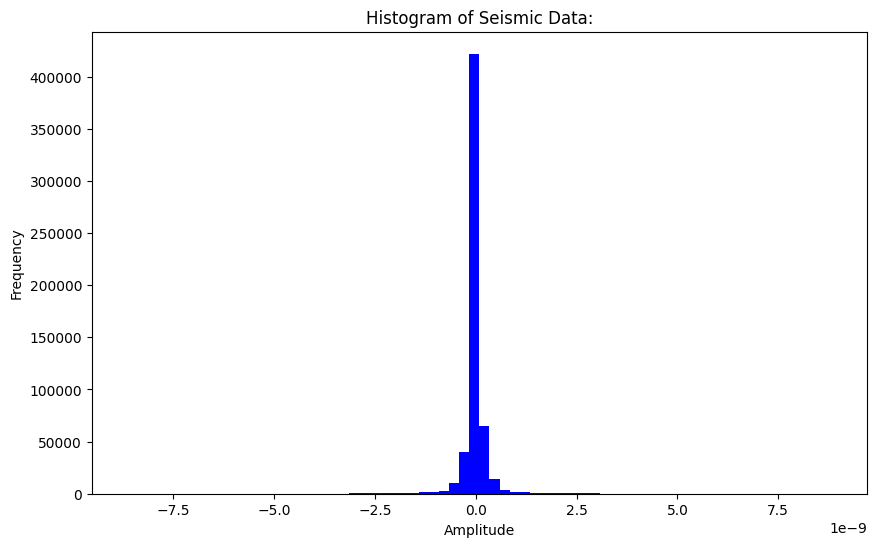

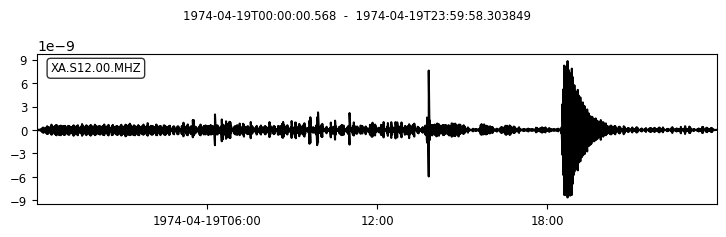

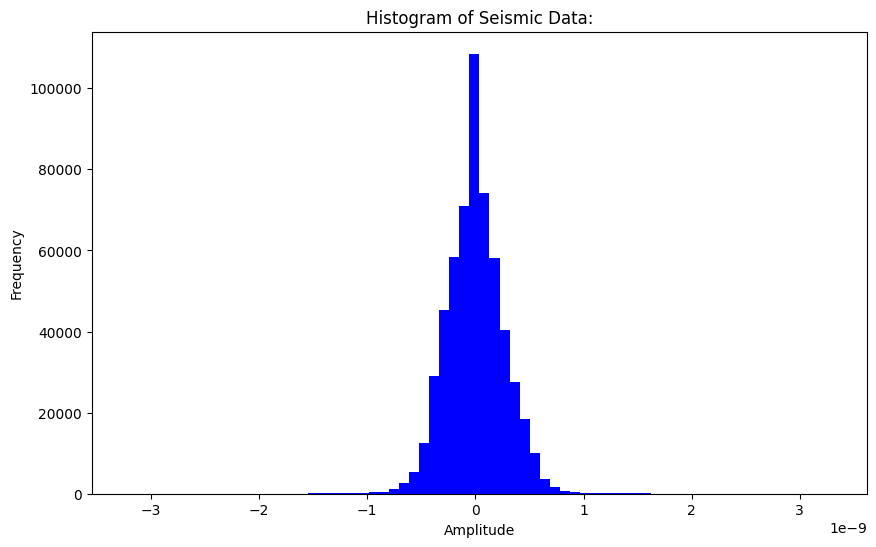

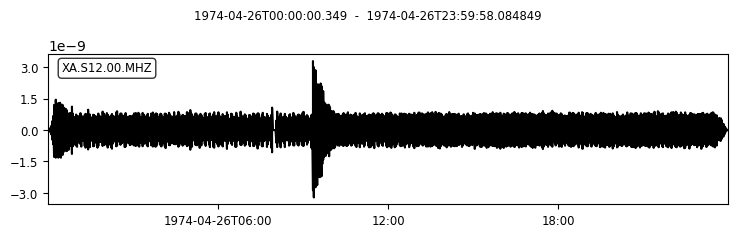

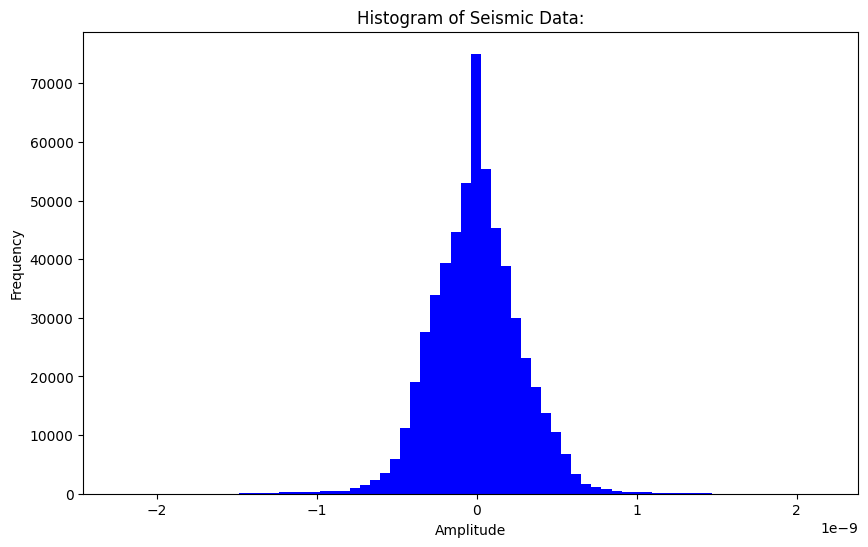

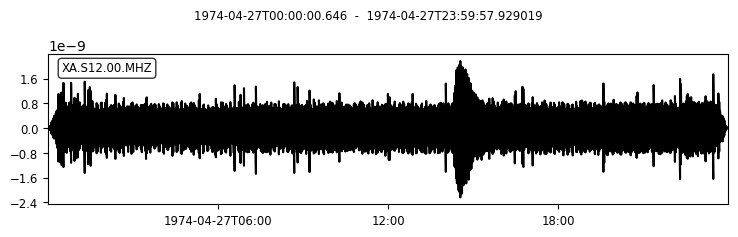

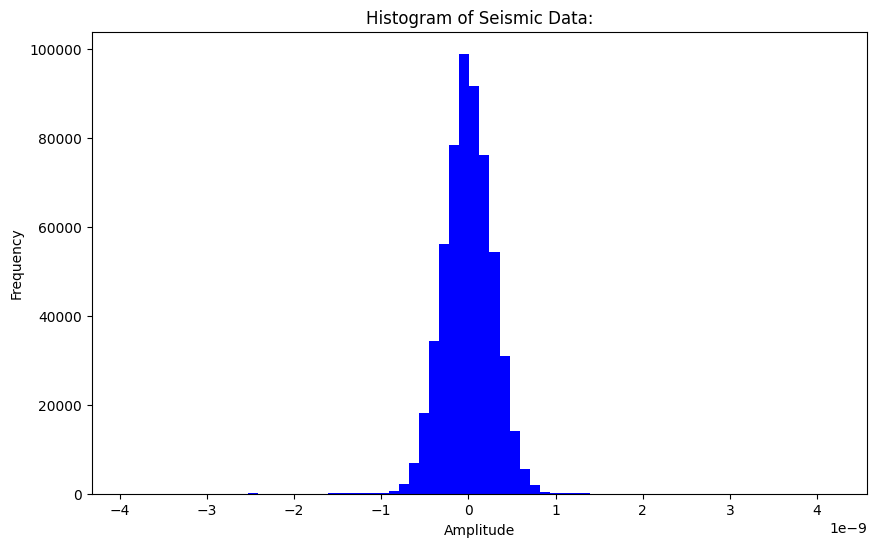

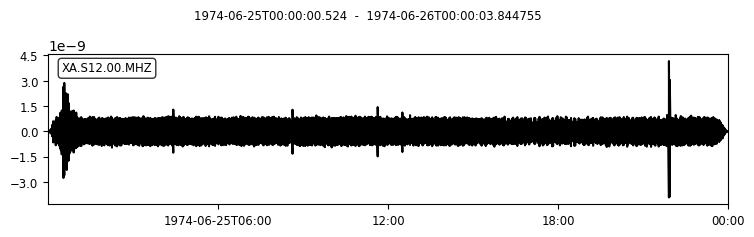

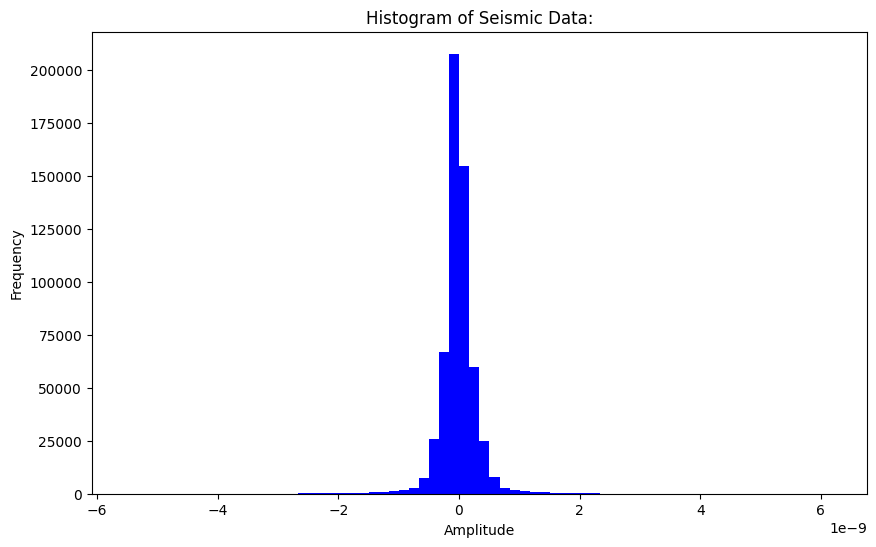

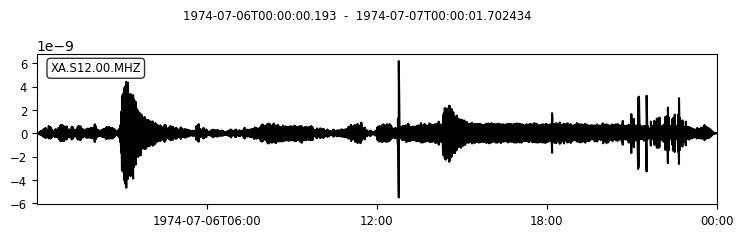

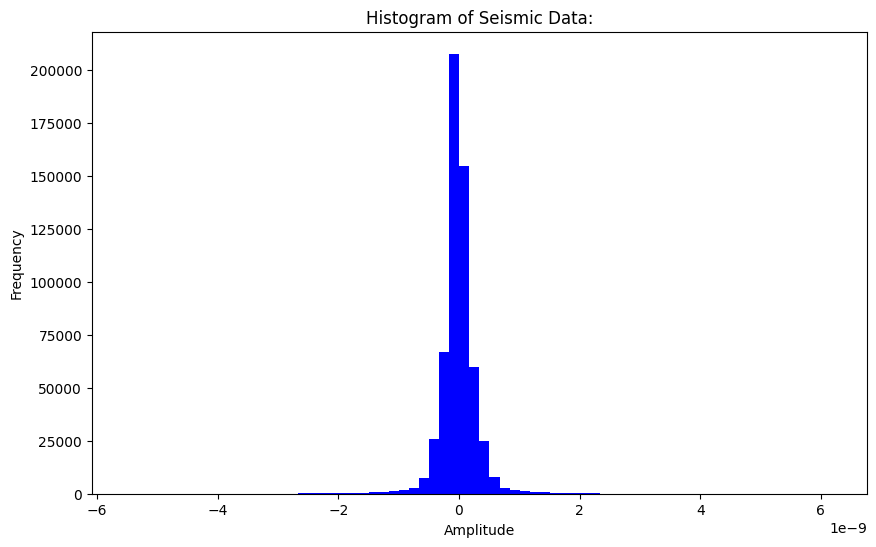

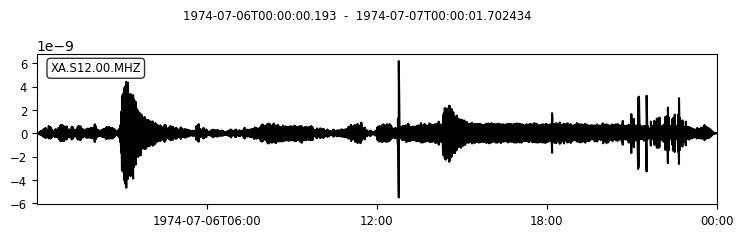

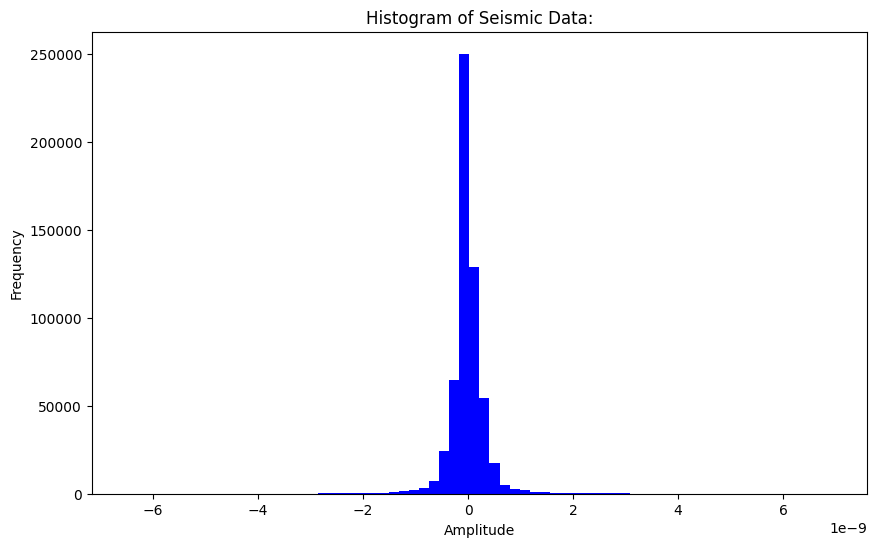

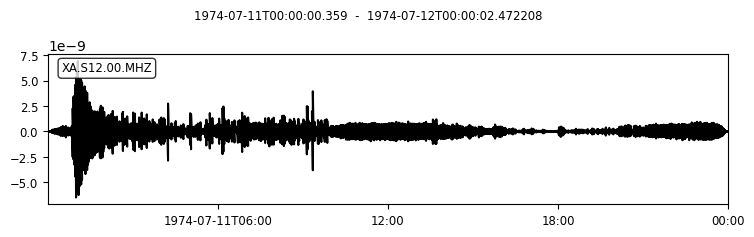

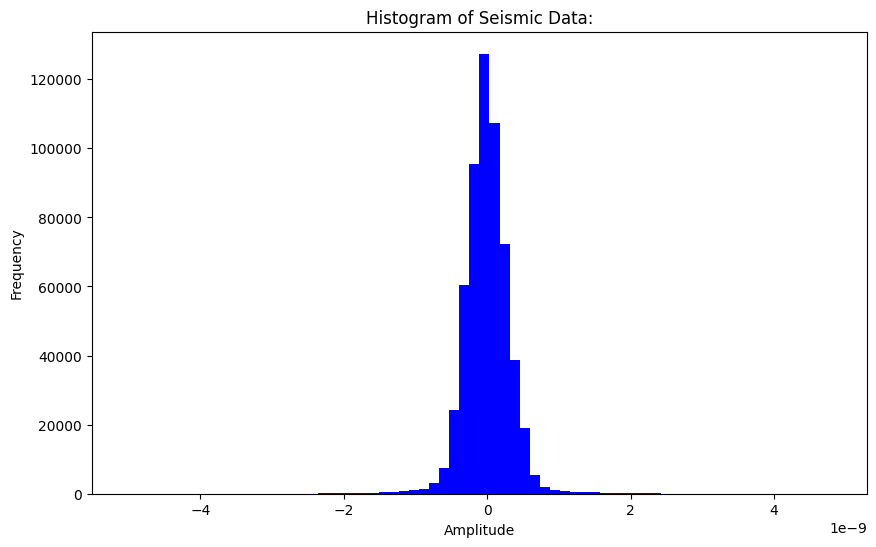

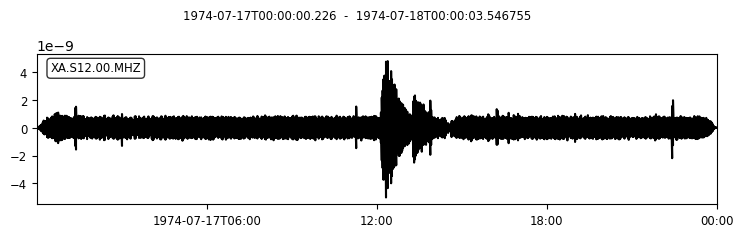

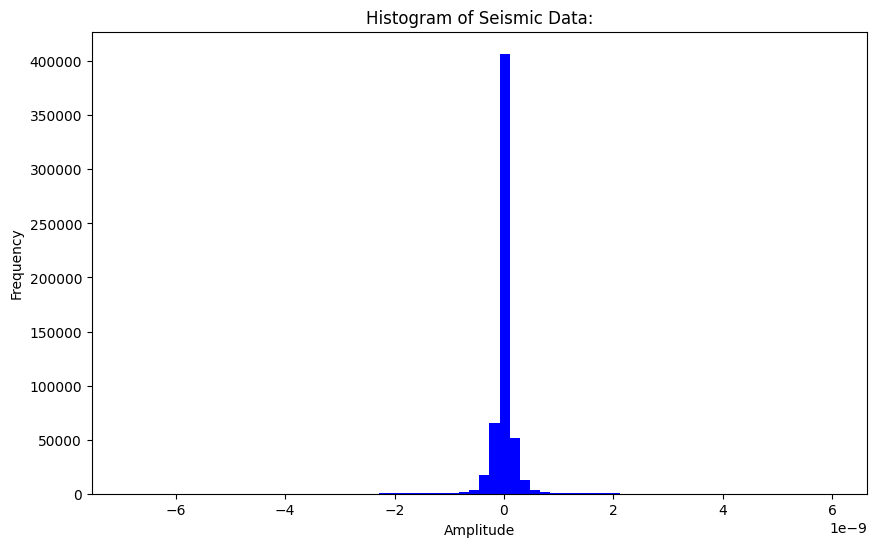

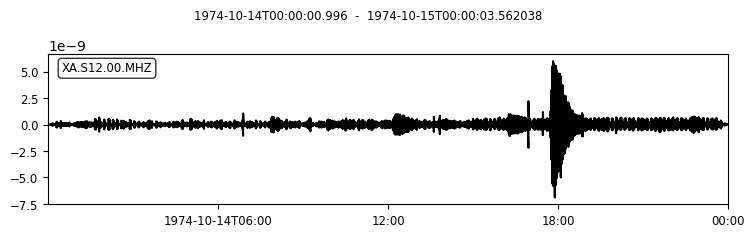

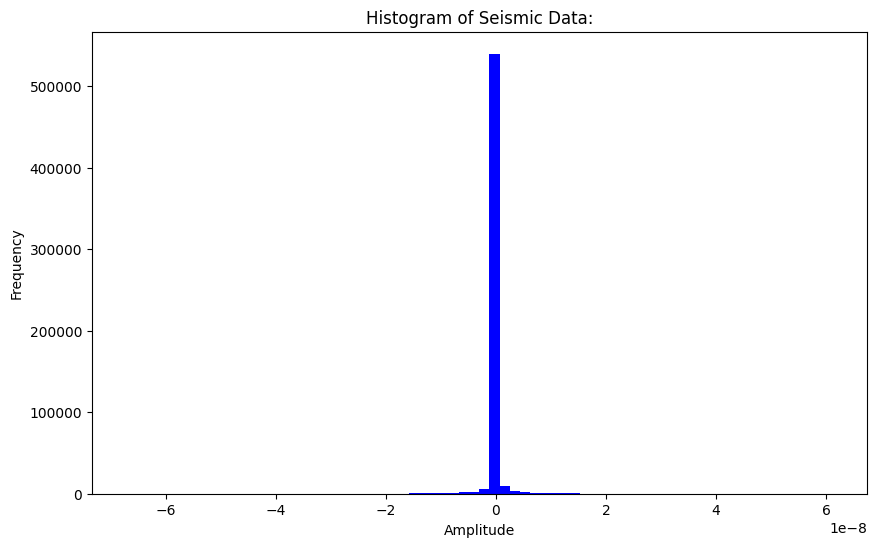

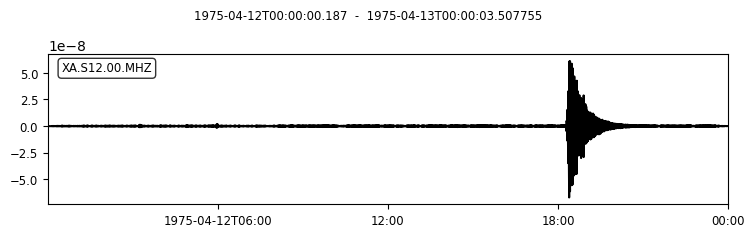

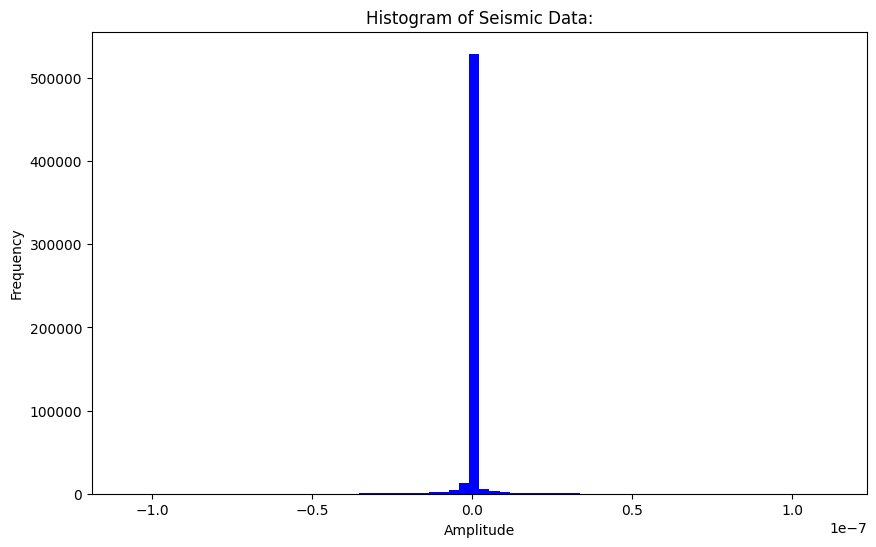

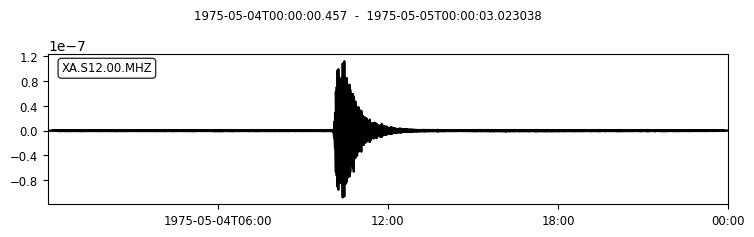

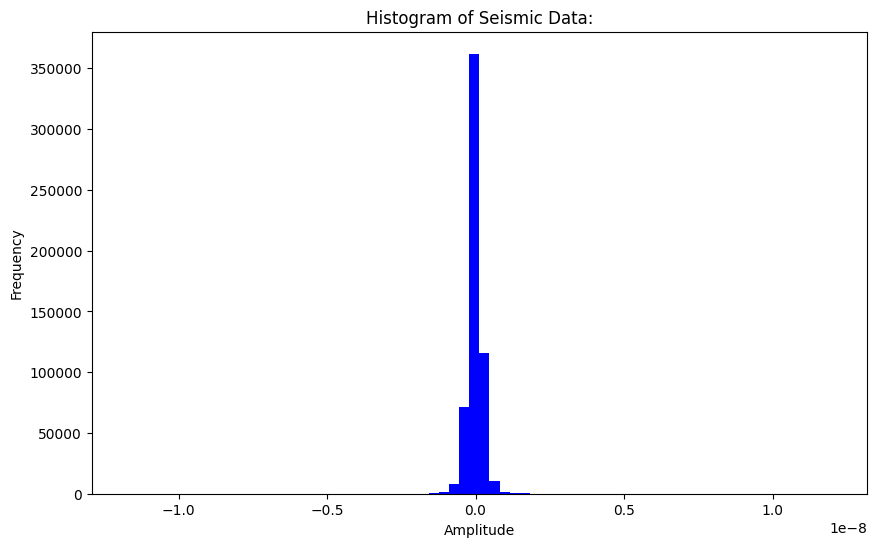

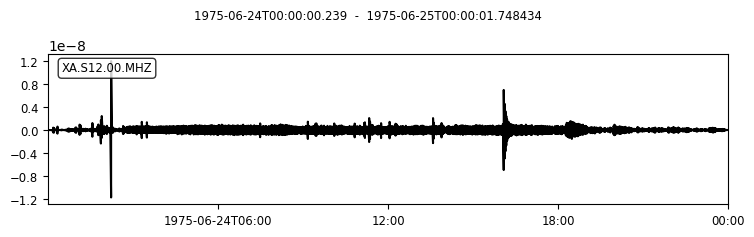

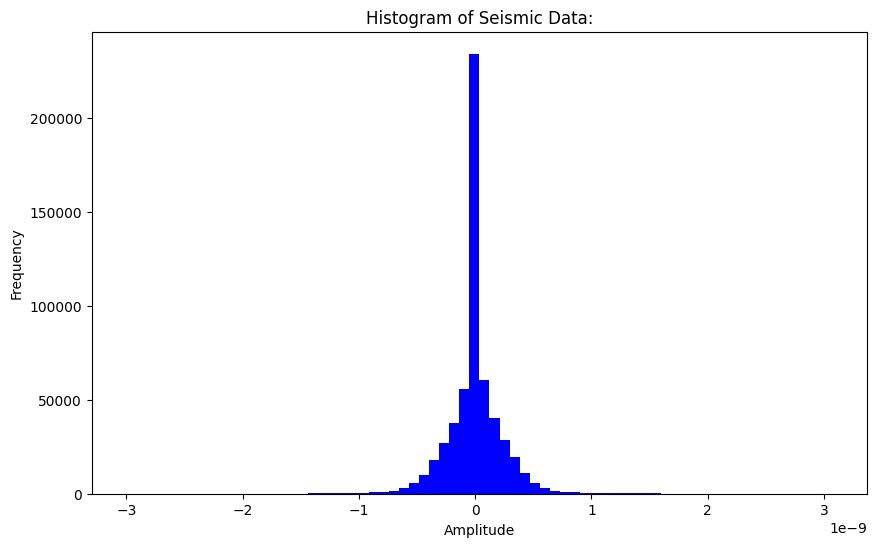

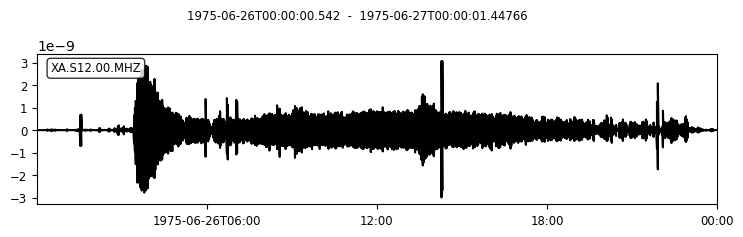

In [2]:
folder_path = 'data/data/lunar/training/data/S12_GradeA/'
csv_files = glob.glob(folder_path + '*.csv')
mseed_files = glob.glob(folder_path + '*.mseed')
csv_files = sorted(csv_files)
mseed_files = sorted(mseed_files)

# Read the CSV file (you can remove this if you don't need to use the CSV file anymore)
df_csv = pd.read_csv("data/data/lunar/training/data/S12_GradeA/xa.s12.00.mhz.1974-04-26HR00_evid00144.csv")

# Iterate through each .mseed file
for file in mseed_files:
    stream = obspy.read(file)

    amplitudes = []
    for trace in stream:
        amplitudes.extend(trace.data)

    plt.figure(figsize=(10, 6))
    plt.hist(amplitudes, bins=70, color='blue')

    # Set the title and labels for the plot
    plt.title(f"Histogram of Seismic Data:")
    plt.xlabel('Amplitude')
    plt.ylabel('Frequency')

    # Show the plot
    plt.show()

    # Optionally, you can also plot the .mseed data itself for visualization
    stream.plot()


In [3]:
# Create a pandas DataFrame from the list of file paths
mseed_files = pd.DataFrame(mseed_files, columns=['File Path'])
# Display the DataFrame
print(type(mseed_files))

<class 'pandas.core.frame.DataFrame'>


In [4]:
csv_files = pd.DataFrame(csv_files, columns=['File Path'])
# Display the DataFrame
print(type(csv_files))

<class 'pandas.core.frame.DataFrame'>


In [5]:
# Path to the folder containing CSV files
folder_path = 'data/data/lunar/training/data/S12_GradeA/'

# Get a list of all CSV files in the folder
csv_files = glob.glob(folder_path + '*.csv')

# Loop through each CSV file and calculate descriptive statistics
for file in csv_files:
    df_csv = pd.read_csv(file)  # Load the CSV file into a DataFrame
    
    # Rename 'time_abs(%Y-%m-%dT%H:%M:%S.%f)' column to 'time_abs' for convenience, if it exists
    if 'time_abs(%Y-%m-%dT%H:%M:%S.%f)' in df_csv.columns:
        df_csv.rename(columns={'time_abs(%Y-%m-%dT%H:%M:%S.%f)': 'time_abs'}, inplace=True)
    
    # Calculate descriptive statistics for 'velocity(m/s)'
    stats = df_csv['velocity(m/s)'].describe()
    velocity_range = df_csv['velocity(m/s)'].max() - df_csv['velocity(m/s)'].min()
    
    # Print the descriptive statistics for each file
    print(f"Descriptive Statistics for {file}:\n", stats)
    print(f"Range: {velocity_range}\n")

Descriptive Statistics for data/data/lunar/training/data/S12_GradeA\xa.s12.00.mhz.1970-01-19HR00_evid00002.csv:
 count    5.724150e+05
mean    -8.443134e-13
std      3.530059e-10
min     -8.185283e-09
25%     -5.504830e-11
50%     -1.633815e-17
75%      5.443508e-11
max      7.874026e-09
Name: velocity(m/s), dtype: float64
Range: 1.6059308421588253e-08

Descriptive Statistics for data/data/lunar/training/data/S12_GradeA\xa.s12.00.mhz.1970-03-25HR00_evid00003.csv:
 count    5.724110e+05
mean    -1.939339e-12
std      3.865140e-10
min     -4.603228e-09
25%     -2.115210e-10
50%      1.764188e-12
75%      2.144111e-10
max      4.707866e-09
Name: velocity(m/s), dtype: float64
Range: 9.311094910414378e-09

Descriptive Statistics for data/data/lunar/training/data/S12_GradeA\xa.s12.00.mhz.1970-03-26HR00_evid00004.csv:
 count    5.724110e+05
mean    -2.980386e-13
std      3.219585e-10
min     -6.144452e-09
25%     -1.356601e-10
50%      3.116433e-16
75%      1.395908e-10
max      5.969005e-09


In [6]:
cat = pd.read_csv(
    "data/data/lunar/training/catalogs/apollo12_catalog_GradeA_final.csv"
)
cat

filename time_abs(%Y-%m-%dT%H:%M:%S.%f)  \
0   xa.s12.00.mhz.1970-01-19HR00_evid00002     1970-01-19T20:25:00.000000   
1   xa.s12.00.mhz.1970-03-25HR00_evid00003     1970-03-25T03:32:00.000000   
2   xa.s12.00.mhz.1970-03-26HR00_evid00004     1970-03-26T20:17:00.000000   
3   xa.s12.00.mhz.1970-04-25HR00_evid00006     1970-04-25T01:14:00.000000   
4   xa.s12.00.mhz.1970-04-26HR00_evid00007     1970-04-26T14:29:00.000000   
..                                     ...                            ...   
71  xa.s12.00.mhz.1974-10-14HR00_evid00156     1974-10-14T17:43:00.000000   
72  xa.s12.00.mhz.1975-04-12HR00_evid00191     1975-04-12T18:15:00.000000   
73  xa.s12.00.mhz.1975-05-04HR00_evid00192     1975-05-04T10:05:00.000000   
74  xa.s12.00.mhz.1975-06-24HR00_evid00196     1975-06-24T16:03:00.000000   
75  xa.s12.00.mhz.1975-06-26HR00_evid00198     1975-06-26T03:24:00.000000   

    time_rel(sec)       evid    mq_type  
0         73500.0  evid00002  impact_mq  
1         12720.0  evid00003  impact_mq  
2         73020.0  evid00004  impact_mq  
3          4440.0  evid00006  impact_mq  
4         52140.0  evid00007    deep_mq  
..            ...        ...        ...  
71        63780.0  evid00156  impact_mq  
72        65700.0  evid00191  impact_mq  
73        36300.0  evid00192  impact_mq  
74        57780.0  evid00196  impact_mq  
75        12240.0  evid00198  impact_mq  

[76 rows x 5 columns]

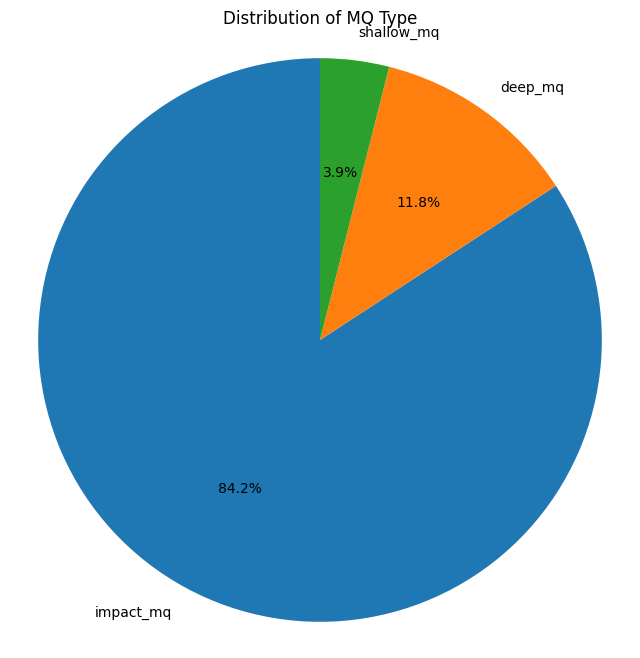

In [7]:
mq_counts = cat["mq_type"].value_counts()

# Plot the pie chart
plt.figure(figsize=(8, 8))
plt.pie(mq_counts, labels=mq_counts.index, autopct='%1.1f%%', startangle=90)
plt.title("Distribution of MQ Type")
plt.axis('equal')
plt.show()


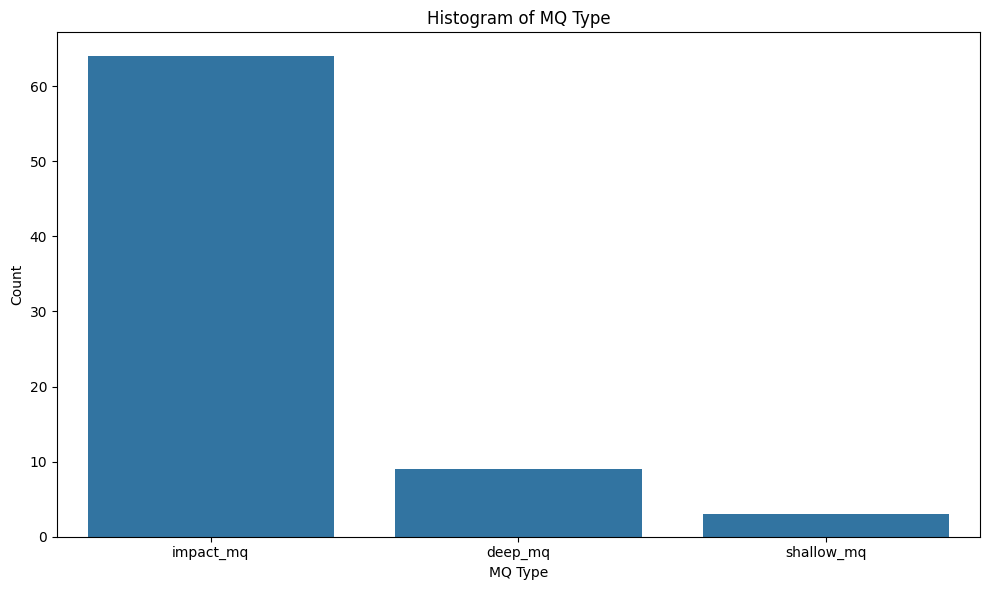

In [8]:
# Create a histogram for 'mq_type'
plt.figure(figsize=(10, 6))
sns.countplot(x='mq_type', data=cat)

# Set plot title and labels
plt.title("Histogram of MQ Type")
plt.xlabel("MQ Type")
plt.ylabel("Count")

# Show the plot
plt.tight_layout()
plt.show()


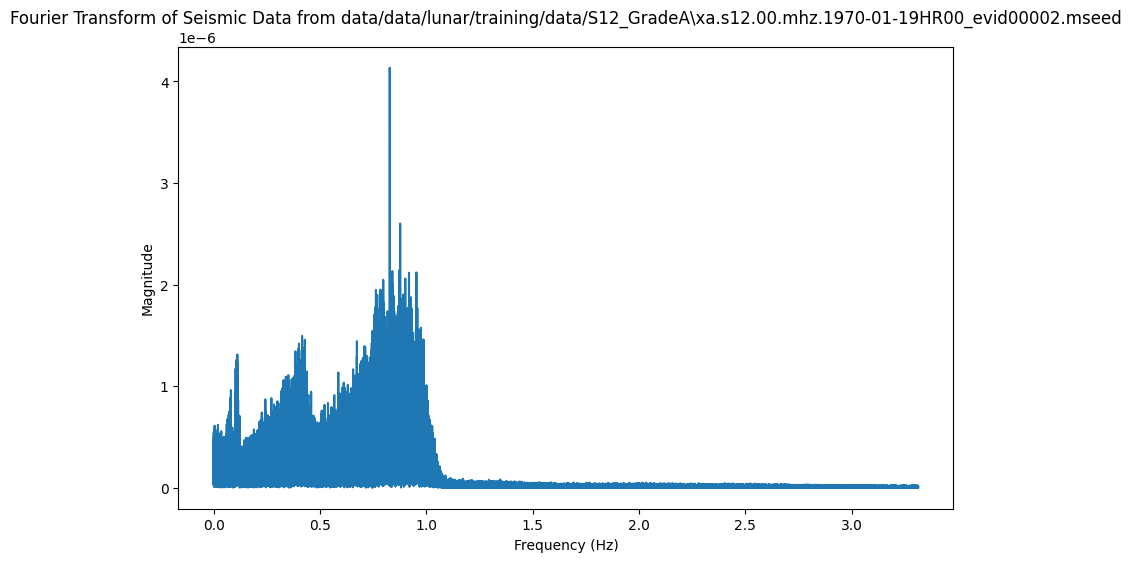

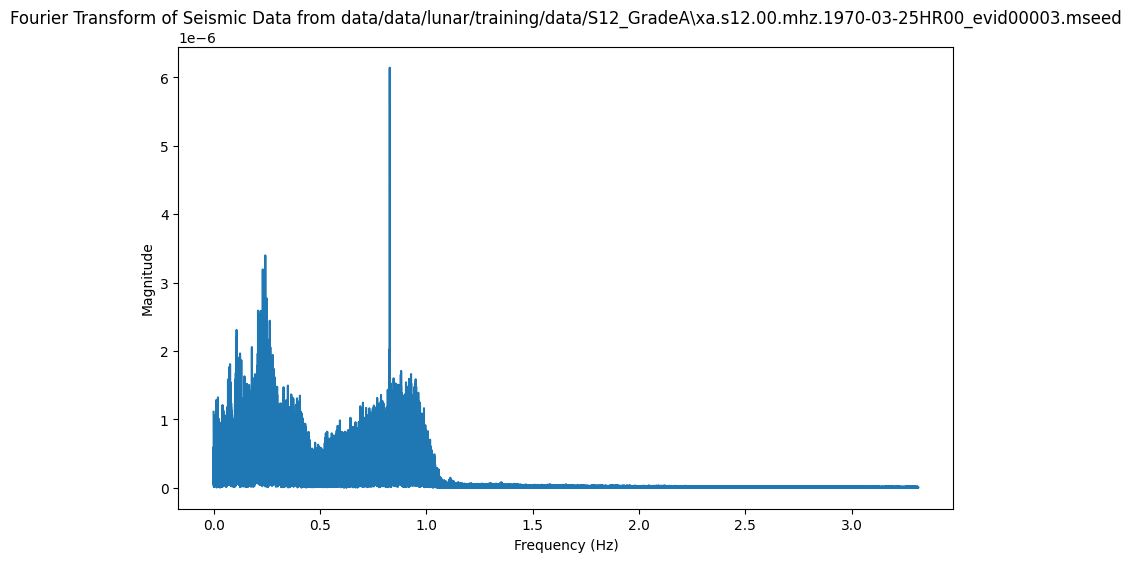

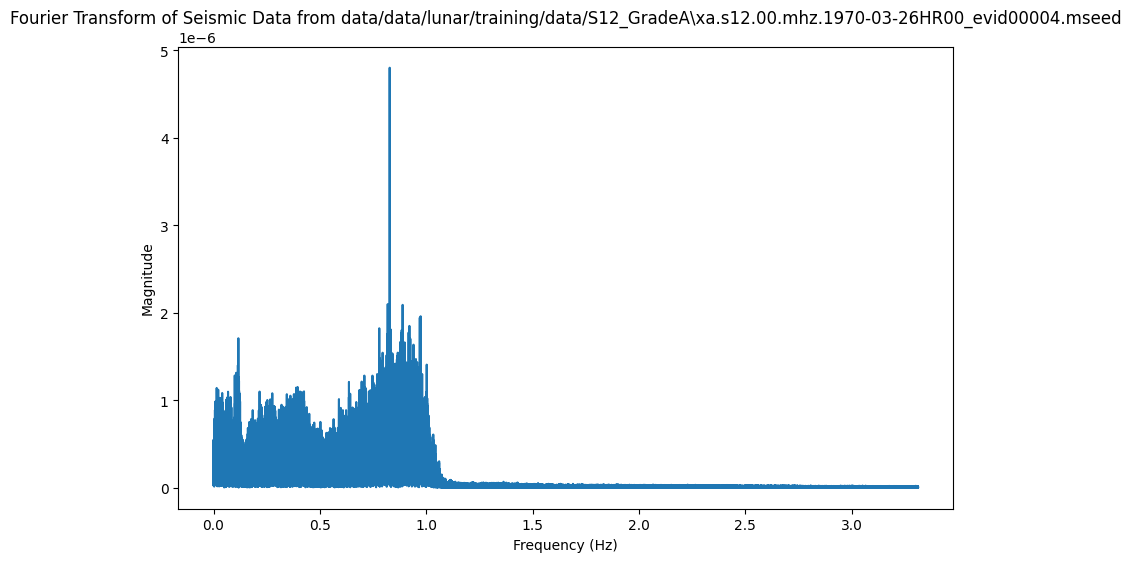

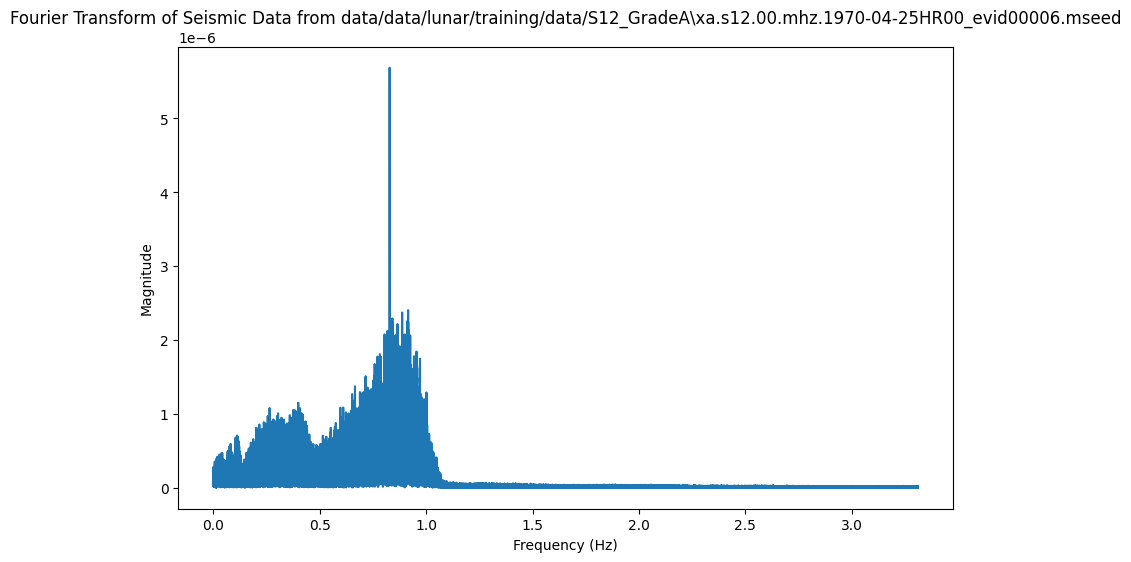

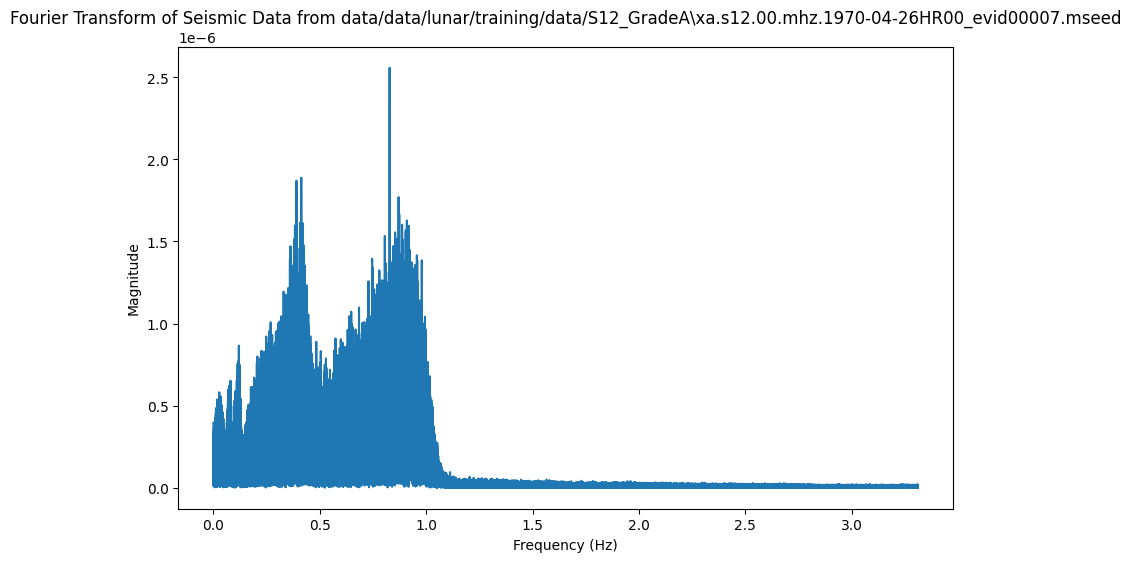

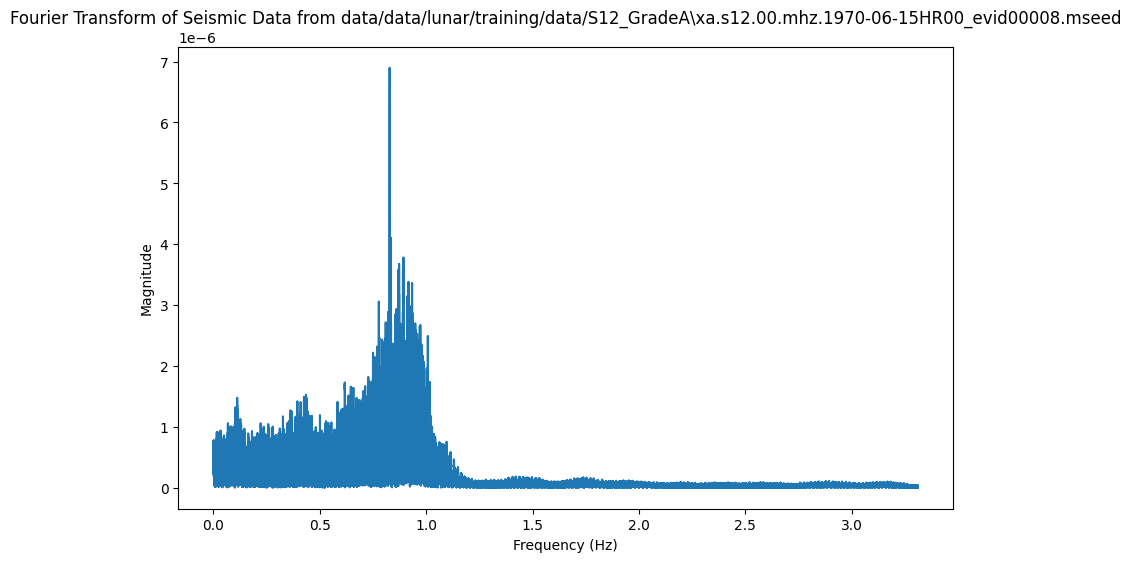

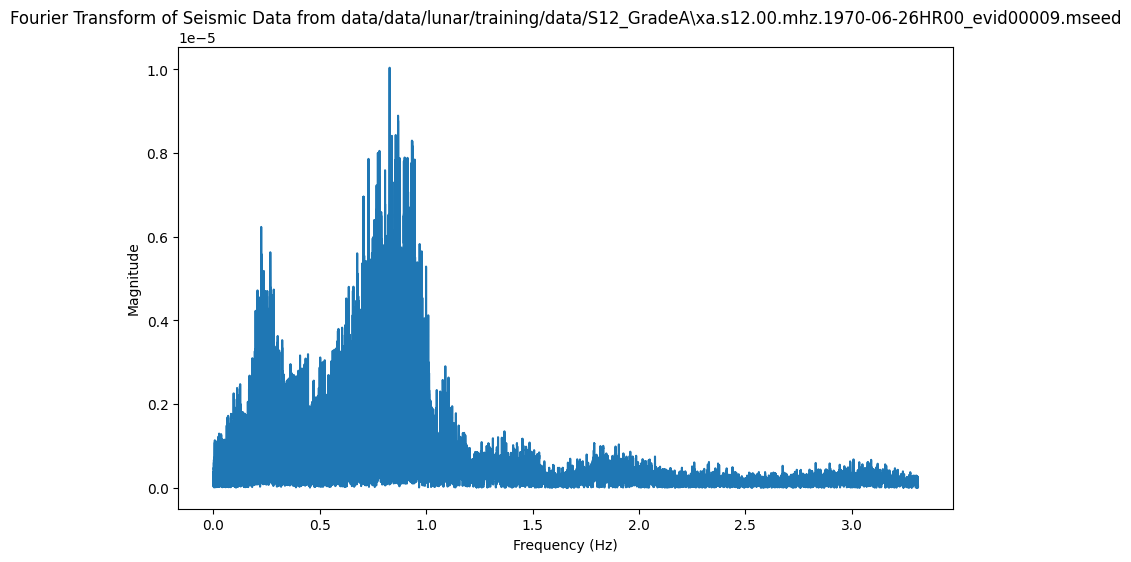

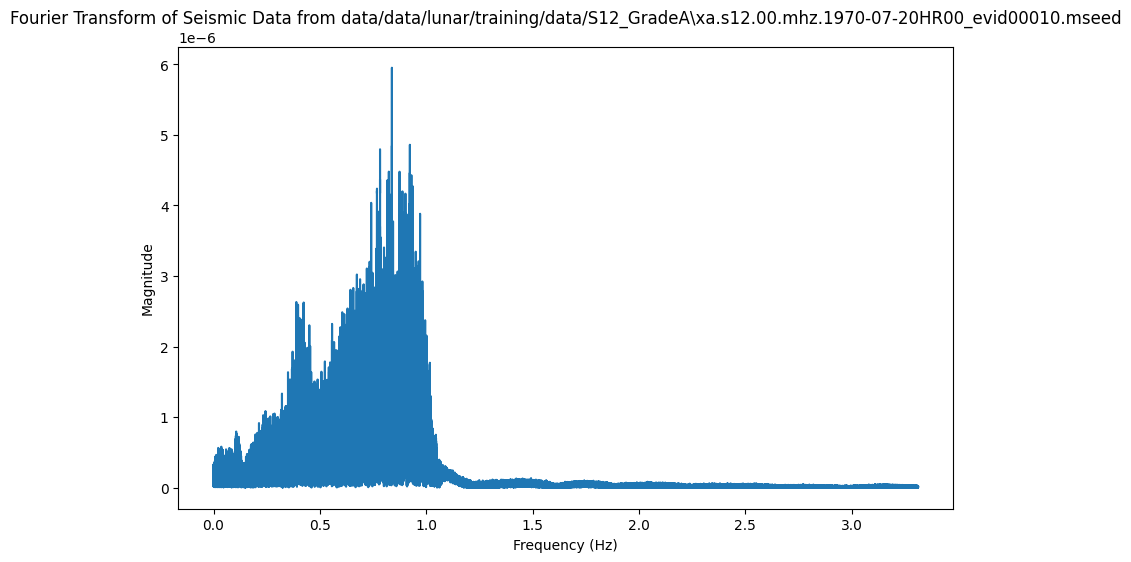

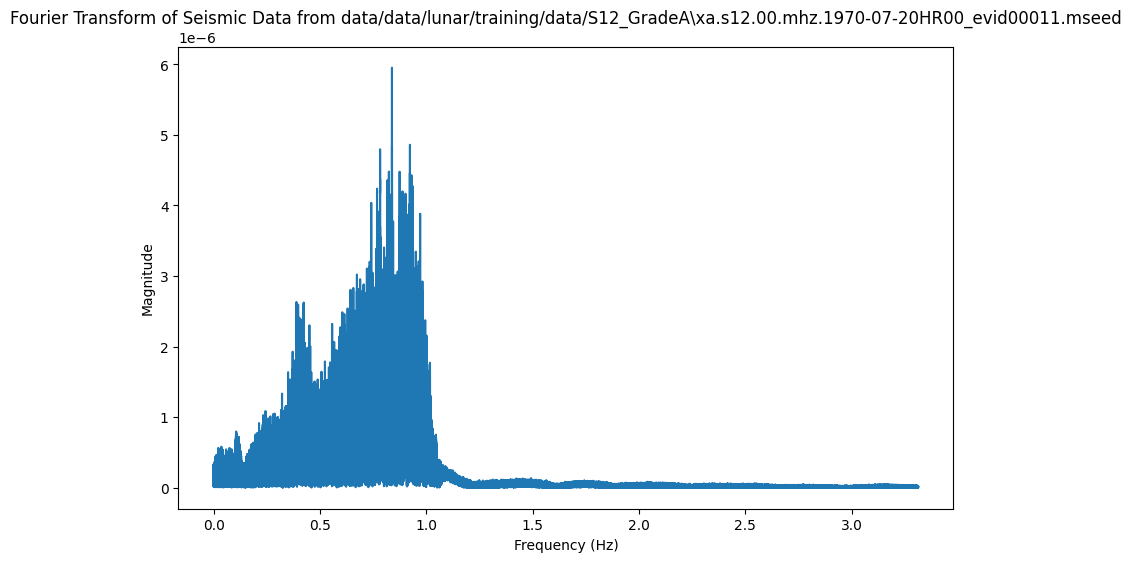

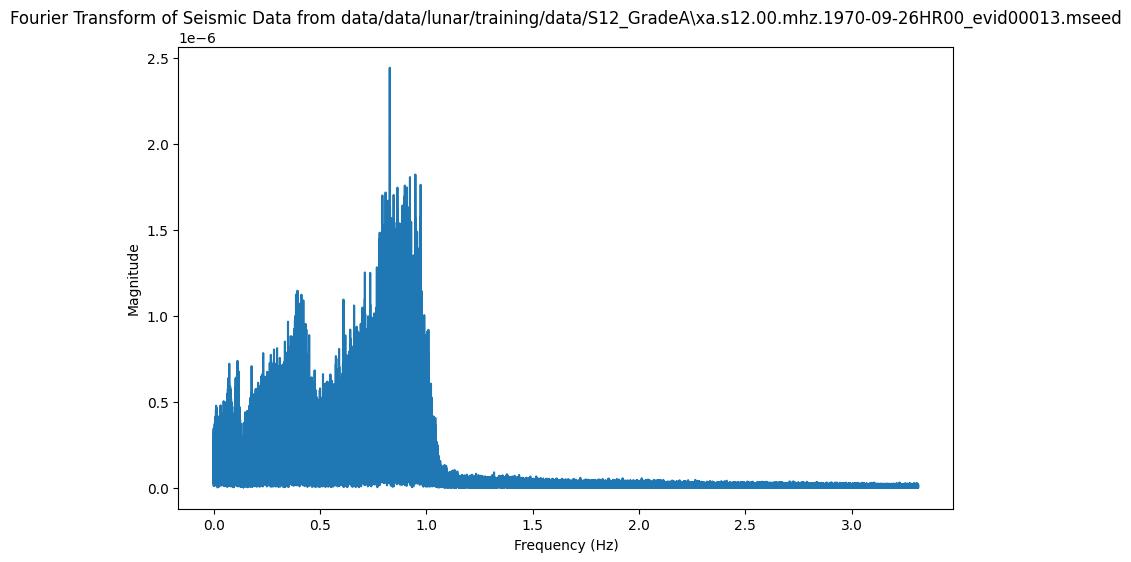

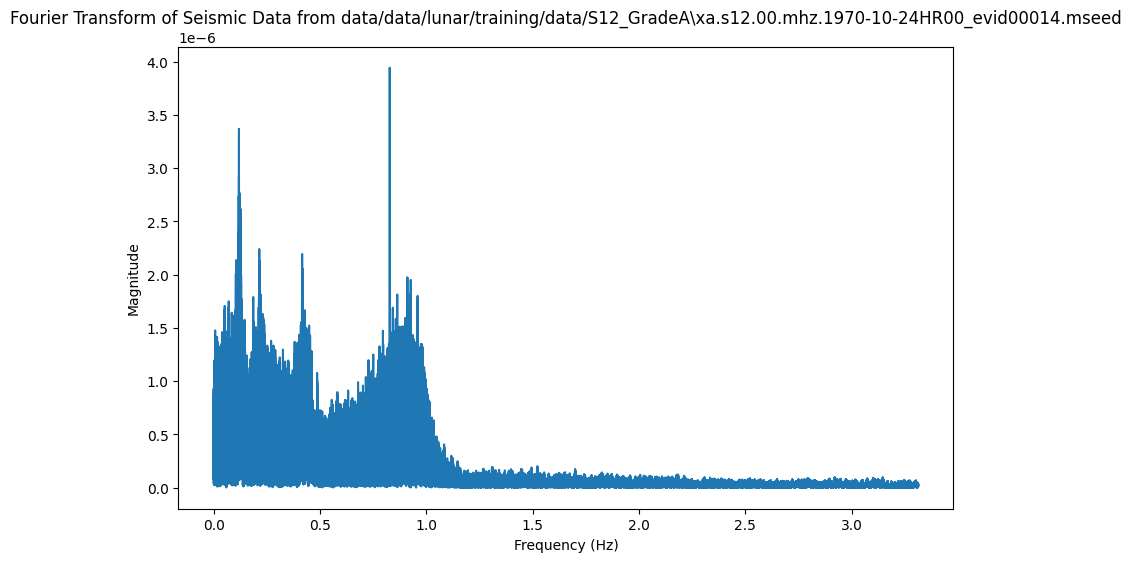

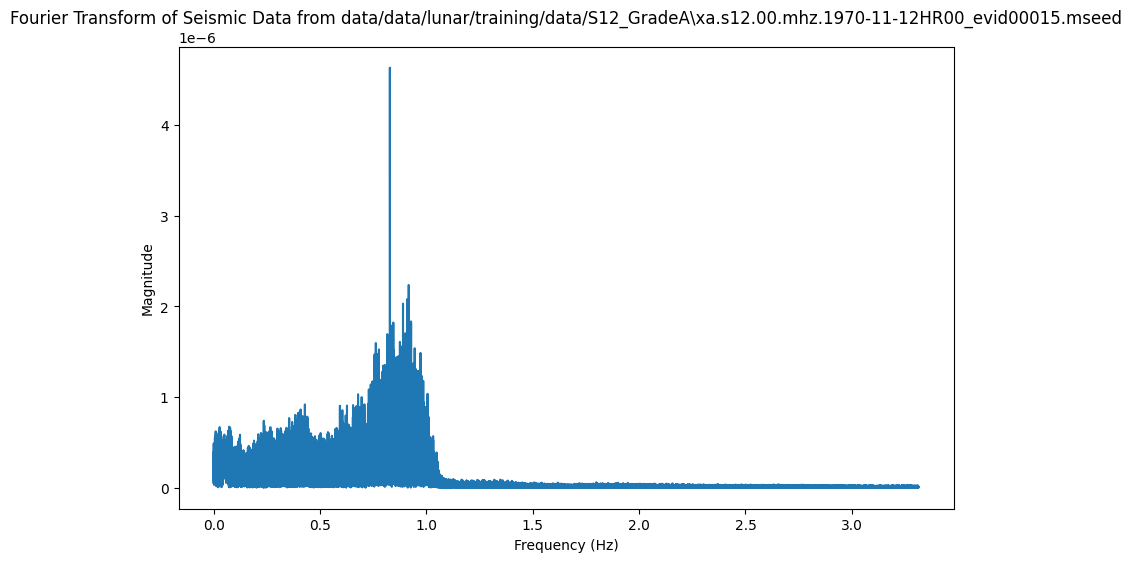

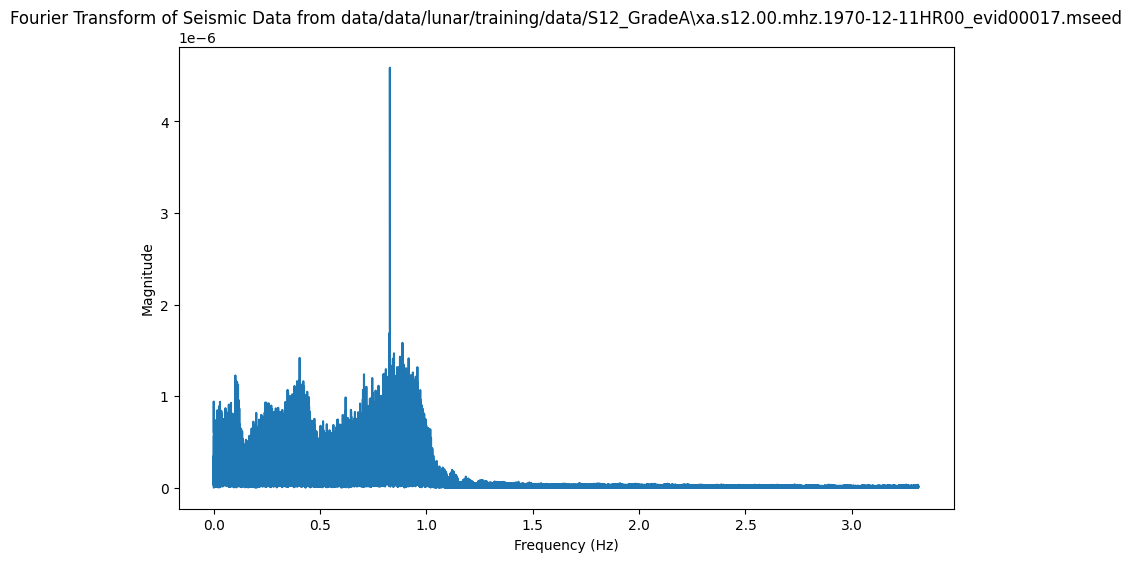

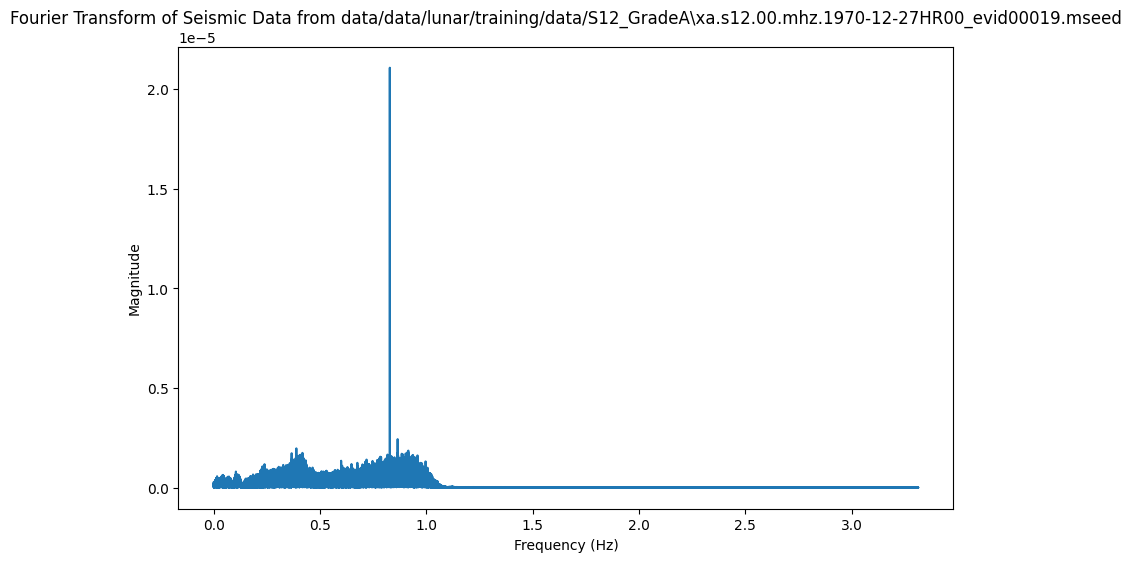

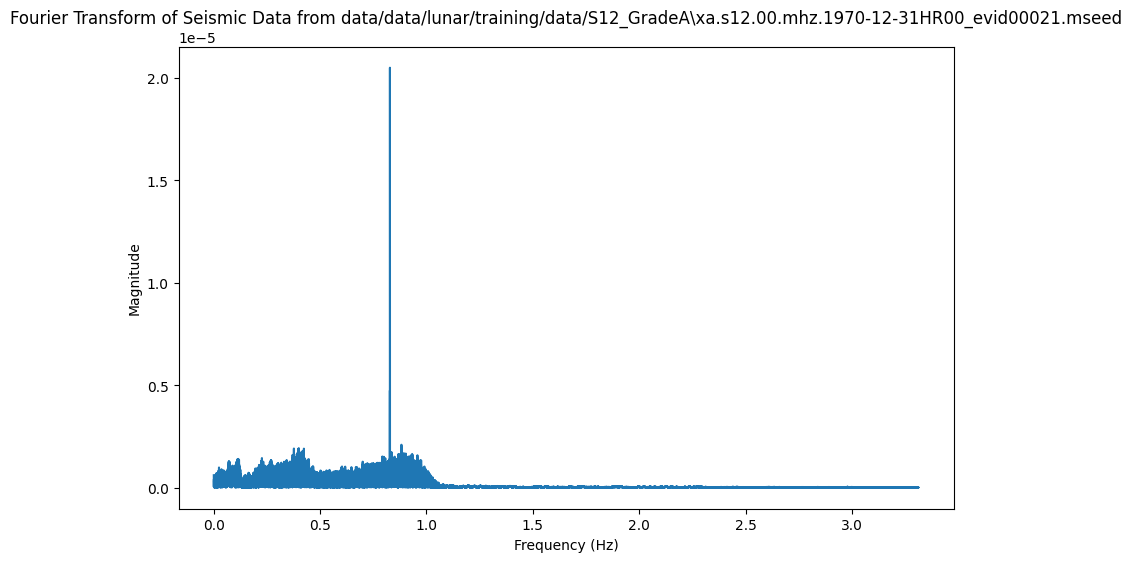

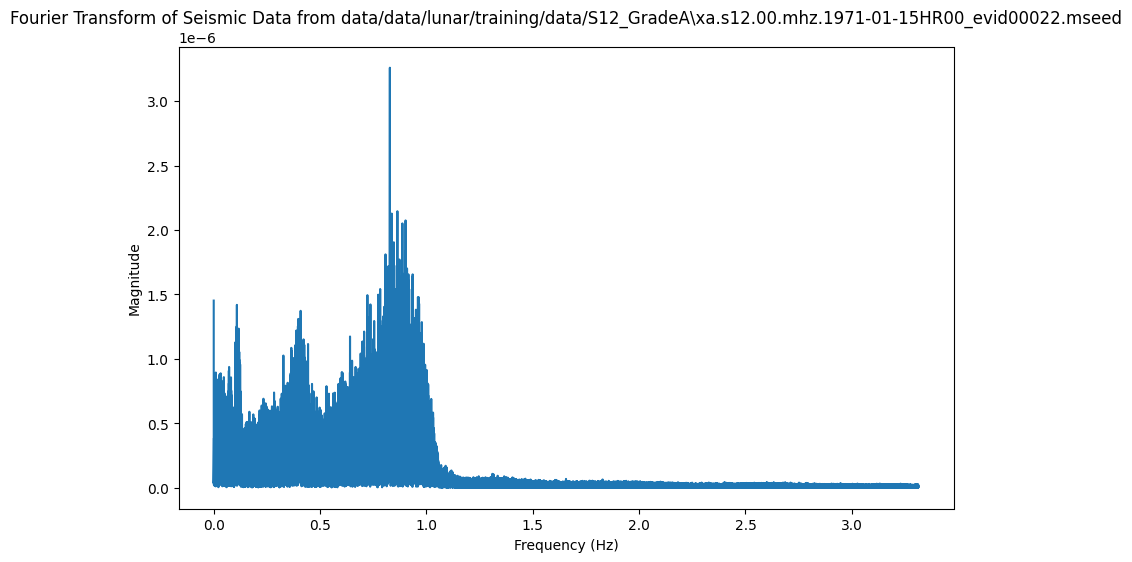

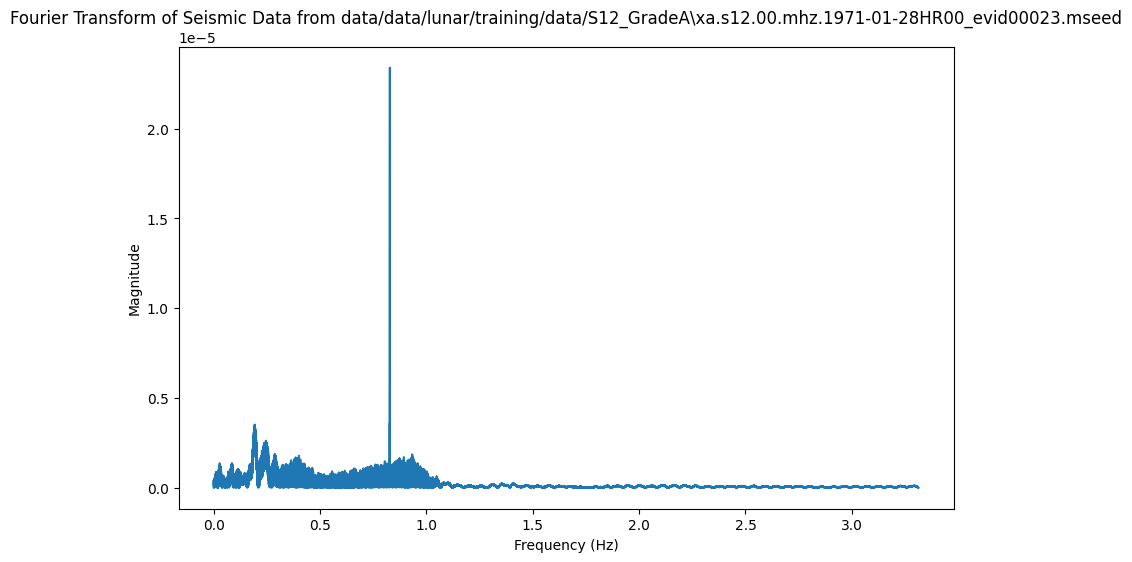

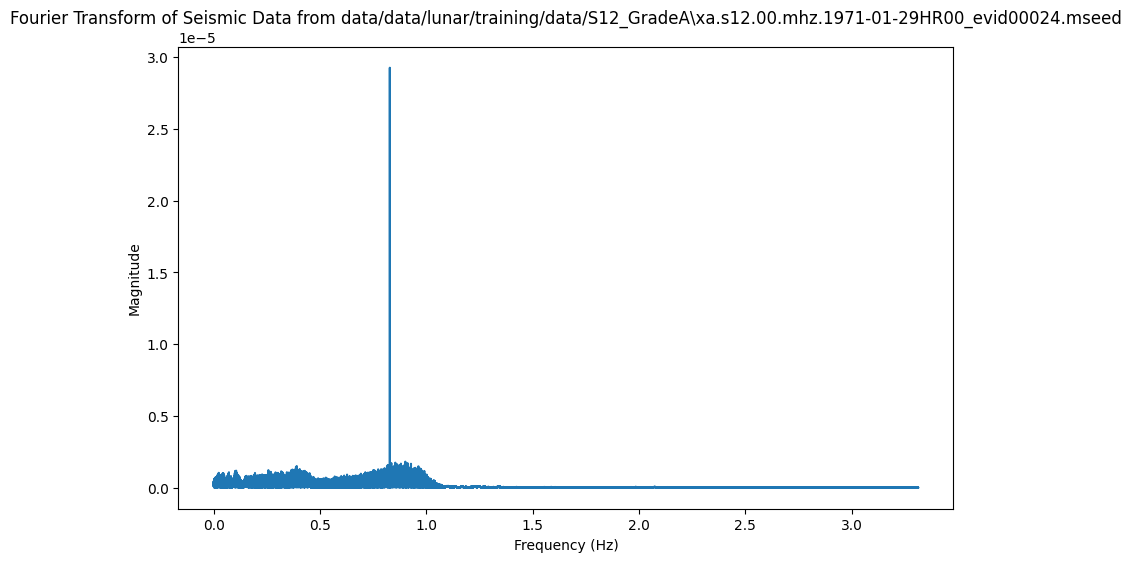

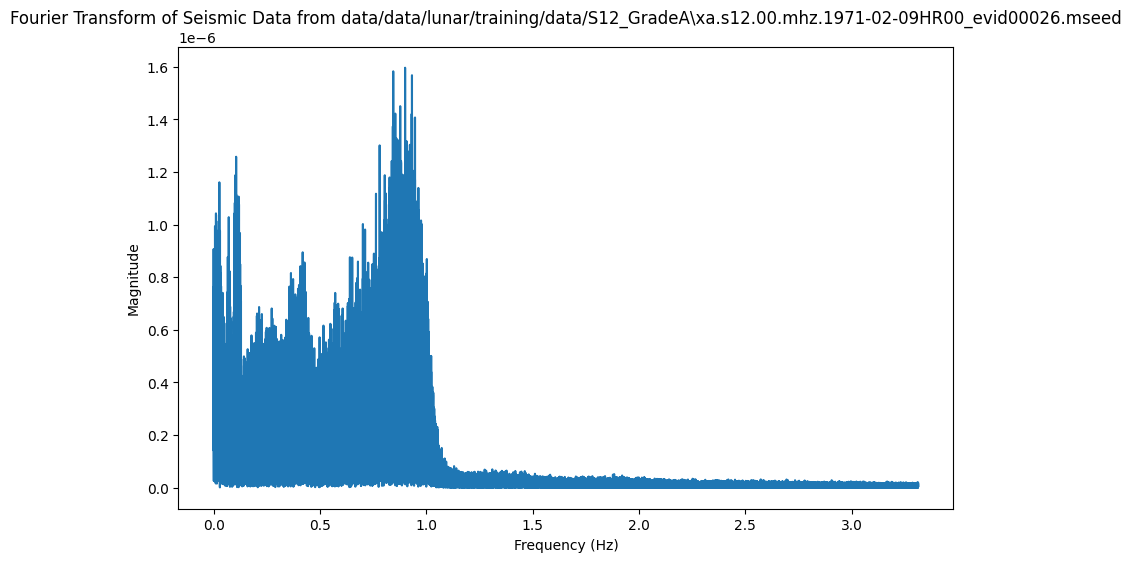

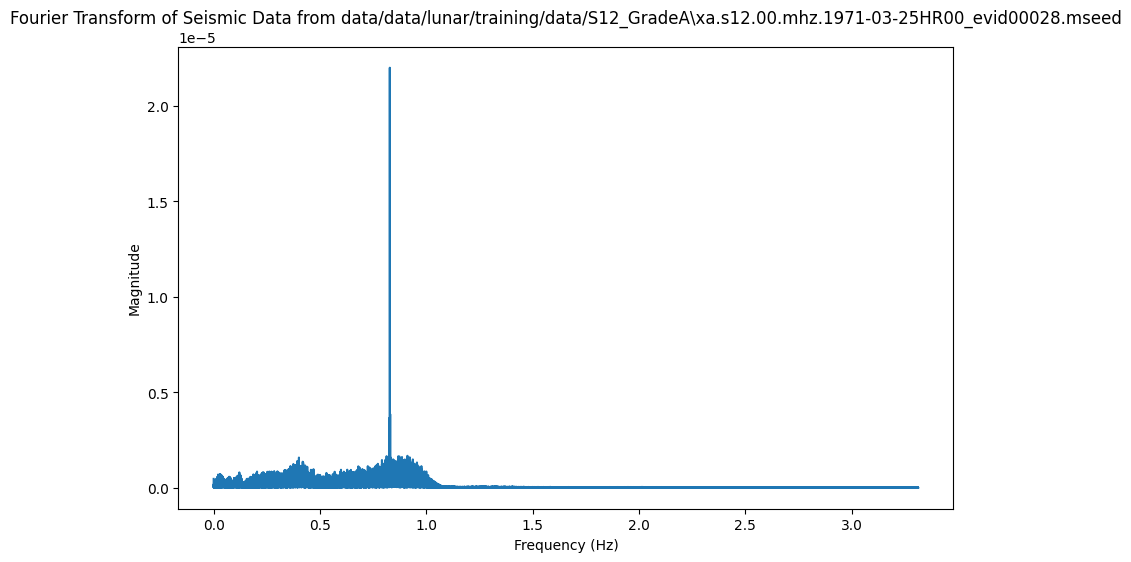

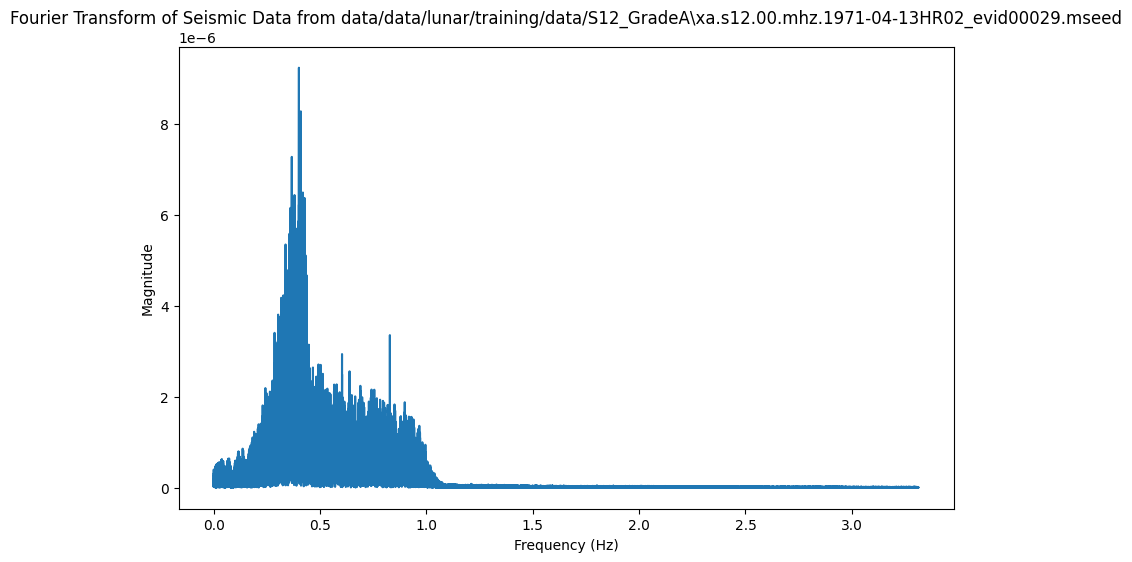

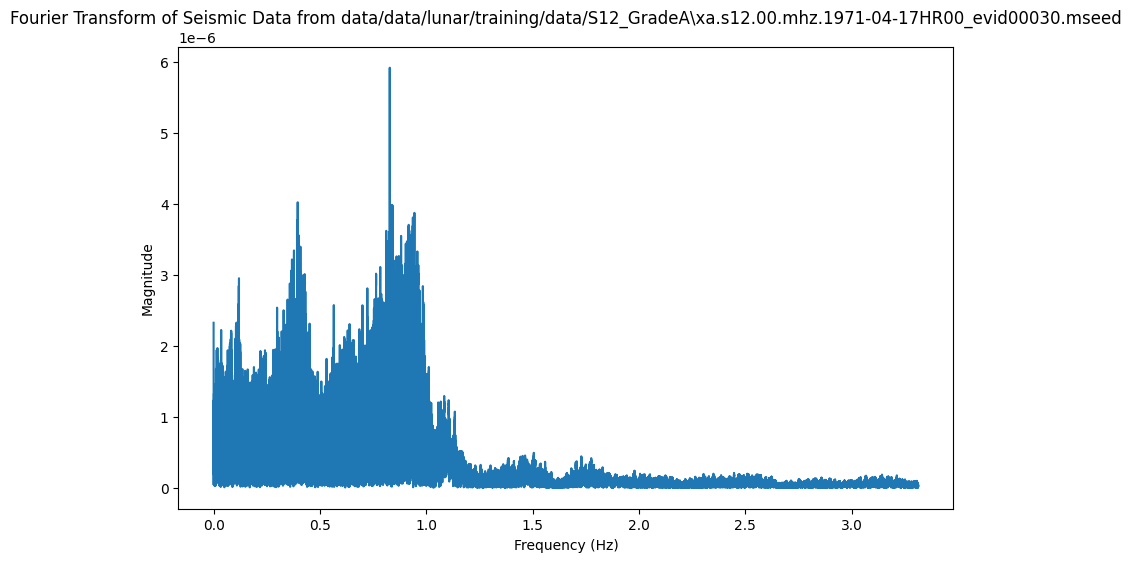

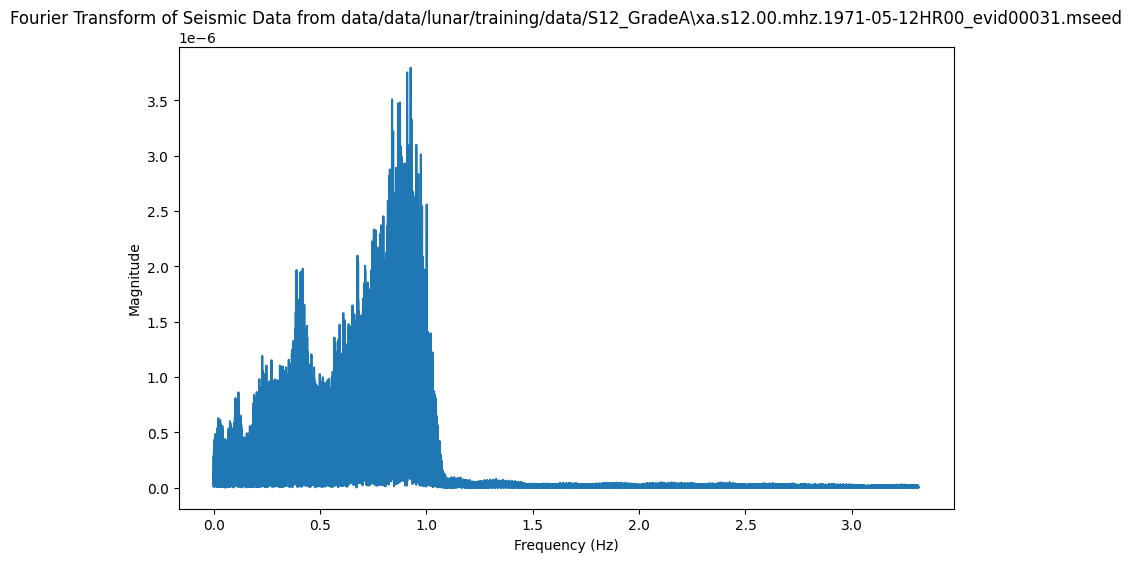

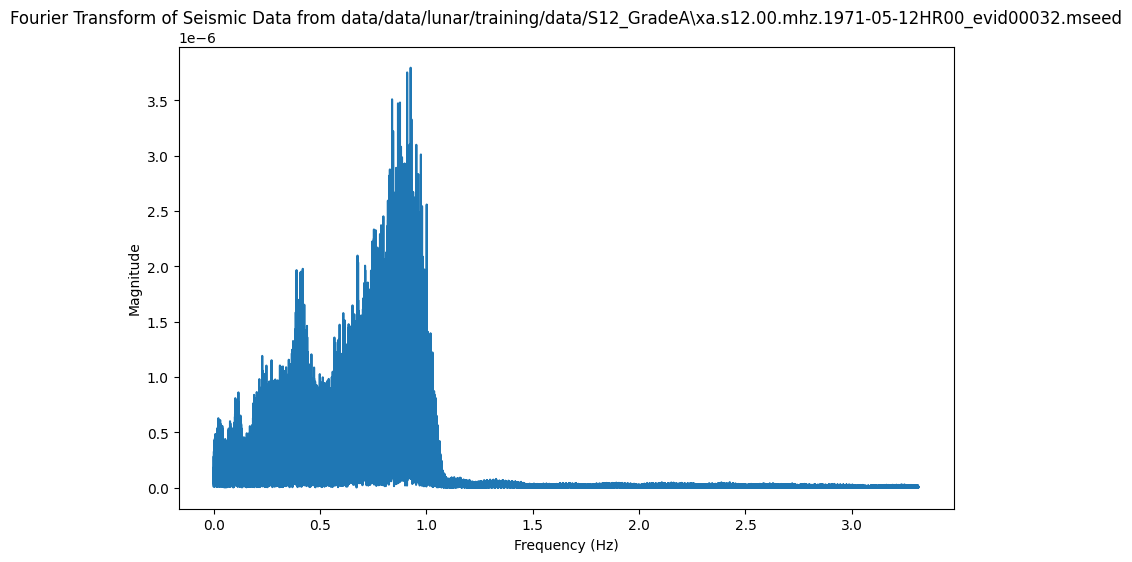

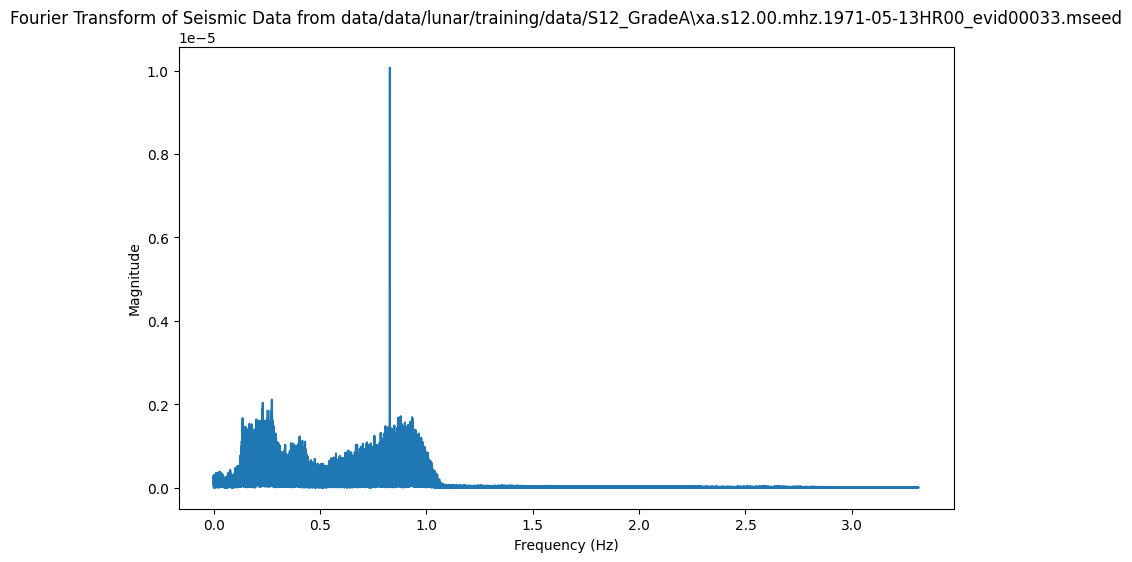

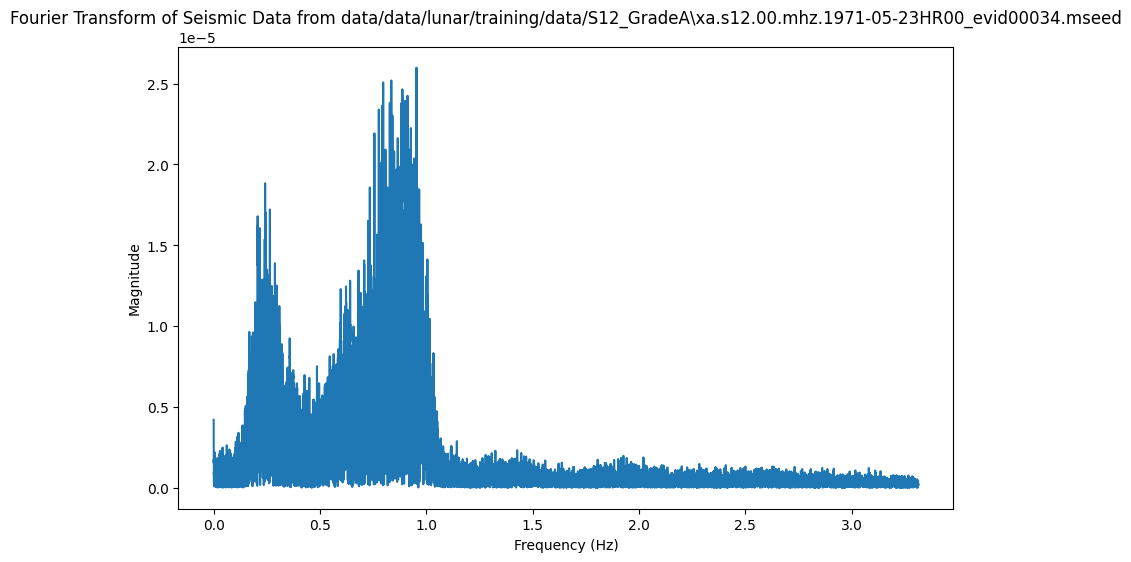

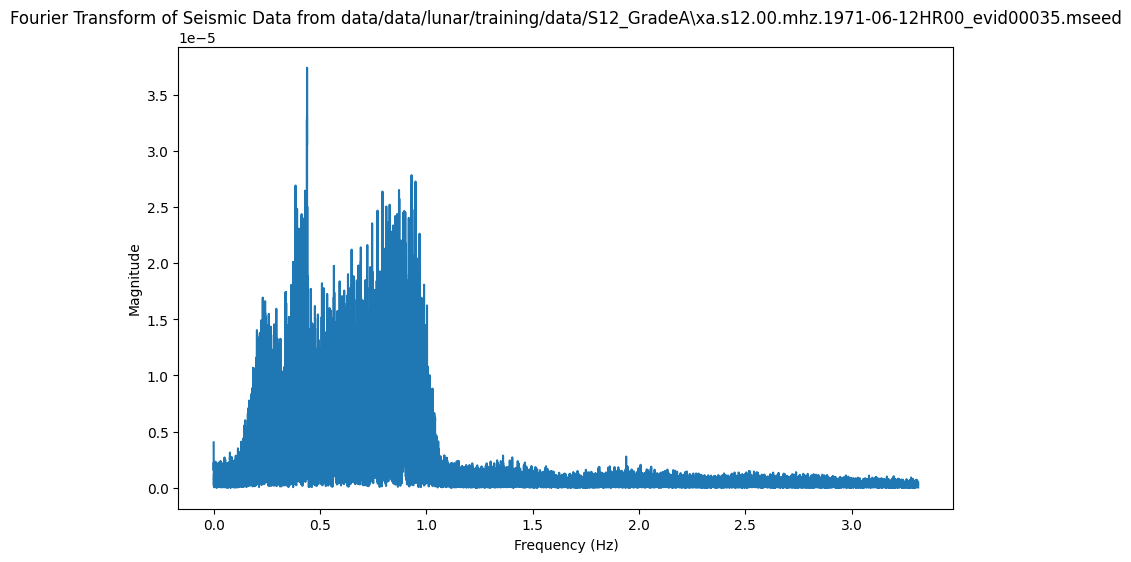

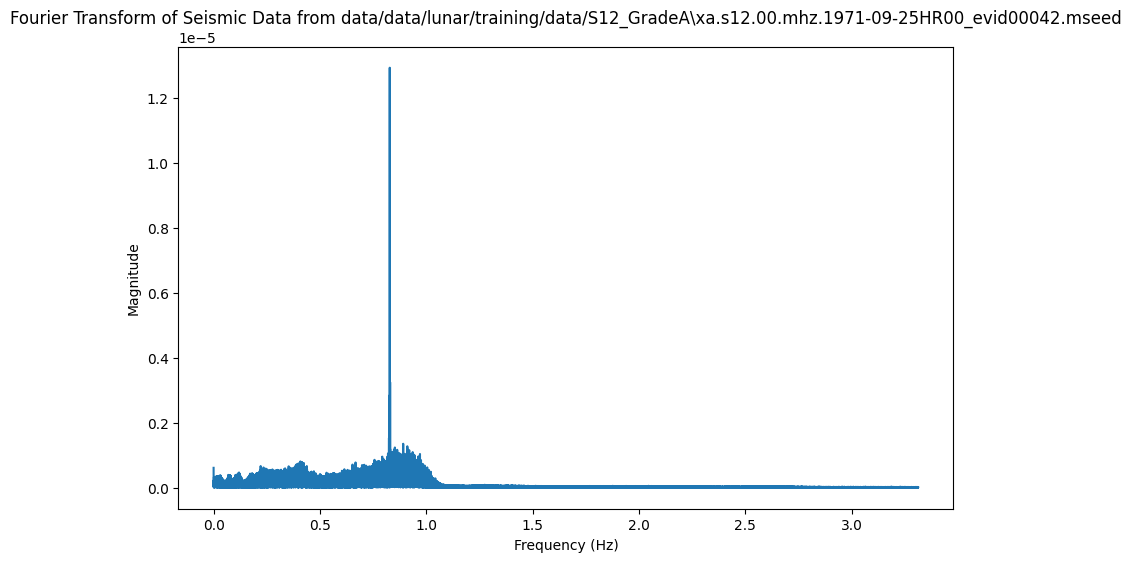

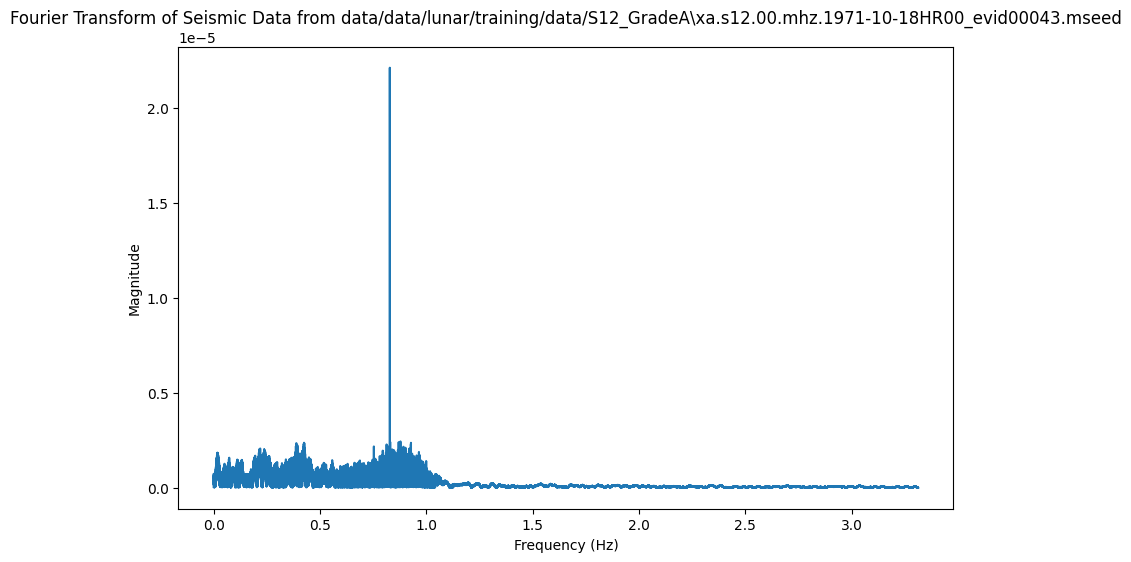

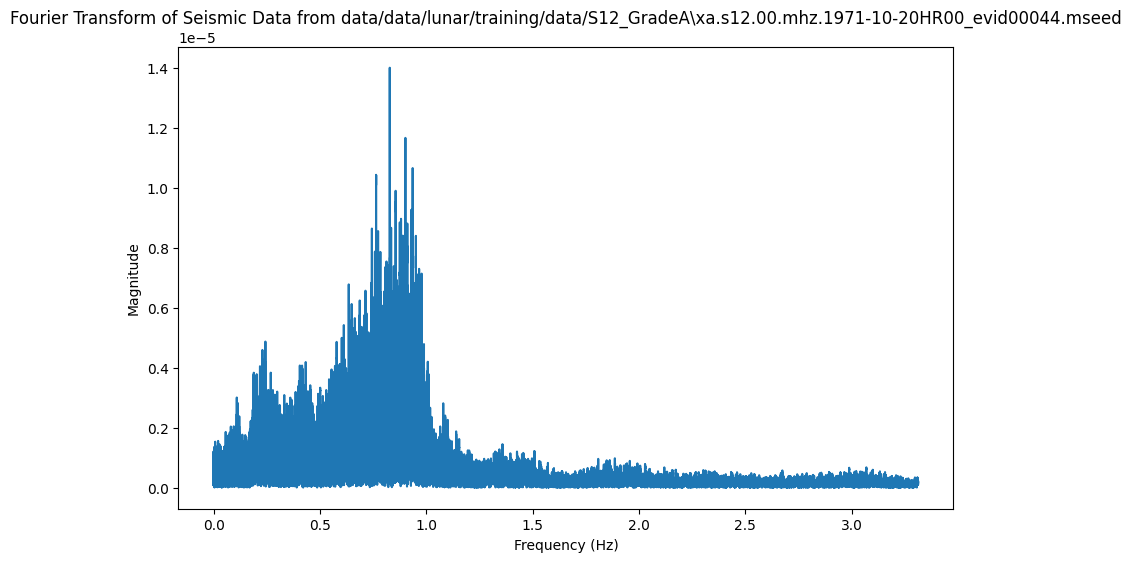

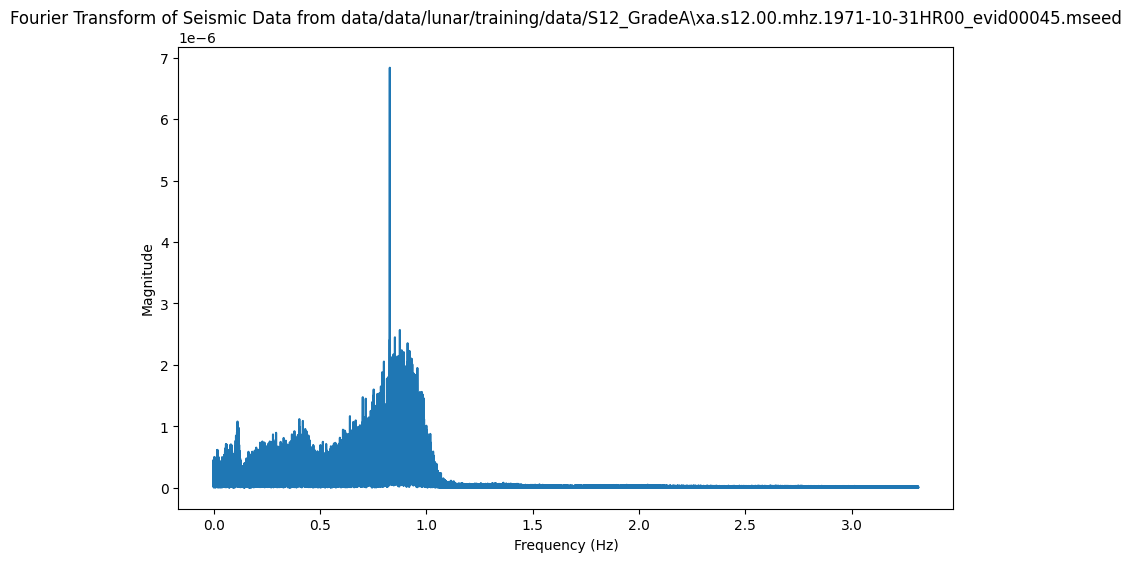

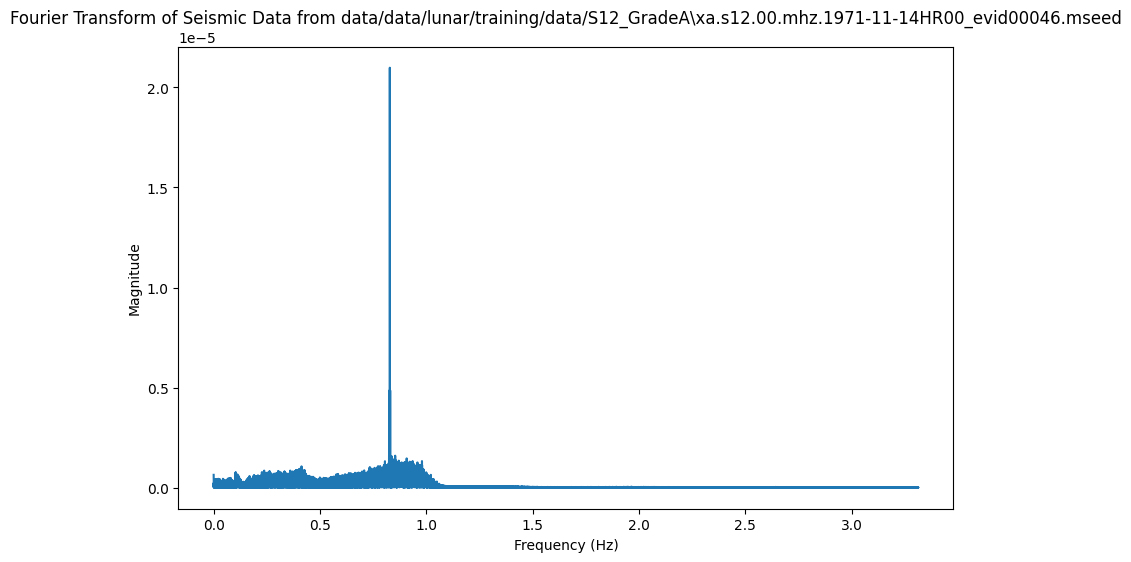

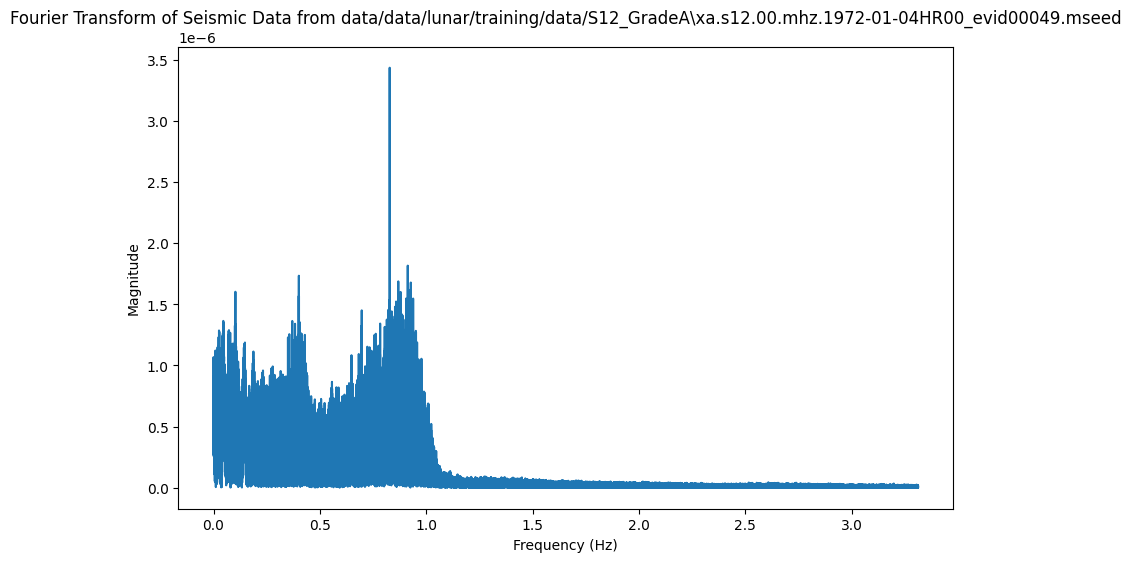

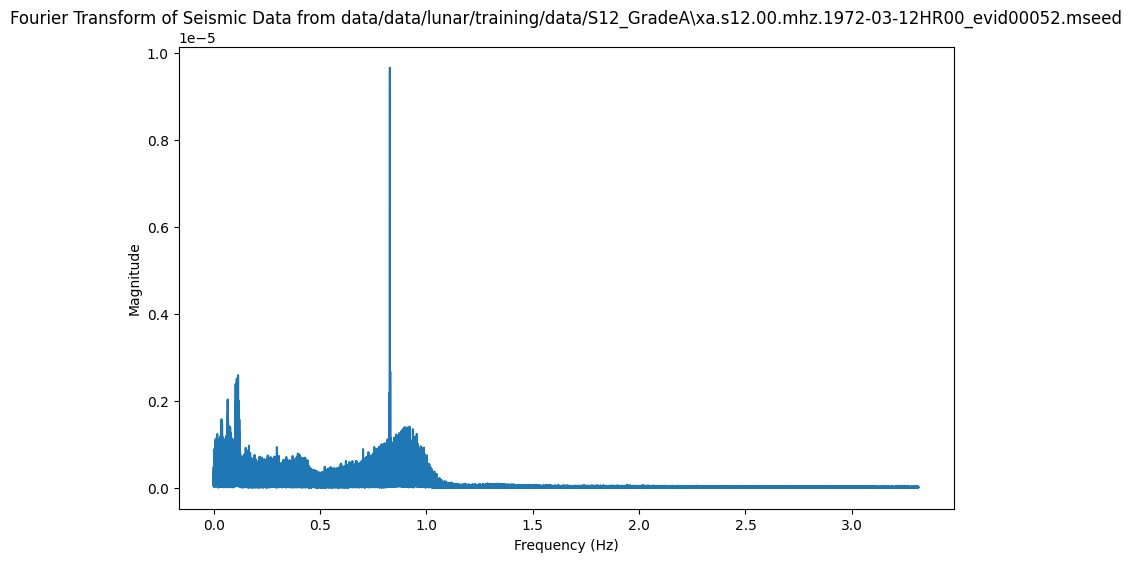

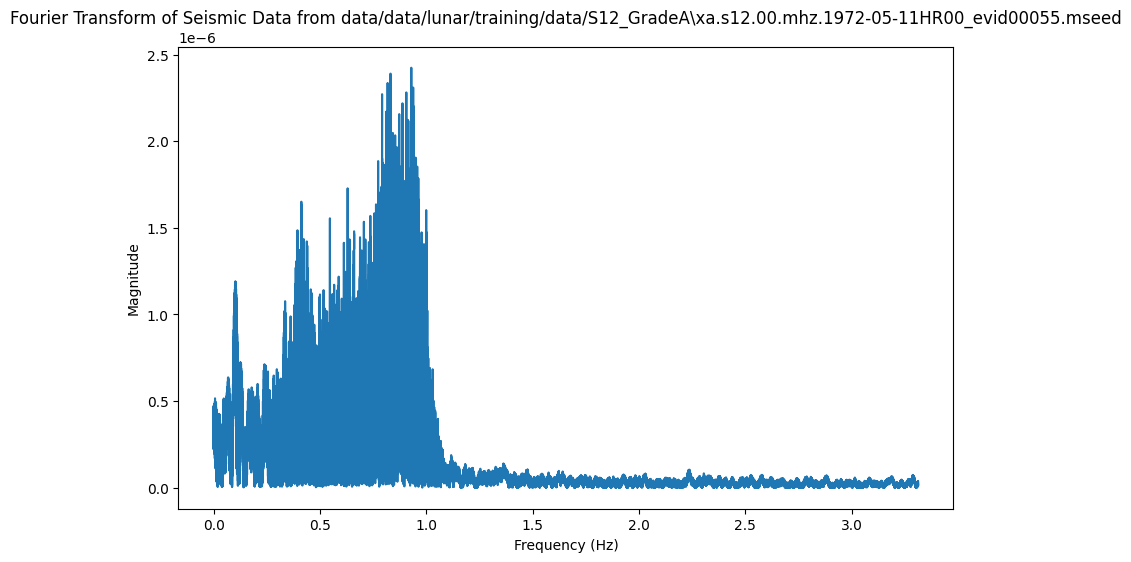

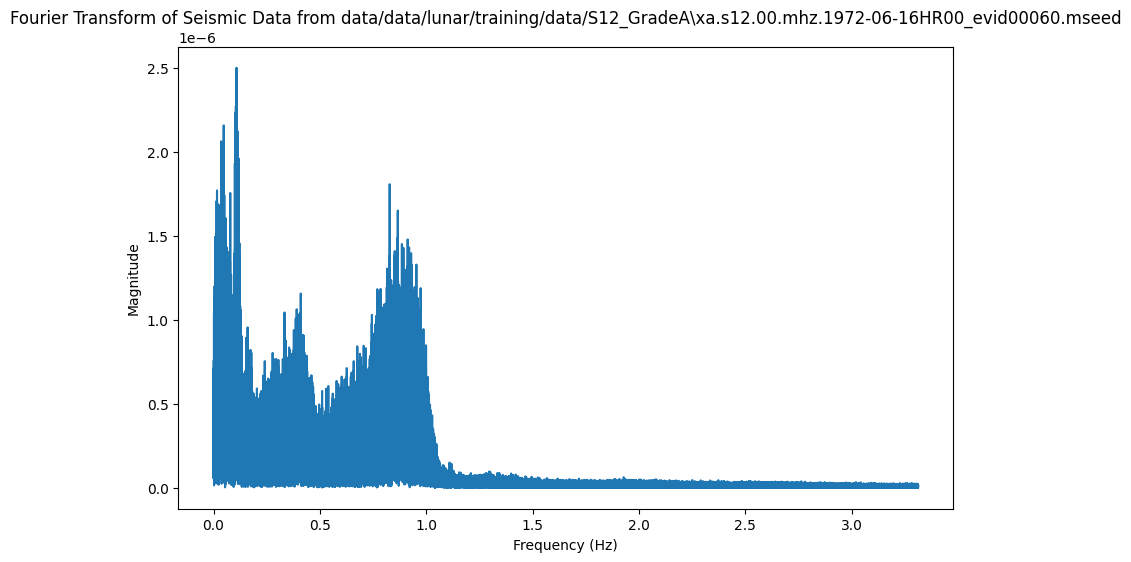

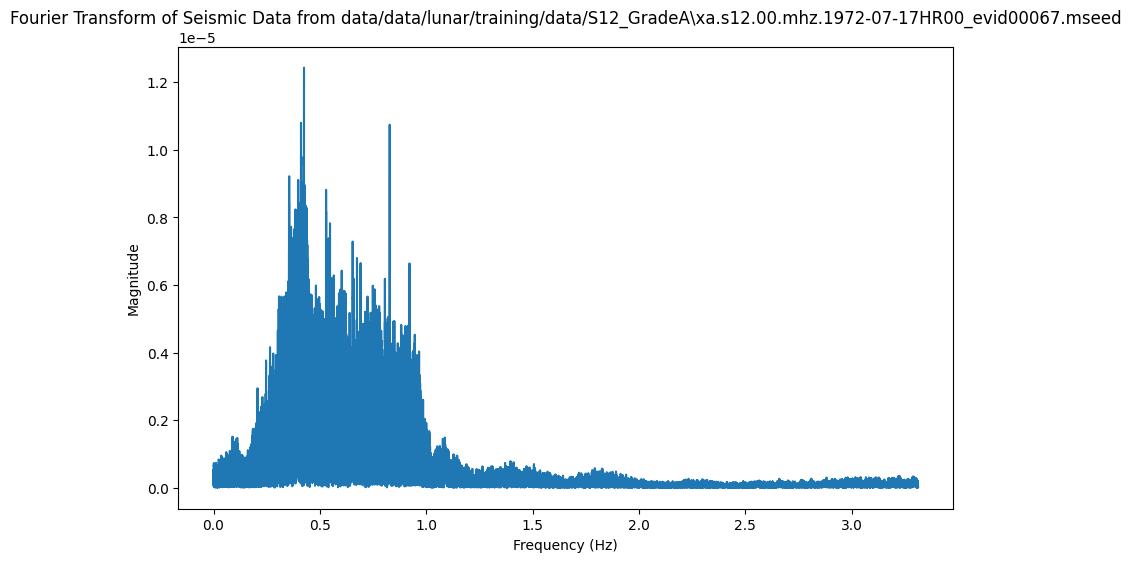

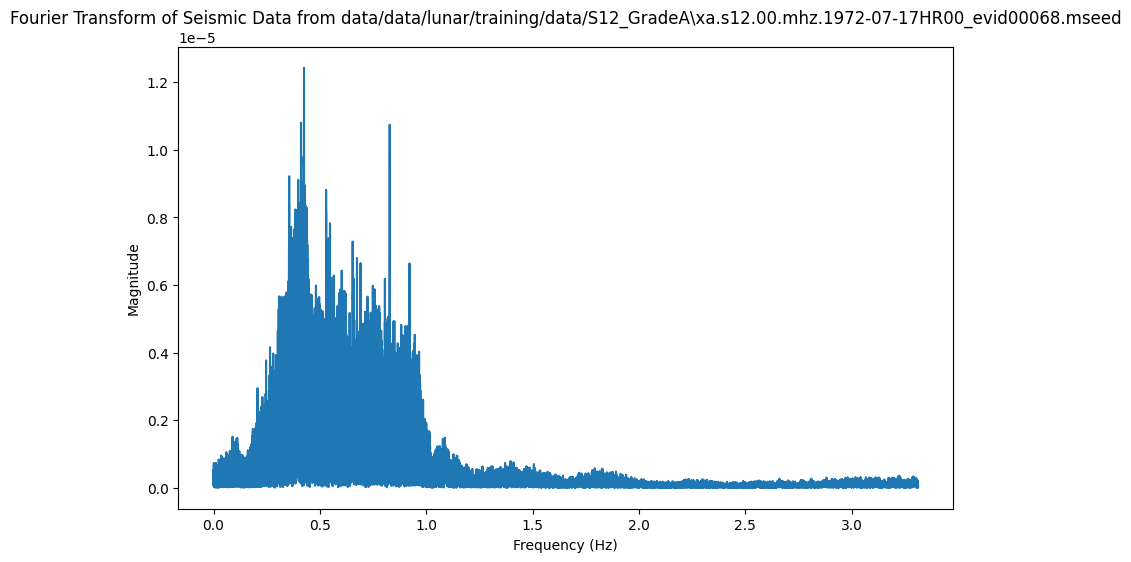

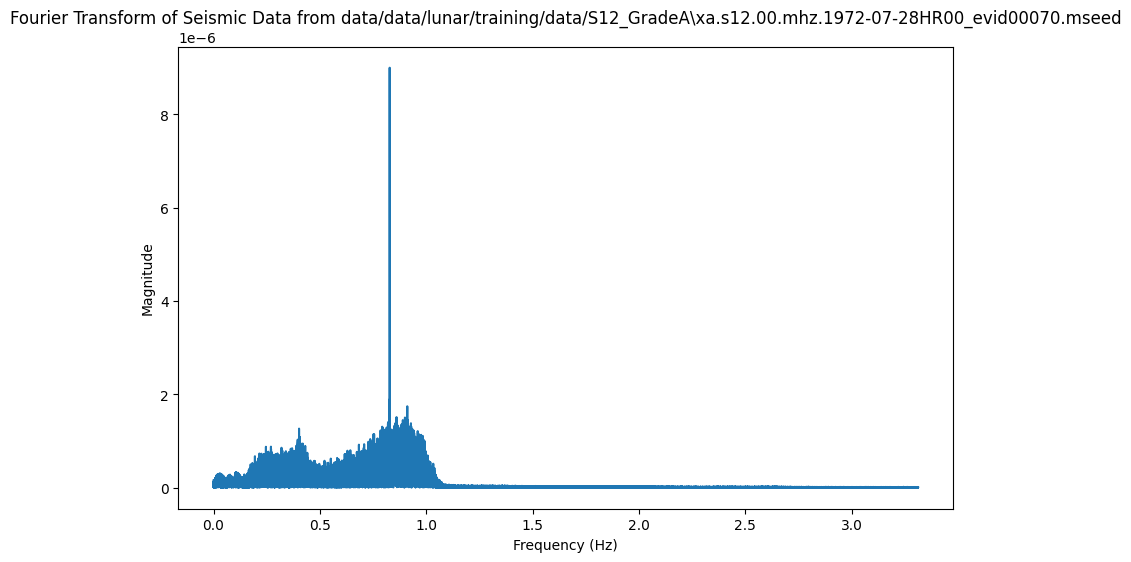

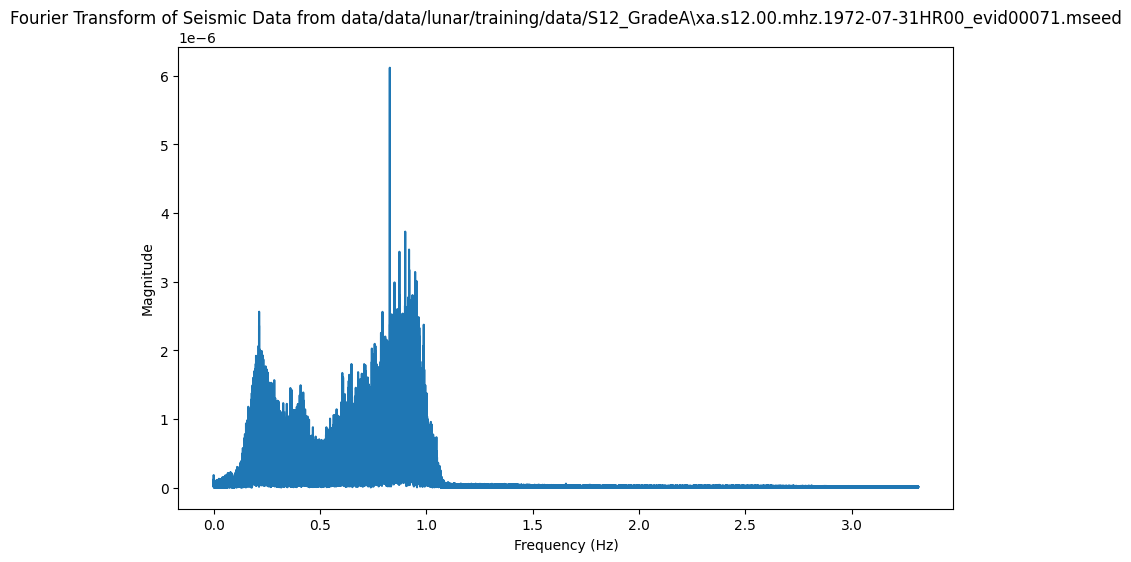

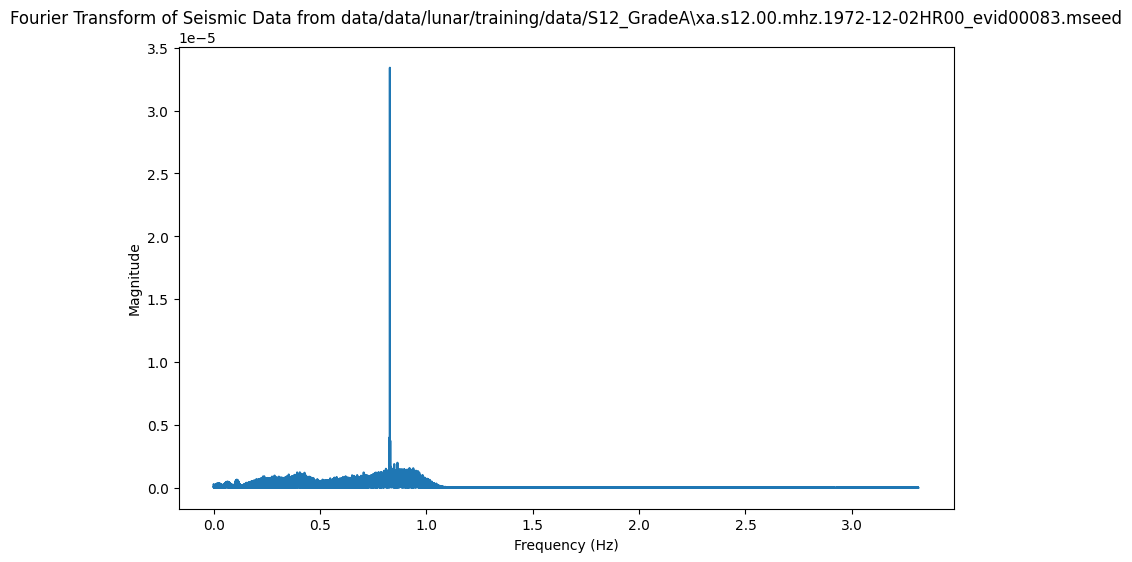

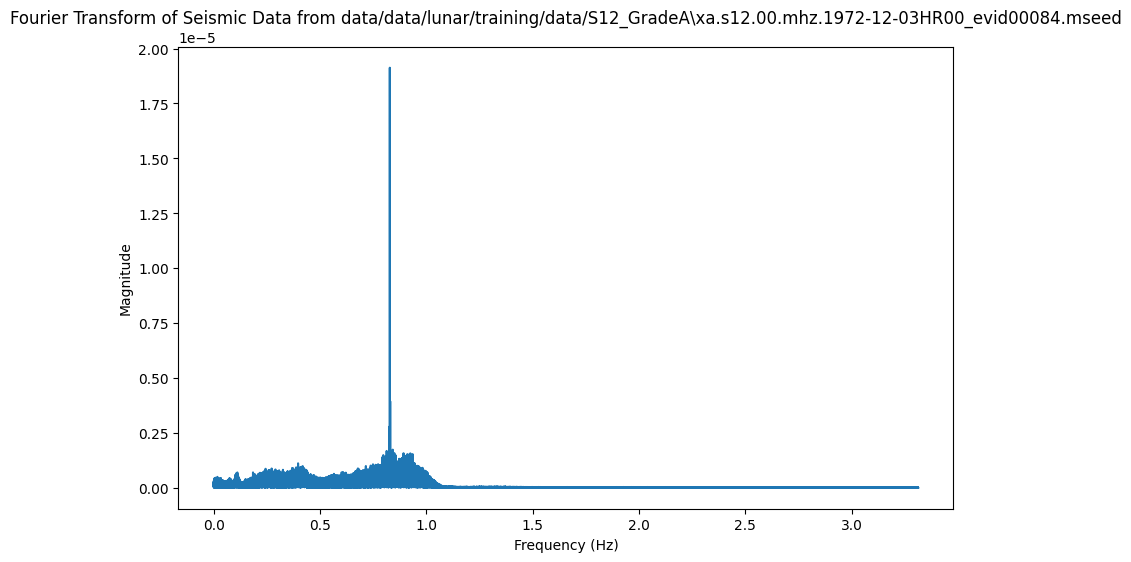

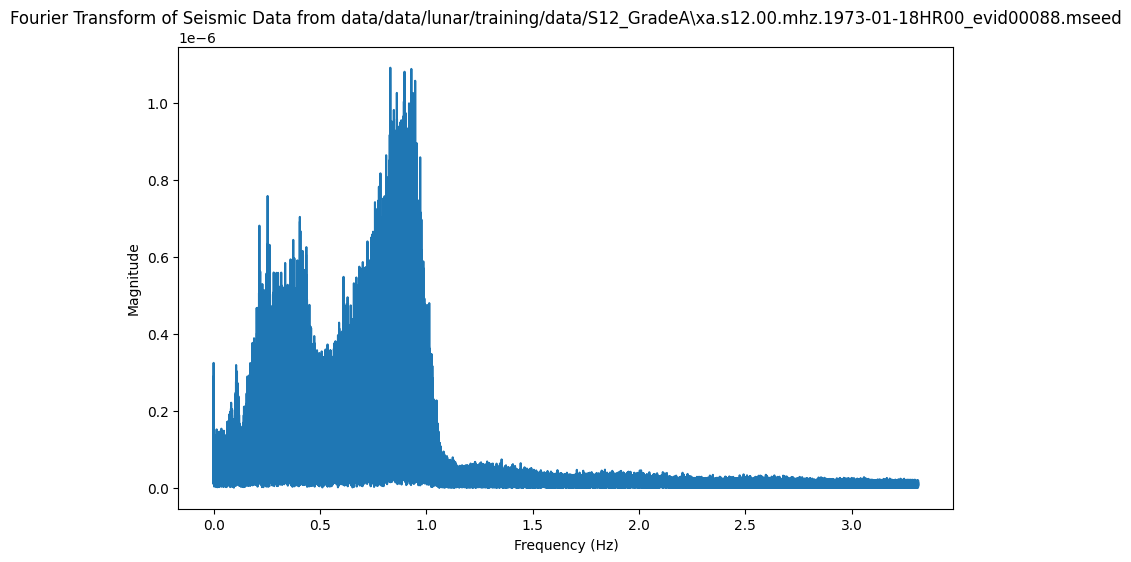

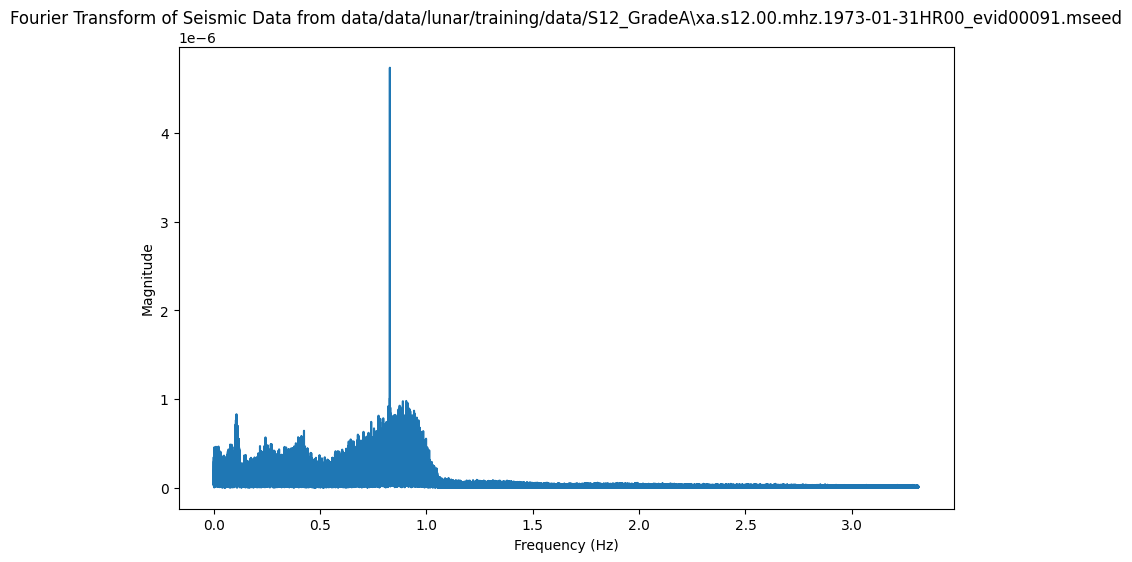

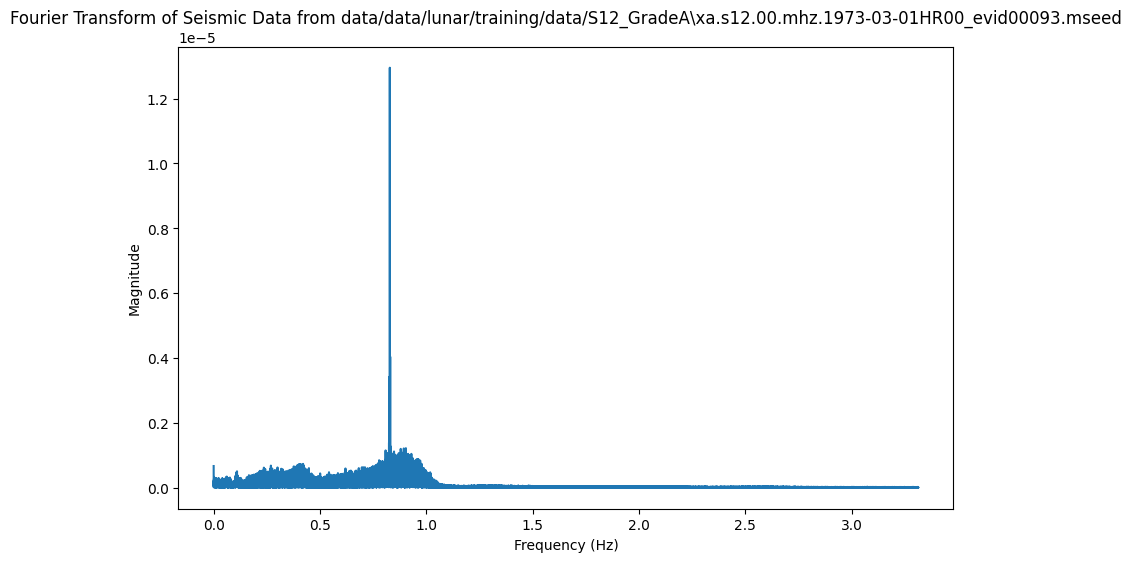

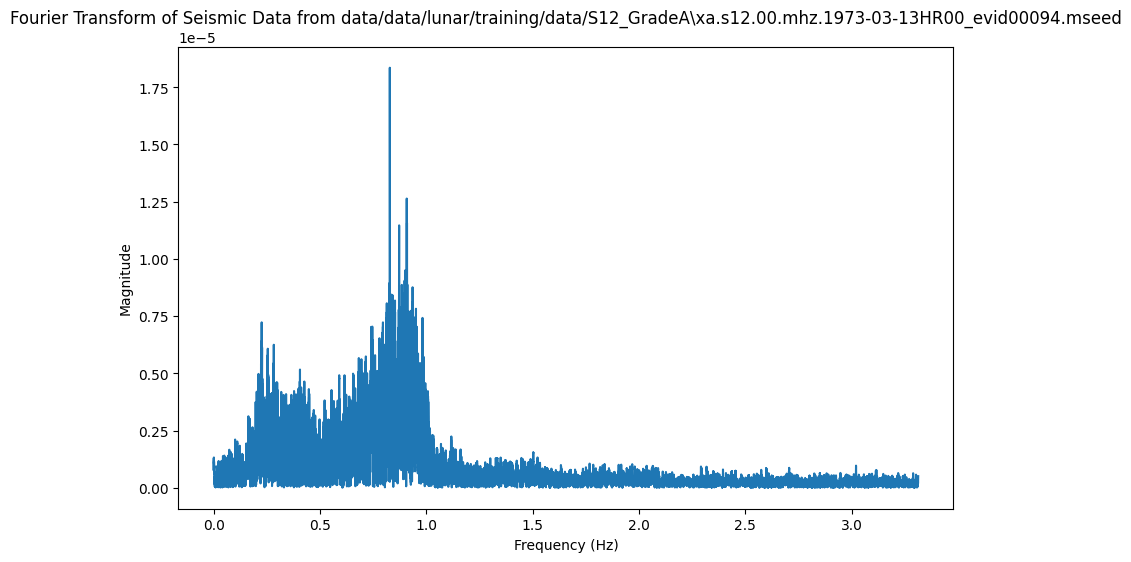

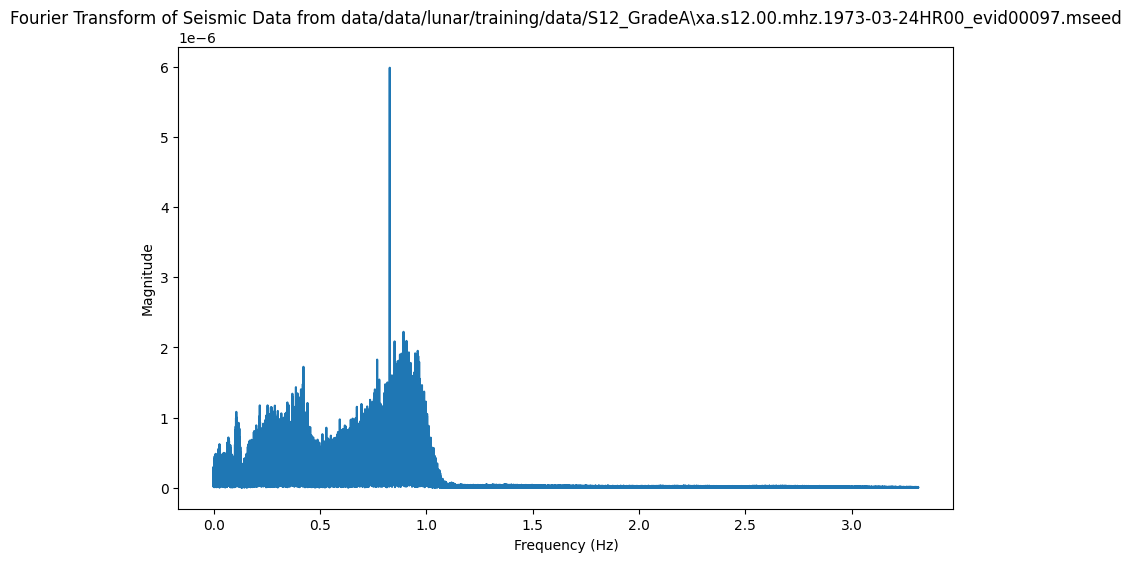

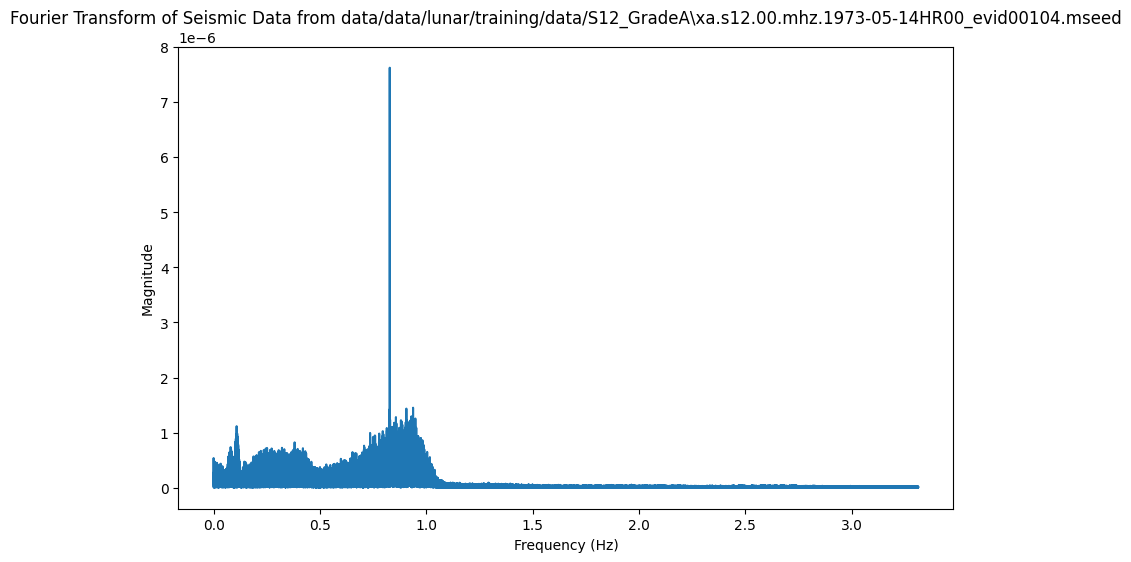

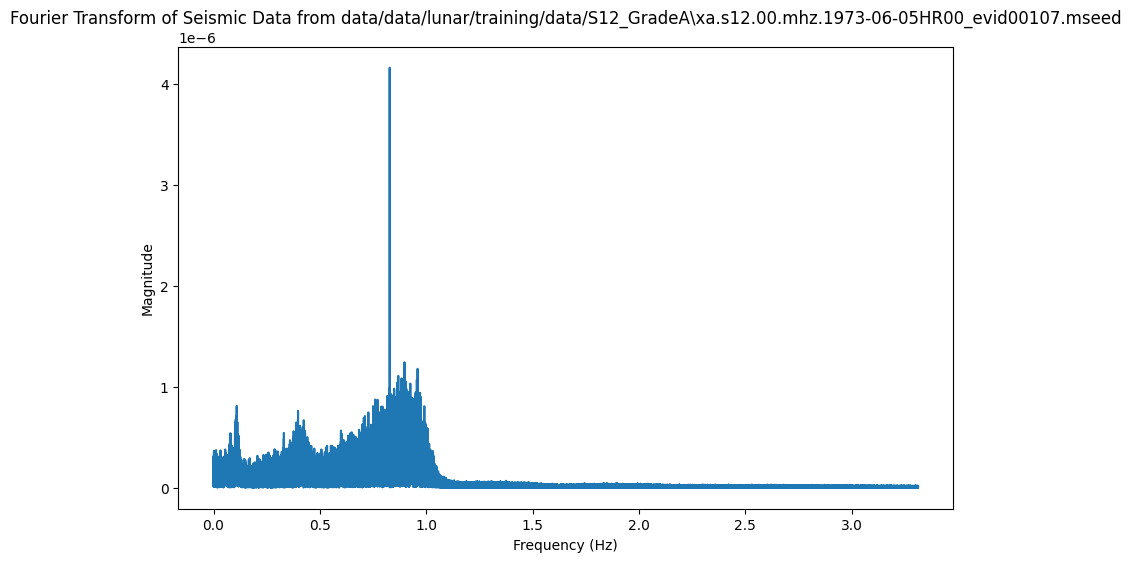

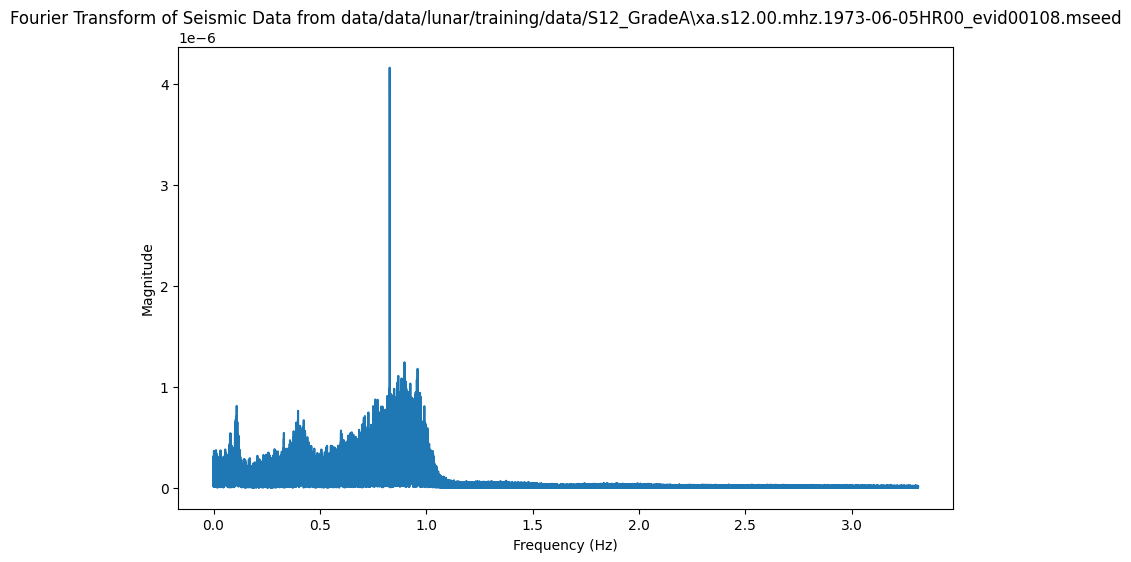

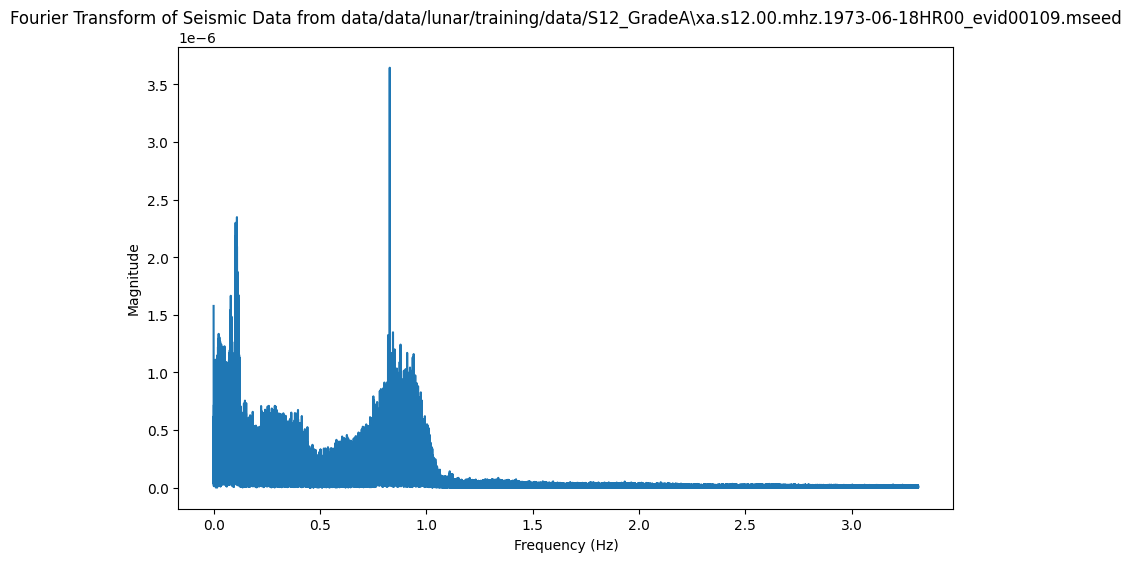

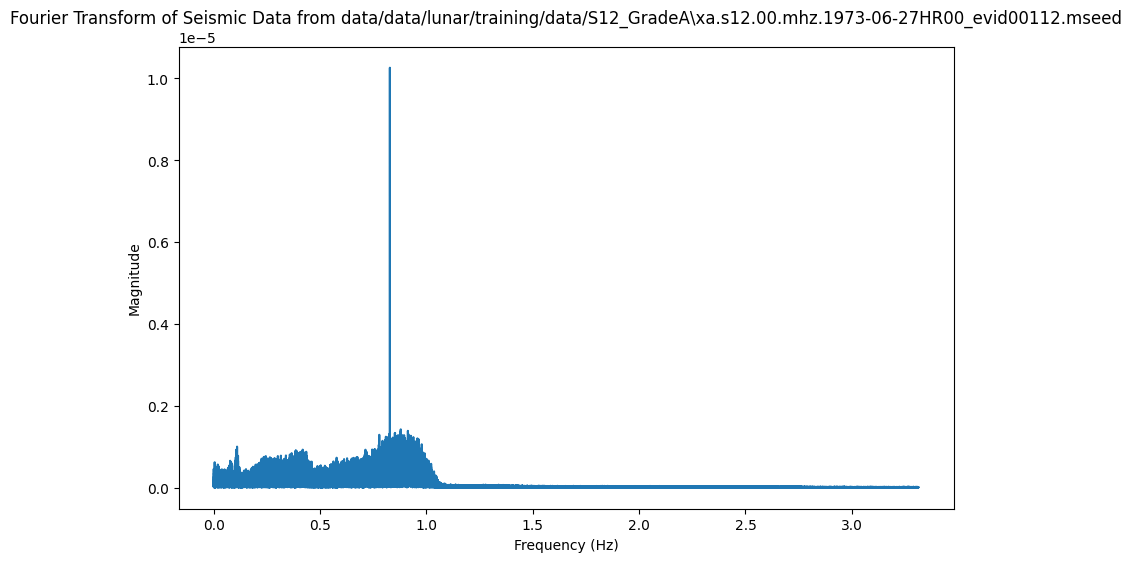

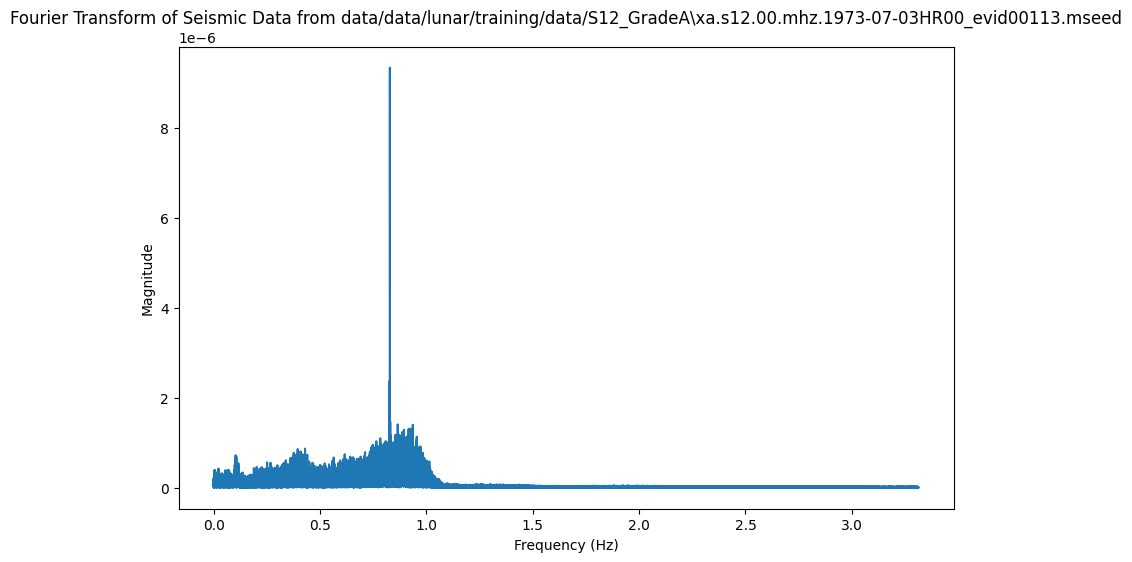

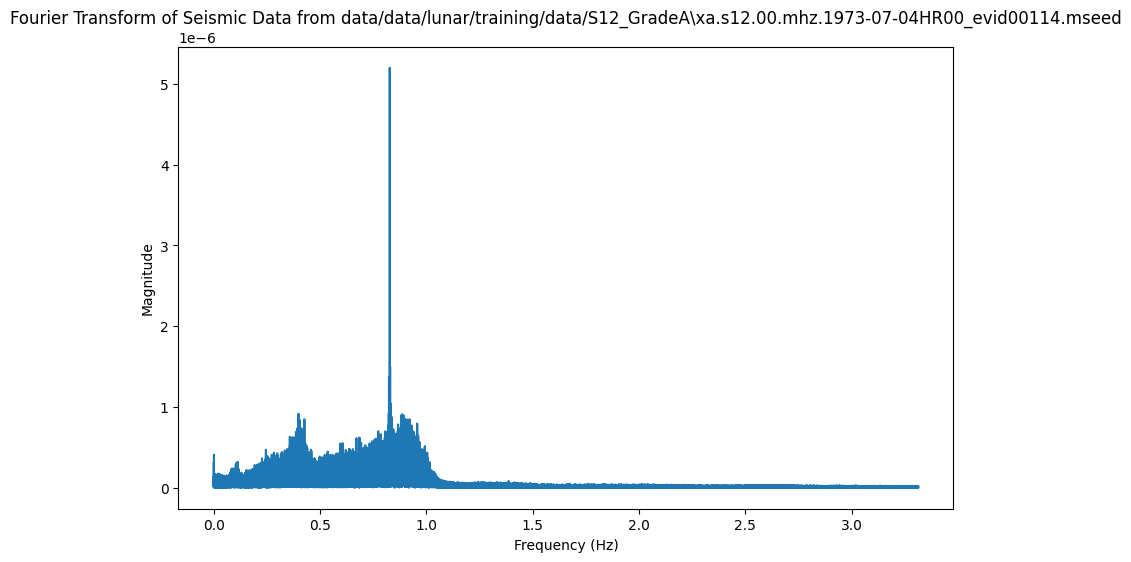

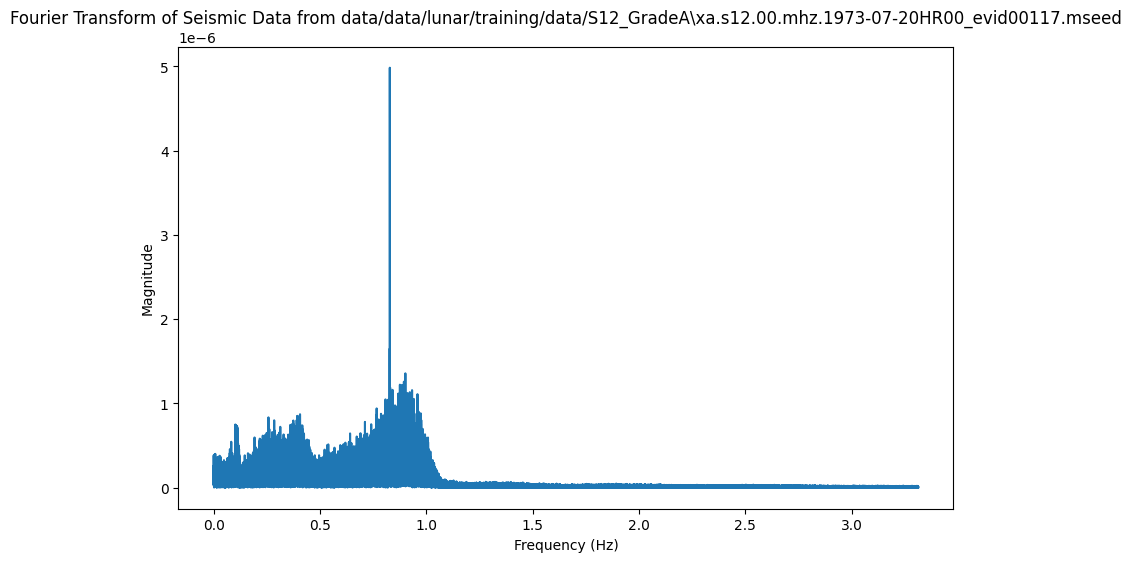

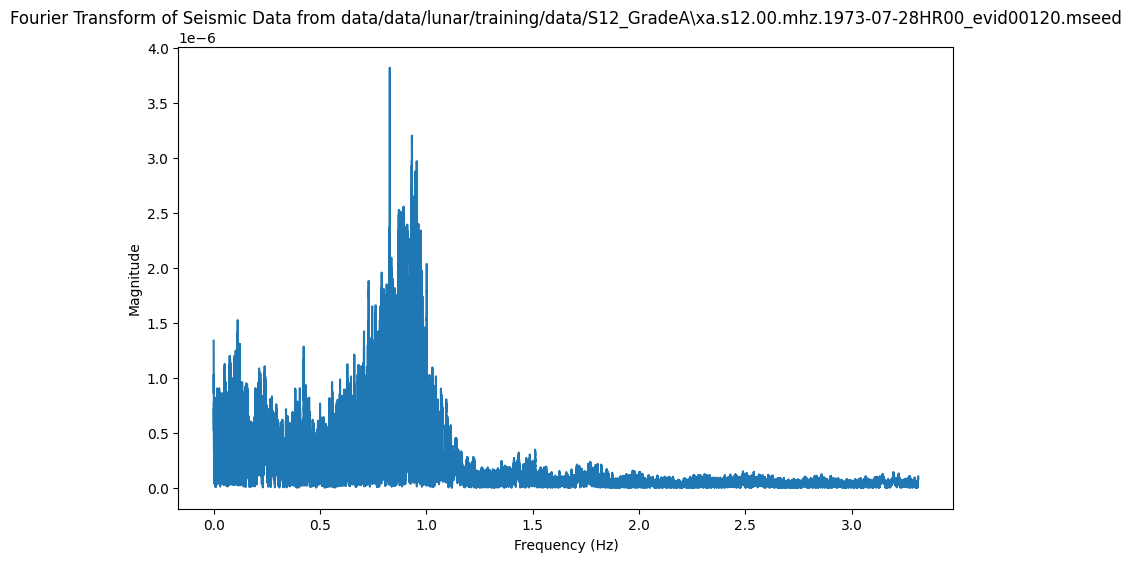

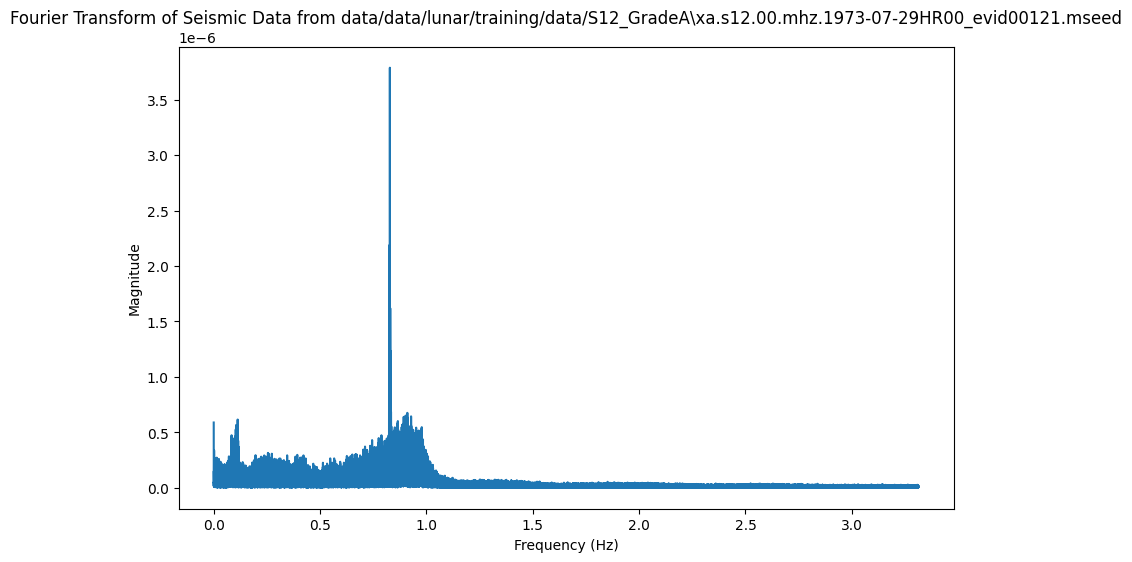

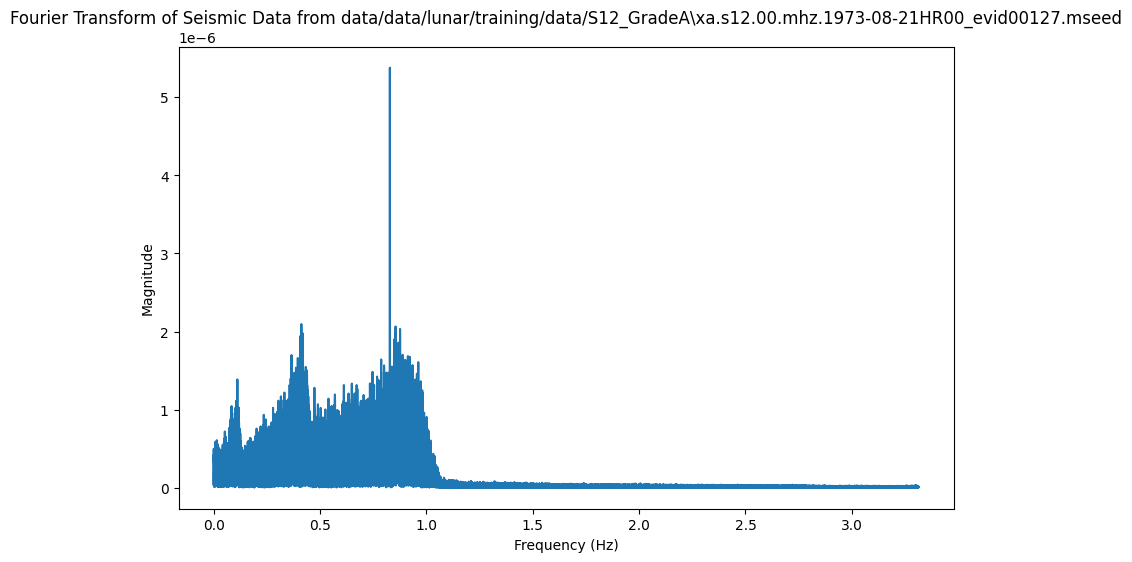

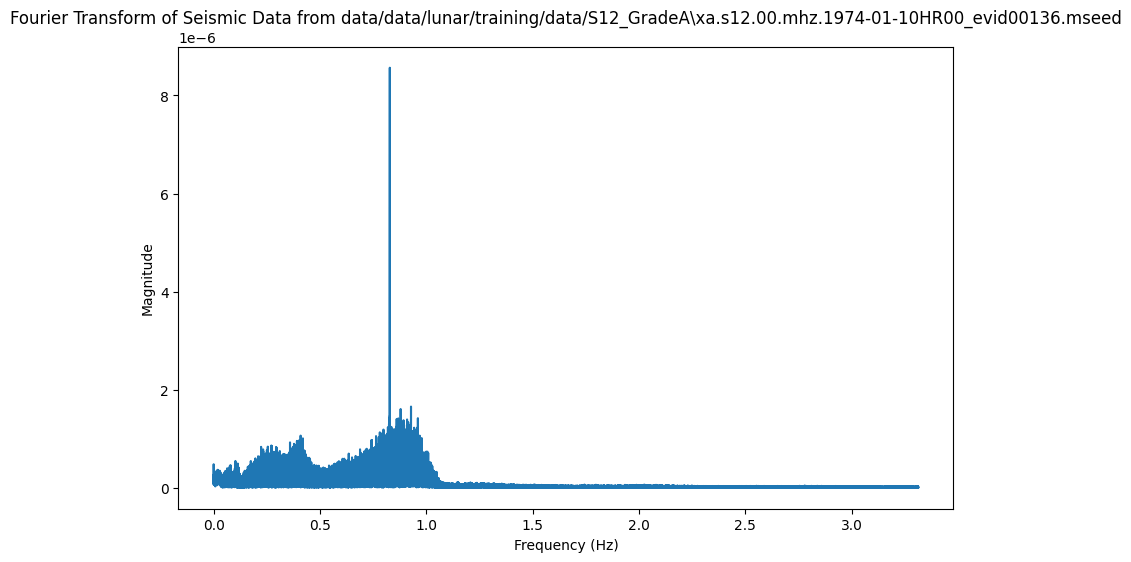

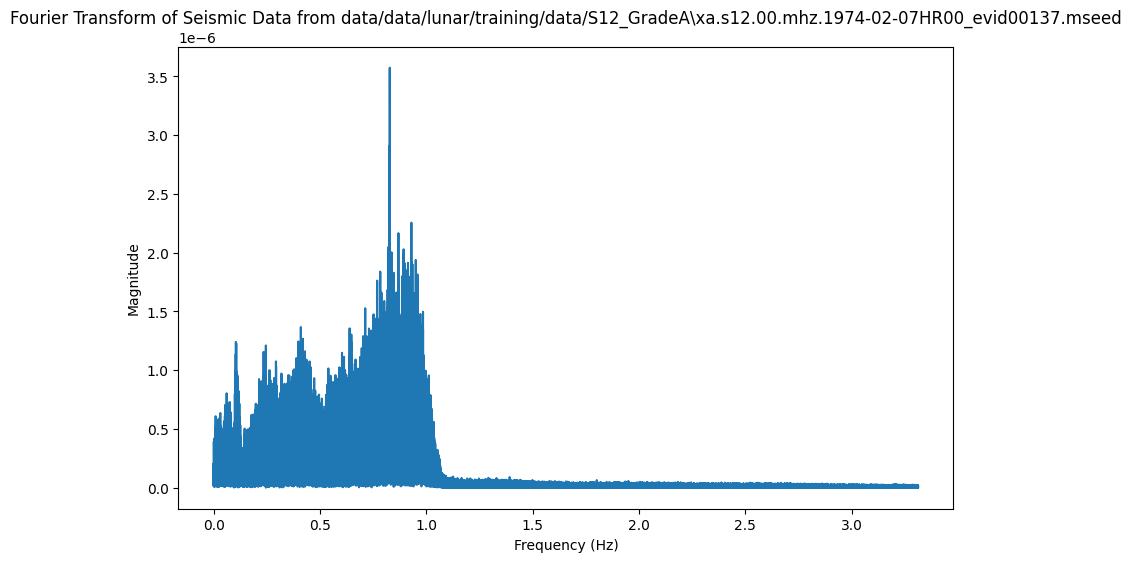

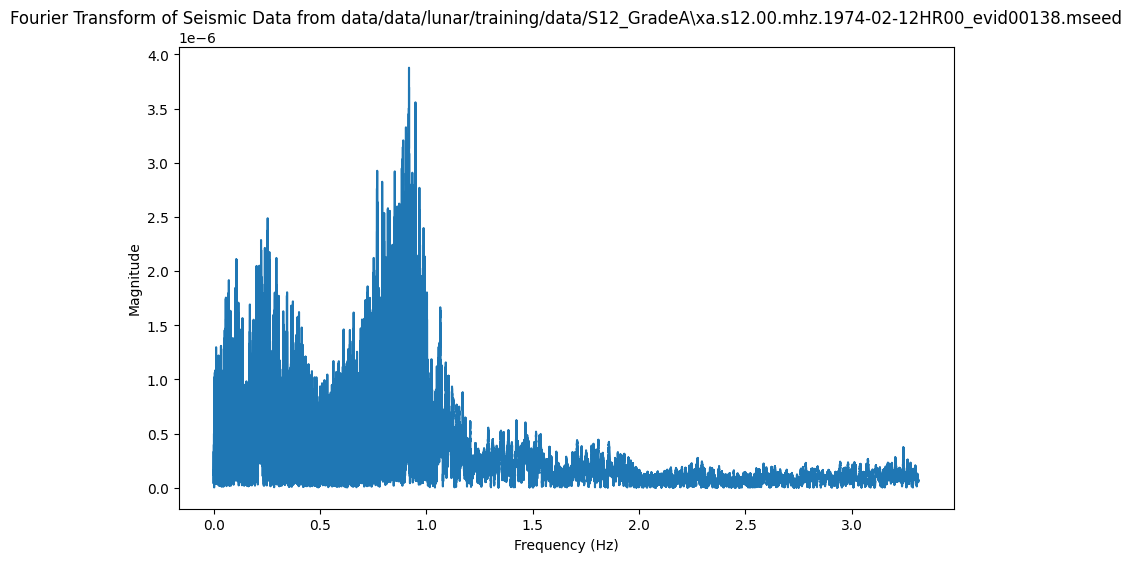

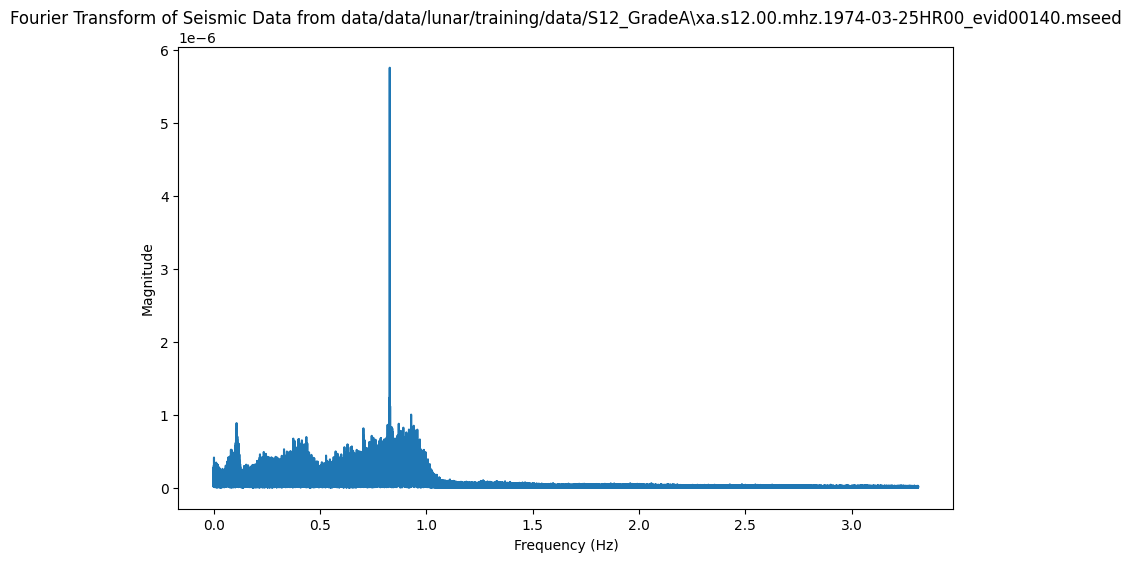

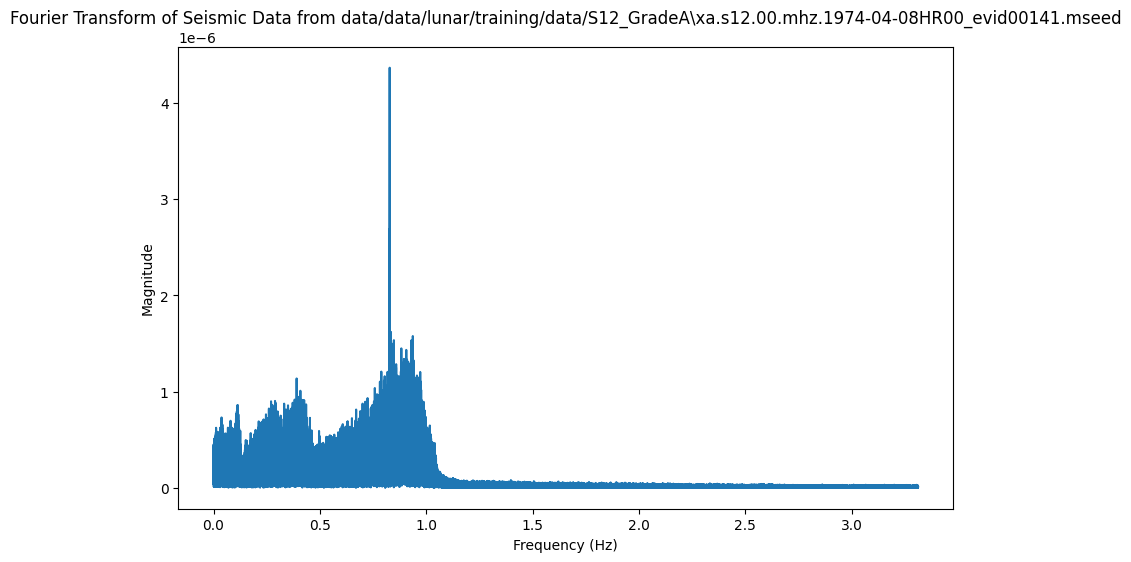

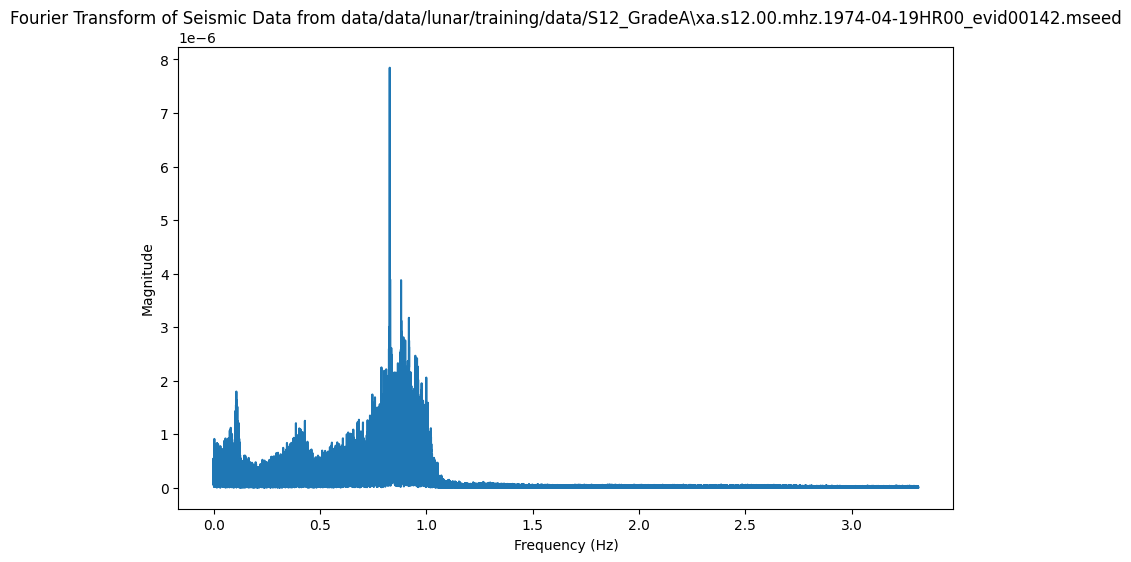

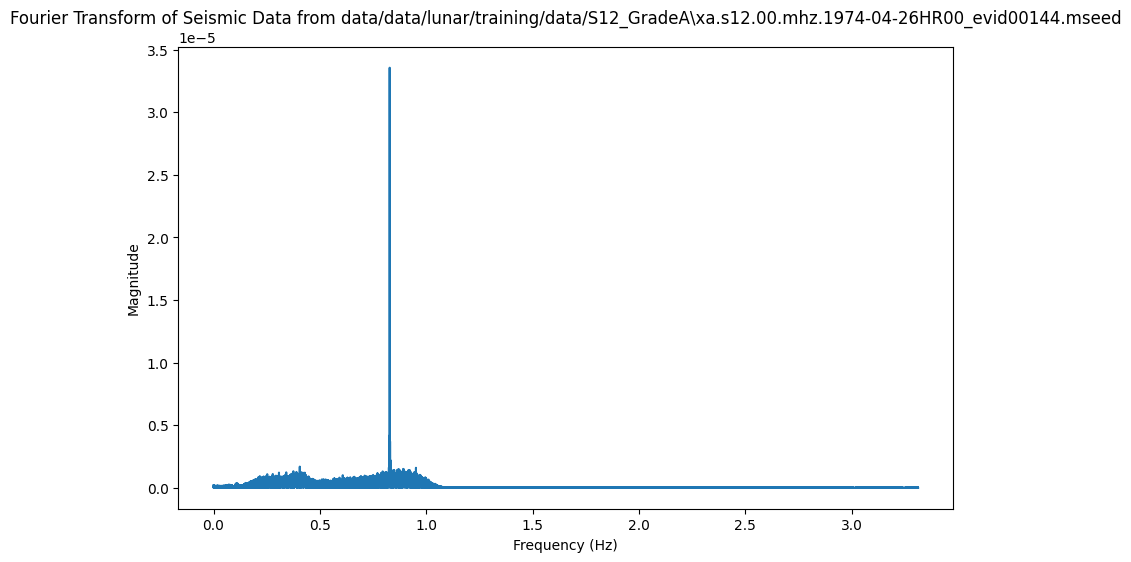

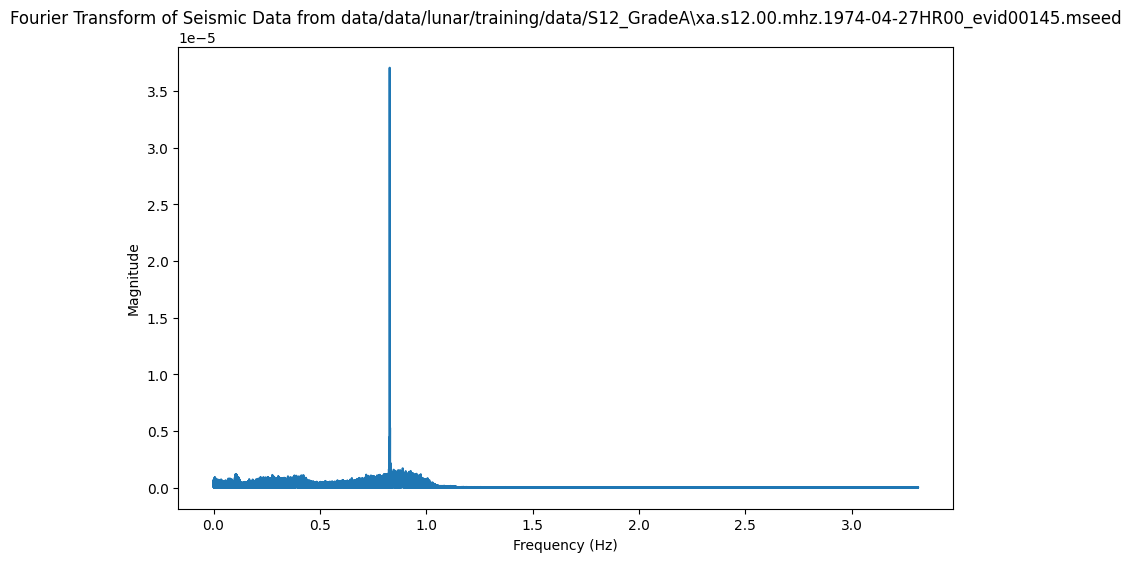

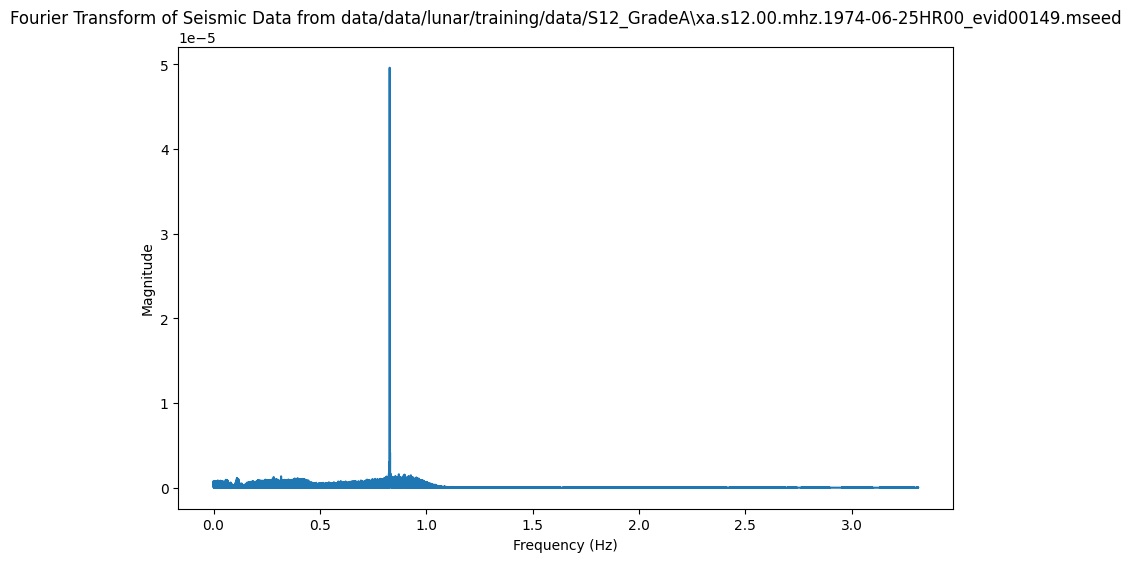

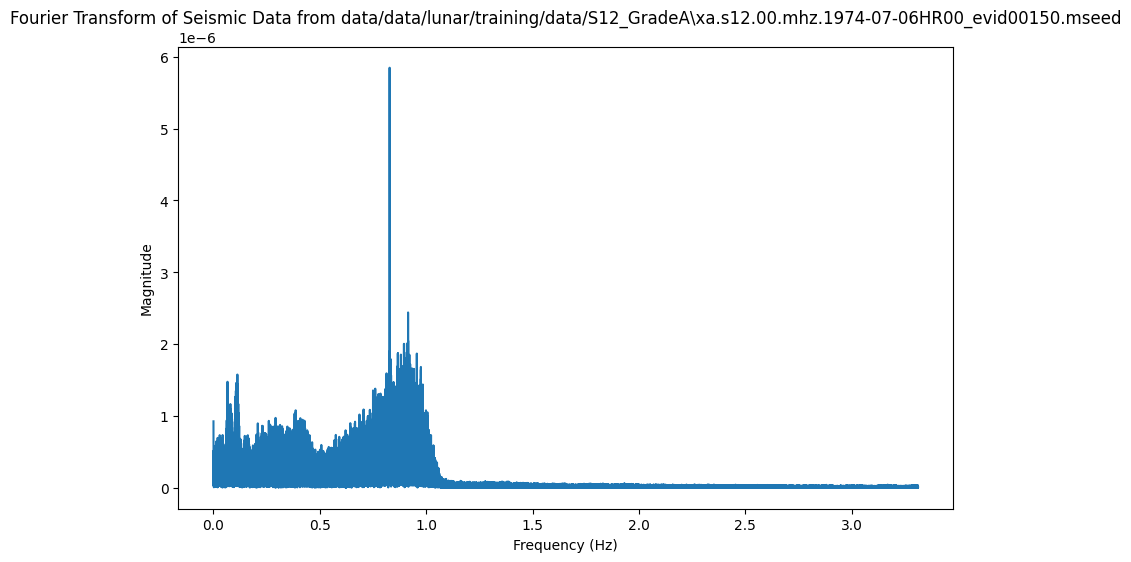

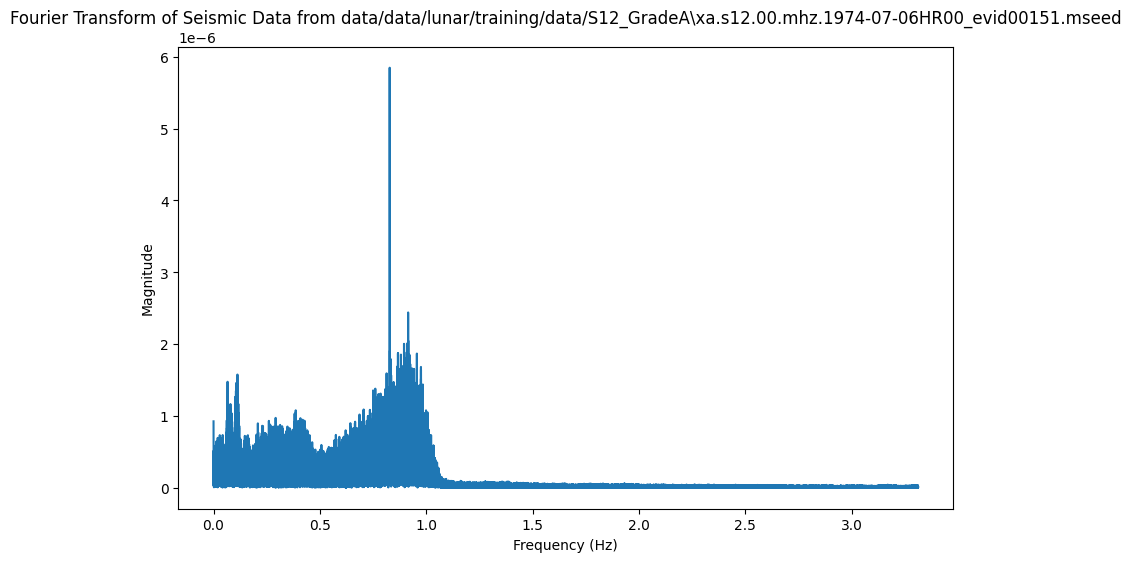

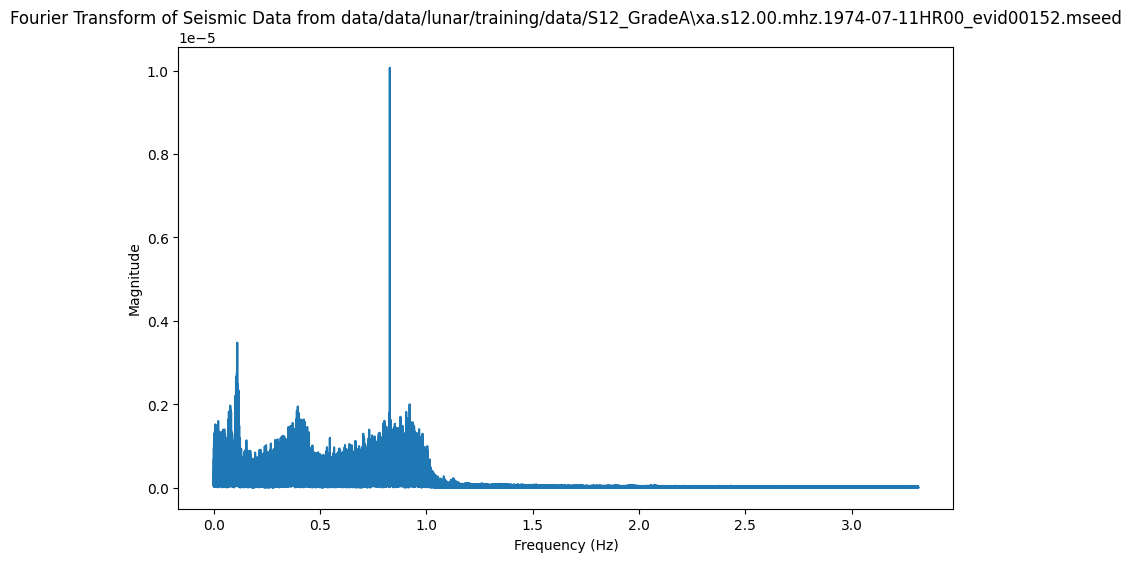

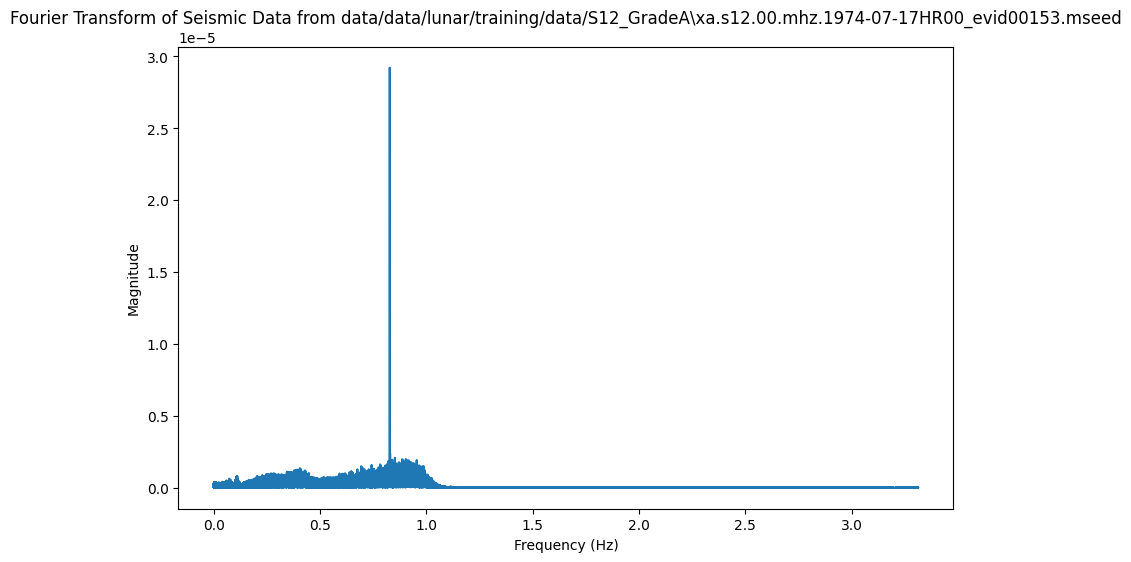

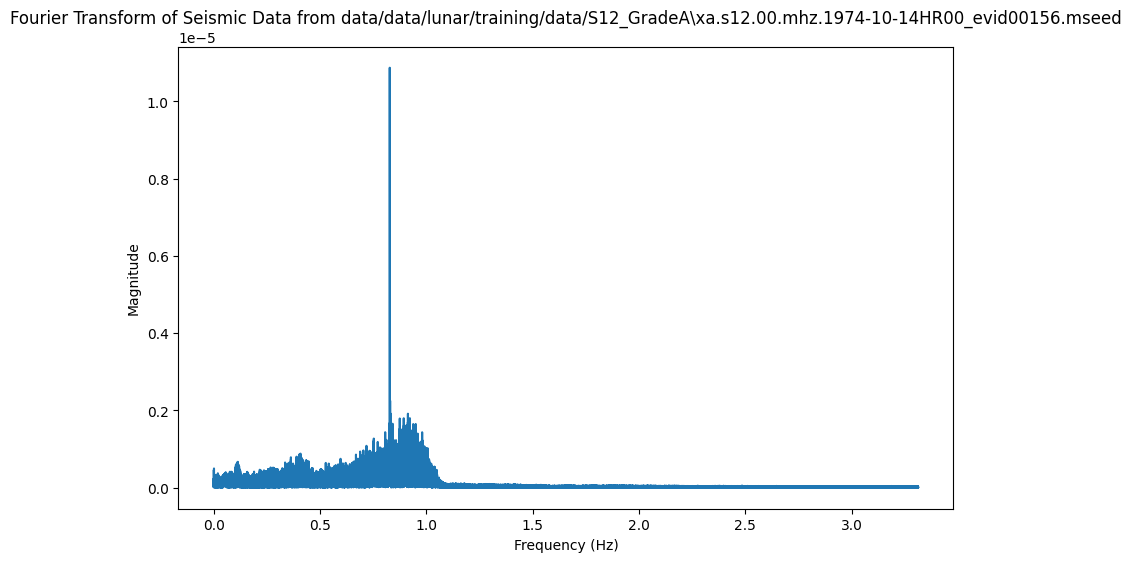

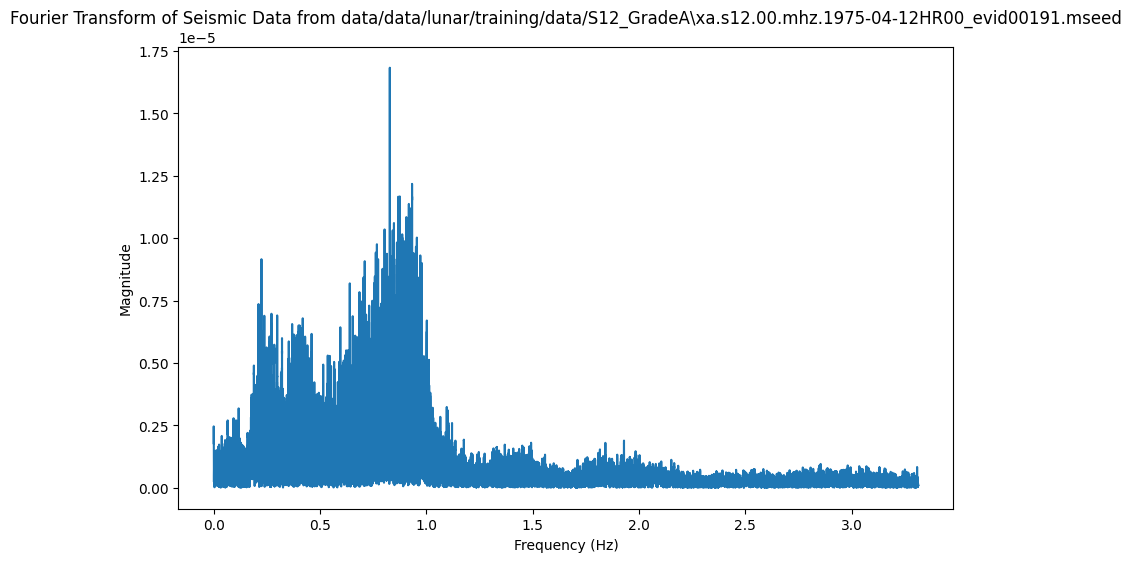

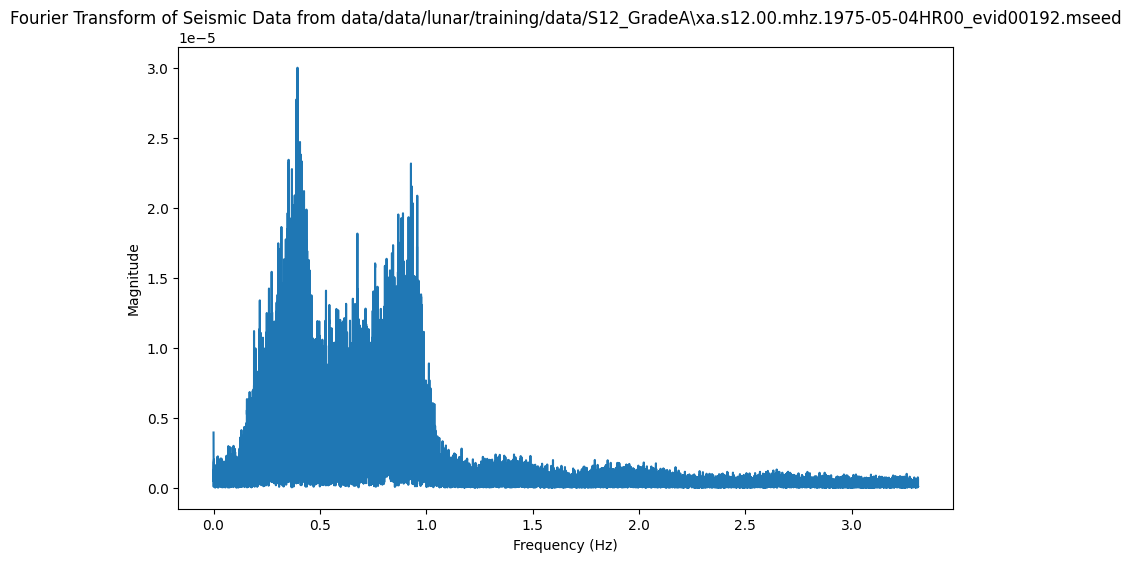

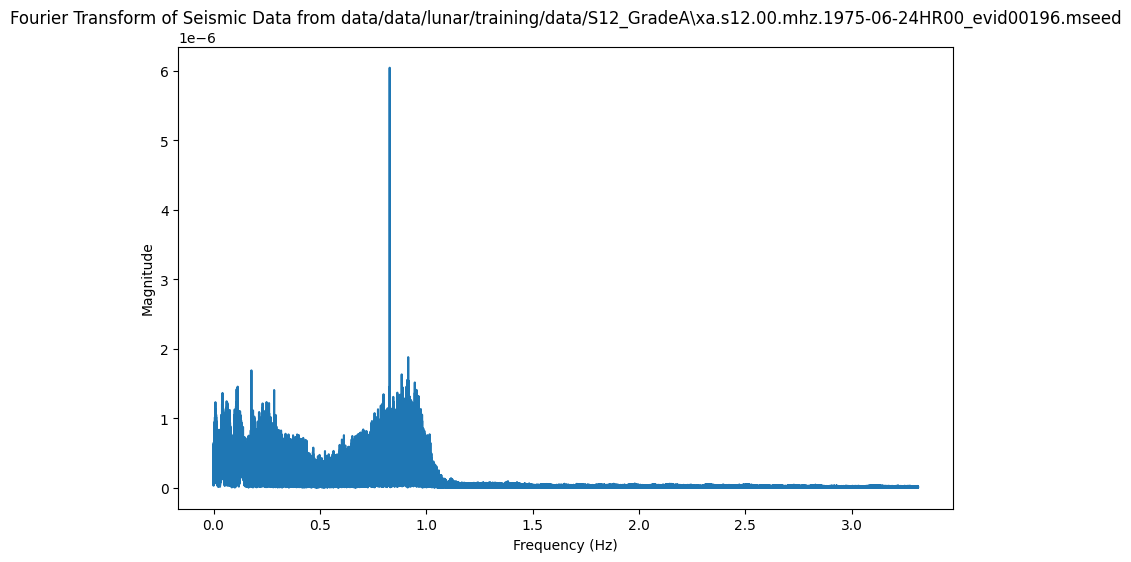

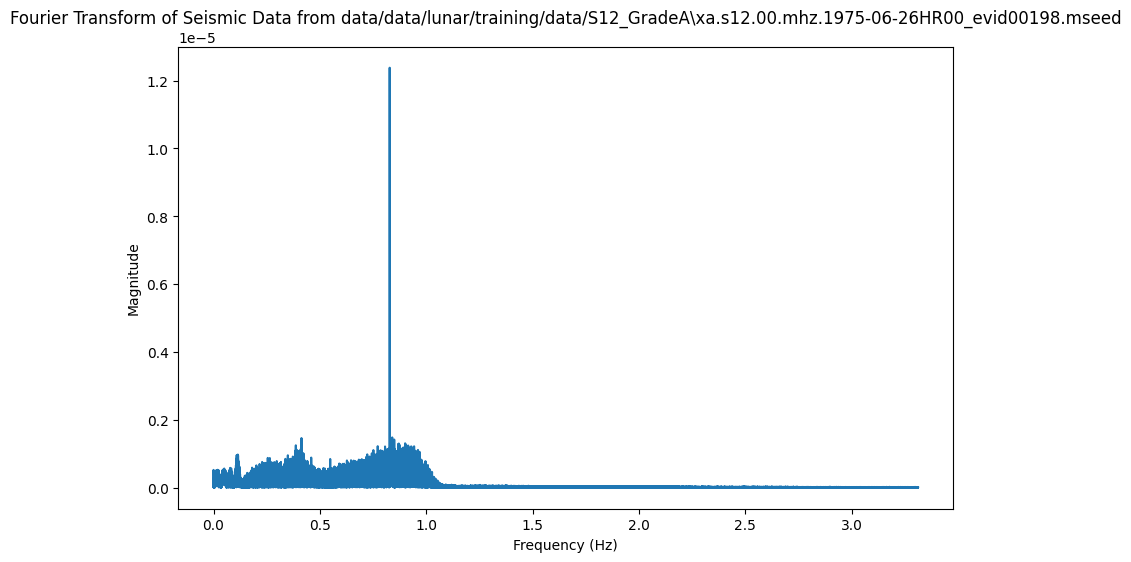

In [19]:
import obspy
import matplotlib.pyplot as plt
import numpy as np
import glob

# Specify the folder path containing the .mseed files
folder_path = 'data/data/lunar/training/data/S12_GradeA/'  # Replace with your folder path

# Get a list of all .mseed files in the folder
mseed_files = glob.glob(folder_path + '*.mseed')

# Loop through each .mseed file in the folder
for mseed_file in mseed_files:
    # Read the .mseed file
    stream = obspy.read(mseed_file)
    
    # Access the first trace (you can adjust if there are multiple traces)
    trace = stream[0]

    # Get the data and the corresponding time values
    data = trace.data
    time = trace.times()

    # Perform the Fourier Transform (FFT)
    n = len(data)
    sampling_rate = trace.stats.sampling_rate  # Get the sampling rate
    frequencies = np.fft.fftfreq(n, 1/sampling_rate)  # Frequency bins
    fft_values = np.fft.fft(data)  # Apply FFT

    # Compute the magnitude of the FFT (for plotting)
    fft_magnitude = np.abs(fft_values)

    # Plot the FFT result (frequency vs magnitude)
    plt.figure(figsize=(10, 6))
    plt.plot(frequencies[:n//2], fft_magnitude[:n//2])  # Plot only the positive frequencies
    plt.title(f"Fourier Transform of Seismic Data from {mseed_file}")
    plt.xlabel('Frequency (Hz)')
    plt.ylabel('Magnitude')
    plt.grid(False)

    # Show the plot
    plt.show()


In [ ]:
import os
import pandas as pd
import cv2
import numpy as np
from tqdm import tqdm

# Define directories
spectrogram_dir = 'saved_plots/'
output_dir = 'saved2_augmented/'
os.makedirs(output_dir, exist_ok=True)

# Load the catalog
catalog = pd.read_csv('data/data/lunar/training/catalogs/apollo12_catalog_GradeA_final.csv')
catalog['file'] = catalog['filename'].str.strip().str.lower()  # Normalize catalog filenames

# Filter out rows with the "impact" label
filtered_catalog = catalog[~catalog['mq_type'].str.contains('impact','deep', case=False, na=False)]  # Adjust 'mq_type' to the correct column name for labels

# List all spectrogram files in the directory
spectrogram_files = [f for f in os.listdir(spectrogram_dir) if f.endswith('.png')]

# Augmentation functions
def augment_image(image):
    aug_images = []
    # Rotation
    for angle in [90, 180, 270]:
        rotated = cv2.rotate(image, {90: cv2.ROTATE_90_CLOCKWISE, 180: cv2.ROTATE_180, 270: cv2.ROTATE_90_COUNTERCLOCKWISE}[angle])
        aug_images.append(rotated)
    # Flipping
    flipped = cv2.flip(image, 1)  # Horizontal flip
    aug_images.append(flipped)
    # Adding noise
    noise = np.random.normal(0, 10, image.shape).astype(np.uint8)
    noisy = cv2.add(image, noise)
    aug_images.append(noisy)
    return aug_images

# Augment images and label
labels = []
for file in tqdm(spectrogram_files, desc="Augmenting images"):
    file_base = os.path.splitext(file)[0].lower()
    # Load the image
    img_path = os.path.join(spectrogram_dir, file)
    image = cv2.imread(img_path, cv2.IMREAD_GRAYSCALE)

    # Check if the file is in the filtered catalog
    label_row = filtered_catalog[filtered_catalog['file'] == file_base]
    if label_row.empty:
        print(f"No label found for {file}")
        continue
    label = label_row['mq_type'].values[0]  # Replace 'mq_type' with the correct column name

    # Save original image with label
    labels.append({'file': file, 'label': label})

    # Perform augmentations
    aug_images = augment_image(image)
    for i, aug_image in enumerate(aug_images):
        aug_filename = f"{file_base}aug{i+1}.png"
        aug_filepath = os.path.join(output_dir, aug_filename)
        cv2.imwrite(aug_filepath, aug_image)  # Save augmented image
        labels.append({'file': aug_filename, 'label': label})

# Save labels to CSV
labels_df = pd.DataFrame(labels)
output_csv_path = os.path.join(output_dir, 'labeled_augmented_spectrograms.csv')
labels_df.to_csv(output_csv_path, index=False)

print(f"Augmentation and labeling complete. Data saved to: {output_csv_path}")


Augmenting images:   8%|▊         | 6/76 [00:00<00:01, 56.76it/s]

No label found for xa.s12.00.mhz.1970-01-19hr00_evid00002.png
No label found for xa.s12.00.mhz.1970-03-25hr00_evid00003.png
No label found for xa.s12.00.mhz.1970-03-26hr00_evid00004.png
No label found for xa.s12.00.mhz.1970-04-25hr00_evid00006.png
No label found for xa.s12.00.mhz.1970-06-15hr00_evid00008.png
No label found for xa.s12.00.mhz.1970-06-26hr00_evid00009.png
No label found for xa.s12.00.mhz.1970-07-20hr00_evid00010.png
No label found for xa.s12.00.mhz.1970-09-26hr00_evid00013.png
No label found for xa.s12.00.mhz.1970-10-24hr00_evid00014.png
No label found for xa.s12.00.mhz.1970-11-12hr00_evid00015.png
No label found for xa.s12.00.mhz.1970-12-11hr00_evid00017.png


Augmenting images:  37%|███▋      | 28/76 [00:00<00:00, 62.25it/s]

No label found for xa.s12.00.mhz.1971-01-15hr00_evid00022.png
No label found for xa.s12.00.mhz.1971-01-29hr00_evid00024.png
No label found for xa.s12.00.mhz.1971-02-09hr00_evid00026.png
No label found for xa.s12.00.mhz.1971-03-25hr00_evid00028.png
No label found for xa.s12.00.mhz.1971-04-13hr02_evid00029.png
No label found for xa.s12.00.mhz.1971-05-12hr00_evid00031.png
No label found for xa.s12.00.mhz.1971-05-12hr00_evid00032.png
No label found for xa.s12.00.mhz.1971-05-13hr00_evid00033.png
No label found for xa.s12.00.mhz.1971-05-23hr00_evid00034.png
No label found for xa.s12.00.mhz.1971-06-12hr00_evid00035.png
No label found for xa.s12.00.mhz.1971-09-25hr00_evid00042.png
No label found for xa.s12.00.mhz.1971-10-18hr00_evid00043.png
No label found for xa.s12.00.mhz.1971-10-20hr00_evid00044.png
No label found for xa.s12.00.mhz.1971-10-31hr00_evid00045.png
No label found for xa.s12.00.mhz.1971-11-14hr00_evid00046.png


Augmenting images:  51%|█████▏    | 39/76 [00:00<00:00, 77.45it/s]

No label found for xa.s12.00.mhz.1972-01-04hr00_evid00049.png
No label found for xa.s12.00.mhz.1972-03-12hr00_evid00052.png
No label found for xa.s12.00.mhz.1972-05-11hr00_evid00055.png
No label found for xa.s12.00.mhz.1972-06-16hr00_evid00060.png
No label found for xa.s12.00.mhz.1972-07-17hr00_evid00067.png
No label found for xa.s12.00.mhz.1972-07-17hr00_evid00068.png
No label found for xa.s12.00.mhz.1972-07-28hr00_evid00070.png
No label found for xa.s12.00.mhz.1972-07-31hr00_evid00071.png
No label found for xa.s12.00.mhz.1972-12-02hr00_evid00083.png
No label found for xa.s12.00.mhz.1972-12-03hr00_evid00084.png
No label found for xa.s12.00.mhz.1973-01-18hr00_evid00088.png
No label found for xa.s12.00.mhz.1973-01-31hr00_evid00091.png
No label found for xa.s12.00.mhz.1973-03-24hr00_evid00097.png


Augmenting images:  72%|███████▏  | 55/76 [00:00<00:00, 62.15it/s]

No label found for xa.s12.00.mhz.1973-05-14hr00_evid00104.png
No label found for xa.s12.00.mhz.1973-06-05hr00_evid00107.png
No label found for xa.s12.00.mhz.1973-06-18hr00_evid00109.png
No label found for xa.s12.00.mhz.1973-06-27hr00_evid00112.png
No label found for xa.s12.00.mhz.1973-07-03hr00_evid00113.png
No label found for xa.s12.00.mhz.1973-07-04hr00_evid00114.png
No label found for xa.s12.00.mhz.1973-07-28hr00_evid00120.png
No label found for xa.s12.00.mhz.1973-07-29hr00_evid00121.png
No label found for xa.s12.00.mhz.1973-08-21hr00_evid00127.png
No label found for xa.s12.00.mhz.1974-01-10hr00_evid00136.png


Augmenting images:  96%|█████████▌| 73/76 [00:01<00:00, 70.34it/s]

No label found for xa.s12.00.mhz.1974-02-07hr00_evid00137.png
No label found for xa.s12.00.mhz.1974-02-12hr00_evid00138.png
No label found for xa.s12.00.mhz.1974-03-25hr00_evid00140.png
No label found for xa.s12.00.mhz.1974-04-08hr00_evid00141.png
No label found for xa.s12.00.mhz.1974-04-19hr00_evid00142.png
No label found for xa.s12.00.mhz.1974-04-27hr00_evid00145.png
No label found for xa.s12.00.mhz.1974-06-25hr00_evid00149.png
No label found for xa.s12.00.mhz.1974-07-06hr00_evid00150.png
No label found for xa.s12.00.mhz.1974-07-06hr00_evid00151.png
No label found for xa.s12.00.mhz.1974-07-17hr00_evid00153.png
No label found for xa.s12.00.mhz.1974-10-14hr00_evid00156.png
No label found for xa.s12.00.mhz.1975-04-12hr00_evid00191.png
No label found for xa.s12.00.mhz.1975-05-04hr00_evid00192.png
No label found for xa.s12.00.mhz.1975-06-24hr00_evid00196.png
No label found for xa.s12.00.mhz.1975-06-26hr00_evid00198.png


Augmenting images: 100%|██████████| 76/76 [00:01<00:00, 67.72it/s]

Augmentation and labeling complete. Data saved to: saved_augmented/labeled_augmented_spectrograms.csv


In [34]:
import obspy
import matplotlib.pyplot as plt
import numpy as np
import glob
import os

# Specify the folder path containing the .mseed files
folder_path = 'data/data/lunar/training/data/S12_GradeA/'  # Replace with your folder path
output_folder = 'saved_plots/'  # Folder to save the plots

# Create the output folder if it doesn't exist
os.makedirs(output_folder, exist_ok=True)

# Get a list of all .mseed files in the folder
mseed_files = glob.glob(folder_path + '*.mseed')

# Loop through each .mseed file in the folder
for mseed_file in mseed_files:
    # Read the .mseed file
    stream = obspy.read(mseed_file)
    
    # Access the first trace (you can adjust if there are multiple traces)
    trace = stream[0]

    # Get the data and the corresponding time values
    data = trace.data
    time = trace.times()

    # Perform the Fourier Transform (FFT)
    n = len(data)
    sampling_rate = trace.stats.sampling_rate  # Get the sampling rate
    frequencies = np.fft.fftfreq(n, 1/sampling_rate)  # Frequency bins
    fft_values = np.fft.fft(data)  # Apply FFT

    # Compute the magnitude of the FFT (for plotting)
    fft_magnitude = np.abs(fft_values)

    # Extract the filename from the mseed file path and remove extension
    filename = os.path.basename(mseed_file)  # Get the filename from the path
    filename_without_ext = os.path.splitext(filename)[0]  # Remove the extension
    
    # Debugging: Check what filename is being processed
    print(f"Processing file: {filename}")
    
    # Plot the FFT result (frequency vs magnitude)
    plt.figure(figsize=(10, 6))
    plt.plot(frequencies[:n//2], fft_magnitude[:n//2])  # Plot only the positive frequencies

    plt.xlabel('Frequency (Hz)')
    plt.ylabel('Magnitude')
    plt.grid(False)

    # Save the plot as a PNG file using only the filename without extension
    plot_filename = os.path.join(output_folder, f"{filename_without_ext}.png")
    plt.savefig(plot_filename)

    # Close the plot to avoid memory overload
    plt.close()

    print(f"Saved plot for {filename} as {plot_filename}")


Processing file: xa.s12.00.mhz.1970-01-19HR00_evid00002.mseed
Saved plot for xa.s12.00.mhz.1970-01-19HR00_evid00002.mseed as saved_plots/xa.s12.00.mhz.1970-01-19HR00_evid00002.png
Processing file: xa.s12.00.mhz.1970-03-25HR00_evid00003.mseed
Saved plot for xa.s12.00.mhz.1970-03-25HR00_evid00003.mseed as saved_plots/xa.s12.00.mhz.1970-03-25HR00_evid00003.png
Processing file: xa.s12.00.mhz.1970-03-26HR00_evid00004.mseed
Saved plot for xa.s12.00.mhz.1970-03-26HR00_evid00004.mseed as saved_plots/xa.s12.00.mhz.1970-03-26HR00_evid00004.png
Processing file: xa.s12.00.mhz.1970-04-25HR00_evid00006.mseed
Saved plot for xa.s12.00.mhz.1970-04-25HR00_evid00006.mseed as saved_plots/xa.s12.00.mhz.1970-04-25HR00_evid00006.png
Processing file: xa.s12.00.mhz.1970-04-26HR00_evid00007.mseed
Saved plot for xa.s12.00.mhz.1970-04-26HR00_evid00007.mseed as saved_plots/xa.s12.00.mhz.1970-04-26HR00_evid00007.png
Processing file: xa.s12.00.mhz.1970-06-15HR00_evid00008.mseed
Saved plot for xa.s12.00.mhz.1970-06-1

In [35]:
import os

# Directory containing the files
directory_path = "saved_plots"

# Loop through each file in the directory
for file_name in os.listdir(directory_path):
    # Check if the file name contains 'H' or 'R' and replace them with 'h' and 'r'
    if 'H' in file_name or 'R' in file_name:
        new_file_name = file_name.replace('H', 'h').replace('R', 'r')
        old_file_path = os.path.join(directory_path, file_name)
        new_file_path = os.path.join(directory_path, new_file_name)

        # Rename the file
        os.rename(old_file_path, new_file_path)

print("Files have been renamed successfully.")

Files have been renamed successfully.


In [39]:
import os
import pandas as pd
import matplotlib.pyplot as plt
from PIL import Image
# Define the directory containing spectrograms
spectrogram_dir = 'saved_plots'

# Load the catalog
catalog = pd.read_csv('data/data/lunar/training/catalogs/apollo12_catalog_GradeA_final.csv')

# Ensure catalog filenames have no extension and normalize (lowercase and strip)
catalog['file'] = catalog['filename'].str.strip().str.lower()  # Normalize catalog filenames (lowercase and remove spaces)

# List all spectrogram files in the directory and normalize filenames
spectrogram_files = [os.path.splitext(f)[0].strip().lower() for f in os.listdir(spectrogram_dir) if f.endswith('.png')]

# Create a mapping of filenames to labels
labels = []
for spectrogram in spectrogram_files:
    label_row = catalog[catalog['file'] == spectrogram]  # Match spectrogram filename to catalog
    if not label_row.empty:
        label = label_row['mq_type'].values[0]  # Replace with the correct column name for labels
        labels.append({'file': spectrogram + '.png', 'label': label})  # Add the extension back for the spectrogram file
    else:
        print(f"No label found for {spectrogram}")

# Save the labels to a CSV in Google Drive or any specific directory
output_csv_path = 'labeled_spectrograms.csv'
labels_df = pd.DataFrame(labels)
labels_df.to_csv(output_csv_path, index=False)

print(f"Labeling complete. Labeled spectrograms saved to: {output_csv_path}")

# Assuming you have a function to load spectrogram data
def load_spectrogram(filename):
    filepath = os.path.join(spectrogram_dir, filename)  # Combine the directory path and filename
    spectrogram_image = Image.open(filepath).convert('RGB')  # Convert to RGB to ensure compatibility
    spectrogram_data = np.array(spectrogram_image)  # Convert image to numpy array
    return spectrogram_data

# Function to plot the spectrogram with a white background and no grid
def plot_spectrogram(spectrogram_data, filename):
    plt.figure(figsize=(10, 4))
    plt.imshow(spectrogram_data, aspect='auto', cmap='viridis')
    plt.axis('off')  # Turn off axes and grid
    plt.savefig(filename, bbox_inches='tight', pad_inches=0)  # Save plot with tight layout and no padding
    plt.close()

# Iterate over spectrogram files and plot them
for label in labels:
    spectrogram_file = label['file']
    spectrogram_data = load_spectrogram(spectrogram_file)  # Load the spectrogram data
    output_file = os.path.join(spectrogram_dir, f"processed_{spectrogram_file}")  # Save to a new file
    plot_spectrogram(spectrogram_data, output_file)

No label found for xa.s12.00.mhz.1971-04-13hr02_evid00029
Labeling complete. Labeled spectrograms saved to: labeled_spectrograms.csv


## more than dense without dropout 

In [62]:
import os
import pandas as pd
import numpy as np
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.utils import to_categorical
from sklearn.model_selection import train_test_split
from tensorflow.keras.preprocessing import image

# Load the labeled spectrograms CSV file
labels_df = pd.read_csv('labeled_spectrograms.csv')

# Set directory where your spectrograms are stored
spectrogram_dir = 'saved_plots/'

# Prepare your data and labels
spectrograms = []
labels = []

for _, row in labels_df.iterrows():
    img_path = os.path.join(spectrogram_dir, row['file'])
    
    # Load and preprocess the image
    img = image.load_img(img_path, target_size=(224, 224))  # Resize the image to 224x224
    img_array = image.img_to_array(img) / 255.0  # Normalize pixel values to [0,1]
    spectrograms.append(img_array)
    
    # Append the label (assuming it's a classification task)
    labels.append(row['label'])

# Convert to numpy arrays
X = np.array(spectrograms)
y = np.array(labels)

# If your labels are categorical, encode them
# Example for categorical (use to_categorical for multi-class classification)
y_encoded = pd.get_dummies(y).values  # One-hot encode labels if needed

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y_encoded, test_size=0.2, random_state=42)

# CNN model architecture
model = Sequential([
    Conv2D(32, (3, 3), activation='relu', input_shape=(224, 224, 3)),
    MaxPooling2D(2, 2),
    Conv2D(64, (3, 3), activation='relu'),
    MaxPooling2D(2, 2),
    Conv2D(128, (3, 3), activation='relu'),
    MaxPooling2D(2, 2),
    Flatten(),
    Dense(128, activation='relu'),
    # Dropout(0.5),
    Dense(128, activation='relu'),
    Dense(128, activation='relu'),
    Dense(y_encoded.shape[1], activation='softmax')  # Number of output classes
])

# Compile the model
model.compile(optimizer=Adam(), loss='categorical_crossentropy', metrics=['accuracy'])

# Train the model (without data augmentation)
model.fit(X_train, y_train, batch_size=8, epochs=20, validation_data=(X_test, y_test))

# Save the model for later use
model.save('seismic_wave_cnn_model.h5')

# Evaluate the model on test data
loss, accuracy = model.evaluate(X_test, y_test)
print(f"Test Accuracy: {accuracy * 100:.2f}%")


Epoch 1/20


c:\Users\jana2\AppData\Local\Programs\Python\Python310\lib\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


14/14 ━━━━━━━━━━━━━━━━━━━━ 5s 223ms/step - accuracy: 0.5000 - loss: 1.2669 - val_accuracy: 0.6667 - val_loss: 0.8840
Epoch 2/20
14/14 ━━━━━━━━━━━━━━━━━━━━ 3s 212ms/step - accuracy: 0.7384 - loss: 0.8132 - val_accuracy: 0.6667 - val_loss: 0.8147
Epoch 3/20
14/14 ━━━━━━━━━━━━━━━━━━━━ 3s 205ms/step - accuracy: 0.7636 - loss: 0.6801 - val_accuracy: 0.6667 - val_loss: 0.7915
Epoch 4/20
14/14 ━━━━━━━━━━━━━━━━━━━━ 3s 207ms/step - accuracy: 0.7310 - loss: 0.6561 - val_accuracy: 0.5556 - val_loss: 1.3803
Epoch 5/20
14/14 ━━━━━━━━━━━━━━━━━━━━ 3s 207ms/step - accuracy: 0.7090 - loss: 0.8447 - val_accuracy: 0.7778 - val_loss: 0.7110
Epoch 6/20
14/14 ━━━━━━━━━━━━━━━━━━━━ 3s 208ms/step - accuracy: 0.8236 - loss: 0.5576 - val_accuracy: 0.7778 - val_loss: 0.6678
Epoch 7/20
14/14 ━━━━━━━━━━━━━━━━━━━━ 3s 209ms/step - accuracy: 0.7578 - loss: 0.6619 - val_accuracy: 0.7407 - val_loss: 0.8696
Epoch 8/20
14/14 ━━━━━━━━━━━━━━━━━━━━ 3s 210ms/step - accuracy: 0.7529 - loss: 0.7522 - val_accuracy: 0.7778 - val_

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 143ms/step - accuracy: 0.7778 - loss: 1.2819
Test Accuracy: 77.78%


## 3 dense with dropout of each

In [67]:
import os
import pandas as pd
import numpy as np
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.utils import to_categorical
from sklearn.model_selection import train_test_split
from tensorflow.keras.preprocessing import image

# Load the labeled spectrograms CSV file
labels_df = pd.read_csv('labeled_spectrograms.csv')

# Set directory where your spectrograms are stored
spectrogram_dir = 'saved_plots/'

# Prepare your data and labels
spectrograms = []
labels = []

for _, row in labels_df.iterrows():
    img_path = os.path.join(spectrogram_dir, row['file'])
    
    # Load and preprocess the image
    img = image.load_img(img_path, target_size=(224, 224))  # Resize the image to 224x224
    img_array = image.img_to_array(img) / 255.0  # Normalize pixel values to [0,1]
    spectrograms.append(img_array)
    
    # Append the label (assuming it's a classification task)
    labels.append(row['label'])

# Convert to numpy arrays
X = np.array(spectrograms)
y = np.array(labels)

# If your labels are categorical, encode them
# Example for categorical (use to_categorical for multi-class classification)
y_encoded = pd.get_dummies(y).values  # One-hot encode labels if needed

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y_encoded, test_size=0.2, random_state=42)

# CNN model architecture
model = Sequential([
    Conv2D(32, (3, 3), activation='relu', input_shape=(224, 224, 3)),
    MaxPooling2D(2, 2),
    Conv2D(64, (3, 3), activation='relu'),
    MaxPooling2D(2, 2),
    Conv2D(128, (3, 3), activation='relu'),
    MaxPooling2D(2, 2),
    # Conv2D(256, (3, 3), activation='relu'),
    # MaxPooling2D(2, 2),
    Flatten(),
    Dense(128, activation='relu'),
     Dropout(0.5),
     Dense(128, activation='relu'),
     Dropout(0.5),
     Dense(128, activation='relu'),
     Dropout(0.5),
     Dense(128, activation='relu'),
    Dense(y_encoded.shape[1], activation='softmax')  # Number of output classes
])

# Compile the model
model.compile(optimizer=Adam(), loss='categorical_crossentropy', metrics=['accuracy'])

# Train the model (without data augmentation)
model.fit(X_train, y_train, batch_size=8, epochs=30, validation_data=(X_test, y_test))

# Save the model for later use
model.save('seismic_wave_cnn_model.h5')

# Evaluate the model on test data
loss, accuracy = model.evaluate(X_test, y_test)
print(f"Test Accuracy: {accuracy * 100:.2f}%")


c:\Users\jana2\AppData\Local\Programs\Python\Python310\lib\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/30
14/14 ━━━━━━━━━━━━━━━━━━━━ 6s 251ms/step - accuracy: 0.5105 - loss: 1.3589 - val_accuracy: 0.4815 - val_loss: 1.0275
Epoch 2/30
14/14 ━━━━━━━━━━━━━━━━━━━━ 3s 241ms/step - accuracy: 0.4295 - loss: 1.0746 - val_accuracy: 0.4815 - val_loss: 1.0488
Epoch 3/30
14/14 ━━━━━━━━━━━━━━━━━━━━ 3s 240ms/step - accuracy: 0.4706 - loss: 1.0399 - val_accuracy: 0.4815 - val_loss: 0.9759
Epoch 4/30
14/14 ━━━━━━━━━━━━━━━━━━━━ 3s 239ms/step - accuracy: 0.5004 - loss: 0.8893 - val_accuracy: 0.4815 - val_loss: 0.9339
Epoch 5/30
14/14 ━━━━━━━━━━━━━━━━━━━━ 3s 241ms/step - accuracy: 0.5717 - loss: 0.8820 - val_accuracy: 0.7037 - val_loss: 0.9385
Epoch 6/30
14/14 ━━━━━━━━━━━━━━━━━━━━ 4s 249ms/step - accuracy: 0.7262 - loss: 0.8434 - val_accuracy: 0.7778 - val_loss: 0.8908
Epoch 7/30
14/14 ━━━━━━━━━━━━━━━━━━━━ 3s 232ms/step - accuracy: 0.7622 - loss: 0.7172 - val_accuracy: 0.7778 - val_loss: 0.8655
Epoch 8/30
14/14 ━━━━━━━━━━━━━━━━━━━━ 4s 250ms/step - accuracy: 0.8362 - loss: 0.7448 - val_accuracy: 0.

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 149ms/step - accuracy: 0.8148 - loss: 0.9465
Test Accuracy: 81.48%


In [2]:
import os
import pandas as pd
import numpy as np
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.utils import to_categorical
from sklearn.model_selection import train_test_split
from tensorflow.keras.preprocessing import image

# Load the labeled spectrograms CSV file
labels_df = pd.read_csv('labeled_spectrograms.csv')

# Set directory where your spectrograms are stored
spectrogram_dir = 'saved_plots/'

# Prepare your data and labels
spectrograms = []
labels = []

for _, row in labels_df.iterrows():
    img_path = os.path.join(spectrogram_dir, row['file'])
    
    # Load and preprocess the image
    img = image.load_img(img_path, target_size=(224, 224))  # Resize the image to 224x224
    img_array = image.img_to_array(img) / 255.0  # Normalize pixel values to [0,1]
    spectrograms.append(img_array)
    
    # Append the label (assuming it's a classification task)
    labels.append(row['label'])

# Convert to numpy arrays
X = np.array(spectrograms)
y = np.array(labels)

# If your labels are categorical, encode them
# Example for categorical (use to_categorical for multi-class classification)
y_encoded = pd.get_dummies(y).values  # One-hot encode labels if needed

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y_encoded, test_size=0.2, random_state=42)

# CNN model architecture
model = Sequential([
    Conv2D(32, (3, 3), activation='relu', input_shape=(224, 224, 3)),
    MaxPooling2D(2, 2),
    Conv2D(64, (3, 3), activation='relu'),
    MaxPooling2D(2, 2),
    Conv2D(128, (3, 3), activation='relu'),
    MaxPooling2D(2, 2),
    # Conv2D(256, (3, 3), activation='relu'),
    # MaxPooling2D(2, 2),
    Flatten(),
    Dense(128, activation='relu'),
     Dropout(0.5),
     Dense(128, activation='relu'),
     Dropout(0.5),
     Dense(128, activation='relu'),
     Dropout(0.5),
     Dense(128, activation='relu'),
    Dense(y_encoded.shape[1], activation='softmax')  # Number of output classes
])

# Compile the model
model.compile(optimizer=Adam(), loss='categorical_crossentropy', metrics=['accuracy'])

# Train the model (without data augmentation)
model.fit(X_train, y_train, batch_size=8, epochs=20, validation_data=(X_test, y_test))

# Save the model for later use
model.save('seismic_wave_cnn_model.h5')

# Evaluate the model on test data
loss, accuracy = model.evaluate(X_test, y_test)
print(f"Test Accuracy: {accuracy * 100:.2f}%")


c:\Users\jana2\AppData\Local\Programs\Python\Python310\lib\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/20
14/14 ━━━━━━━━━━━━━━━━━━━━ 7s 293ms/step - accuracy: 0.4380 - loss: 1.8687 - val_accuracy: 0.3704 - val_loss: 1.0402
Epoch 2/20
14/14 ━━━━━━━━━━━━━━━━━━━━ 3s 244ms/step - accuracy: 0.3695 - loss: 1.0770 - val_accuracy: 0.4815 - val_loss: 1.0240
Epoch 3/20
14/14 ━━━━━━━━━━━━━━━━━━━━ 3s 228ms/step - accuracy: 0.3635 - loss: 1.0484 - val_accuracy: 0.4815 - val_loss: 1.0184
Epoch 4/20
14/14 ━━━━━━━━━━━━━━━━━━━━ 3s 222ms/step - accuracy: 0.5061 - loss: 0.9816 - val_accuracy: 0.4815 - val_loss: 1.0191
Epoch 5/20
14/14 ━━━━━━━━━━━━━━━━━━━━ 3s 224ms/step - accuracy: 0.3807 - loss: 1.0045 - val_accuracy: 0.4815 - val_loss: 0.9756
Epoch 6/20
14/14 ━━━━━━━━━━━━━━━━━━━━ 3s 228ms/step - accuracy: 0.4454 - loss: 1.0189 - val_accuracy: 0.4815 - val_loss: 0.9711
Epoch 7/20
14/14 ━━━━━━━━━━━━━━━━━━━━ 3s 225ms/step - accuracy: 0.5027 - loss: 0.9324 - val_accuracy: 0.6667 - val_loss: 0.9436
Epoch 8/20
14/14 ━━━━━━━━━━━━━━━━━━━━ 3s 225ms/step - accuracy: 0.6297 - loss: 0.8676 - val_accuracy: 0.

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 154ms/step - accuracy: 0.7778 - loss: 0.7204
Test Accuracy: 77.78%


## Pre-Trained Model VGG16 30 epochs

In [33]:
import os
import pandas as pd
import numpy as np
from tensorflow.keras.applications import VGG16
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Flatten, Dense, Dropout
from tensorflow.keras.optimizers import Adam
from sklearn.model_selection import train_test_split
from tensorflow.keras.preprocessing import image

# Load the labeled spectrograms CSV file
labels_df = pd.read_csv('labeled_spectrograms.csv')

# Set directory where your spectrograms are stored
spectrogram_dir = 'saved_plots/'  # Update with the correct directory

# Prepare your data and labels
spectrograms = []
labels = []

for _, row in labels_df.iterrows():
    img_path = os.path.join(spectrogram_dir, row['file'])
    
    # Load and preprocess the image
    img = image.load_img(img_path, target_size=(224, 224))  # Resize the image to 224x224
    img_array = image.img_to_array(img) / 255.0  # Normalize pixel values to [0,1]
    spectrograms.append(img_array)
    
    # Append the label (assuming it's a classification task)
    labels.append(row['label'])

# Convert to numpy arrays
X = np.array(spectrograms)
y = np.array(labels)

# If your labels are categorical, encode them
y_encoded = pd.get_dummies(y).values  # One-hot encode labels

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y_encoded, test_size=0.2, random_state=42)

# Load the pre-trained VGG16 model without the top layers
base_model = VGG16(weights='imagenet', include_top=False, input_shape=(224, 224, 3))

# Freeze the convolutional layers of VGG16 (optional if you're only using it for feature extraction)
base_model.trainable = False

# Build the complete model
model = Sequential([
    base_model,  # Use the pre-trained VGG16 as the feature extractor
    Flatten(),  # Flatten the extracted feature maps
    Dense(128, activation='relu'),  # Add a custom dense layer for classification
    Dropout(0.5),  # Regularization to prevent overfitting
    Dense(y_encoded.shape[1], activation='softmax')  # Output layer (specific to your dataset)
])

# Compile the model
model.compile(optimizer=Adam(learning_rate=0.0001),  # Lower learning rate for fine-tuning
              loss='categorical_crossentropy', 
              metrics=['accuracy'])

# Train the model
model.fit(X_train, y_train, batch_size=8, epochs=30, validation_data=(X_test, y_test))

# Save the model for later use
model.save('fine_tuned_vgg16_model.h5')

# Evaluate the model on the test set
loss, accuracy = model.evaluate(X_test, y_test)
print(f"Test Accuracy: {accuracy * 100:.2f}%")


Epoch 1/30
14/14 ━━━━━━━━━━━━━━━━━━━━ 15s 984ms/step - accuracy: 0.4048 - loss: 1.1785 - val_accuracy: 0.7037 - val_loss: 0.7409
Epoch 2/30
14/14 ━━━━━━━━━━━━━━━━━━━━ 12s 891ms/step - accuracy: 0.7277 - loss: 0.6378 - val_accuracy: 0.7778 - val_loss: 0.6471
Epoch 3/30
14/14 ━━━━━━━━━━━━━━━━━━━━ 12s 884ms/step - accuracy: 0.7256 - loss: 0.7264 - val_accuracy: 0.7778 - val_loss: 0.6679
Epoch 4/30
14/14 ━━━━━━━━━━━━━━━━━━━━ 13s 911ms/step - accuracy: 0.7493 - loss: 0.5749 - val_accuracy: 0.7778 - val_loss: 0.6547
Epoch 5/30
14/14 ━━━━━━━━━━━━━━━━━━━━ 12s 878ms/step - accuracy: 0.8493 - loss: 0.5165 - val_accuracy: 0.7778 - val_loss: 0.6997
Epoch 6/30
14/14 ━━━━━━━━━━━━━━━━━━━━ 12s 863ms/step - accuracy: 0.8337 - loss: 0.5223 - val_accuracy: 0.7778 - val_loss: 0.6669
Epoch 7/30
14/14 ━━━━━━━━━━━━━━━━━━━━ 12s 878ms/step - accuracy: 0.8331 - loss: 0.5088 - val_accuracy: 0.7407 - val_loss: 0.6291
Epoch 8/30
14/14 ━━━━━━━━━━━━━━━━━━━━ 13s 910ms/step - accuracy: 0.7928 - loss: 0.6044 - val_accu

1/1 ━━━━━━━━━━━━━━━━━━━━ 2s 2s/step - accuracy: 0.8148 - loss: 0.6291
Test Accuracy: 81.48%


## CNN MODEL with epochs 30

In [34]:
import os
import pandas as pd
import numpy as np
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.utils import to_categorical
from sklearn.model_selection import train_test_split
from tensorflow.keras.preprocessing import image

# Load the labeled spectrograms CSV file
labels_df = pd.read_csv('labeled_spectrograms.csv')

# Set directory where your spectrograms are stored
spectrogram_dir = 'saved_plots/'

# Prepare your data and labels
spectrograms = []
labels = []

for _, row in labels_df.iterrows():
    img_path = os.path.join(spectrogram_dir, row['file'])
    
    # Load and preprocess the image
    img = image.load_img(img_path, target_size=(224, 224))  # Resize the image to 224x224
    img_array = image.img_to_array(img) / 255.0  # Normalize pixel values to [0,1]
    spectrograms.append(img_array)
    
    # Append the label (assuming it's a classification task)
    labels.append(row['label'])

# Convert to numpy arrays
X = np.array(spectrograms)
y = np.array(labels)

# If your labels are categorical, encode them
# Example for categorical (use to_categorical for multi-class classification)
y_encoded = pd.get_dummies(y).values  # One-hot encode labels if needed

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y_encoded, test_size=0.2, random_state=42)

# CNN model architecture
model = Sequential([
    Conv2D(32, (3, 3), activation='relu', input_shape=(224, 224, 3)),
    MaxPooling2D(2, 2),
    Conv2D(64, (3, 3), activation='relu'),
    MaxPooling2D(2, 2),
    Conv2D(128, (3, 3), activation='relu'),
    MaxPooling2D(2, 2),
    # Conv2D(256, (3, 3), activation='relu'),
    # MaxPooling2D(2, 2),
    Flatten(),
    Dense(128, activation='relu'),
     Dropout(0.5),
     Dense(128, activation='relu'),
     Dropout(0.5),
     Dense(128, activation='relu'),
     Dropout(0.5),
     Dense(128, activation='relu'),
    Dense(y_encoded.shape[1], activation='softmax')  # Number of output classes
])

# Compile the model
model.compile(optimizer=Adam(), loss='categorical_crossentropy', metrics=['accuracy'])

# Train the model (without data augmentation)
model.fit(X_train, y_train, batch_size=8, epochs=30, validation_data=(X_test, y_test))

# Save the model for later use
model.save('seismic_wave_cnn_model.h5')

# Evaluate the model on test data
loss, accuracy = model.evaluate(X_test, y_test)
print(f"Test Accuracy: {accuracy * 100:.2f}%")


Epoch 1/30


c:\Users\jana2\AppData\Local\Programs\Python\Python310\lib\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


14/14 ━━━━━━━━━━━━━━━━━━━━ 7s 273ms/step - accuracy: 0.4092 - loss: 1.3376 - val_accuracy: 0.4815 - val_loss: 1.0560
Epoch 2/30
14/14 ━━━━━━━━━━━━━━━━━━━━ 3s 236ms/step - accuracy: 0.4267 - loss: 1.0610 - val_accuracy: 0.4815 - val_loss: 1.0028
Epoch 3/30
14/14 ━━━━━━━━━━━━━━━━━━━━ 3s 230ms/step - accuracy: 0.3600 - loss: 1.1155 - val_accuracy: 0.4815 - val_loss: 1.0043
Epoch 4/30
14/14 ━━━━━━━━━━━━━━━━━━━━ 3s 233ms/step - accuracy: 0.4861 - loss: 0.9632 - val_accuracy: 0.7037 - val_loss: 0.9343
Epoch 5/30
14/14 ━━━━━━━━━━━━━━━━━━━━ 3s 232ms/step - accuracy: 0.6518 - loss: 0.8686 - val_accuracy: 0.7778 - val_loss: 0.9593
Epoch 6/30
14/14 ━━━━━━━━━━━━━━━━━━━━ 3s 234ms/step - accuracy: 0.8008 - loss: 0.8021 - val_accuracy: 0.7778 - val_loss: 0.8915
Epoch 7/30
14/14 ━━━━━━━━━━━━━━━━━━━━ 3s 235ms/step - accuracy: 0.7736 - loss: 0.8426 - val_accuracy: 0.7778 - val_loss: 0.8775
Epoch 8/30
14/14 ━━━━━━━━━━━━━━━━━━━━ 3s 228ms/step - accuracy: 0.8537 - loss: 0.6991 - val_accuracy: 0.7778 - val_

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 199ms/step - accuracy: 0.8148 - loss: 1.4456
Test Accuracy: 81.48%


## Pre-trained Model VGG16 with 20 epochs

In [40]:
import os
import pandas as pd
import numpy as np
from tensorflow.keras.applications import VGG16
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Flatten, Dense, Dropout
from tensorflow.keras.optimizers import Adam
from sklearn.model_selection import train_test_split
from tensorflow.keras.preprocessing import image

# Load the labeled spectrograms CSV file
labels_df = pd.read_csv('labeled_spectrograms.csv')

# Set directory where your spectrograms are stored
spectrogram_dir = 'saved_plots/'  # Update with the correct directory

# Prepare your data and labels
spectrograms = []
labels = []

for _, row in labels_df.iterrows():
    img_path = os.path.join(spectrogram_dir, row['file'])
    
    # Load and preprocess the image
    img = image.load_img(img_path, target_size=(224, 224))  # Resize the image to 224x224
    img_array = image.img_to_array(img) / 255.0  # Normalize pixel values to [0,1]
    spectrograms.append(img_array)
    
    # Append the label (assuming it's a classification task)
    labels.append(row['label'])

# Convert to numpy arrays
X = np.array(spectrograms)
y = np.array(labels)

# If your labels are categorical, encode them
y_encoded = pd.get_dummies(y).values  # One-hot encode labels

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y_encoded, test_size=0.1, random_state=42)

# Load the pre-trained VGG16 model without the top layers
base_model = VGG16(weights='imagenet', include_top=False, input_shape=(224, 224, 3))

# Freeze the convolutional layers of VGG16 (optional if you're only using it for feature extraction)
base_model.trainable = False

# Build the complete model
model = Sequential([
    base_model,  # Use the pre-trained VGG16 as the feature extractor
    Flatten(),  # Flatten the extracted feature maps
    Dense(128, activation='relu'),  # Add a custom dense layer for classification
    Dropout(0.5),  # Regularization to prevent overfitting
    Dense(y_encoded.shape[1], activation='softmax')  # Output layer (specific to your dataset)
])

# Compile the model
model.compile(optimizer=Adam(learning_rate=0.0001),  # Lower learning rate for fine-tuning
              loss='categorical_crossentropy', 
              metrics=['accuracy'])

# Train the model
model.fit(X_train, y_train, batch_size=8, epochs=20, validation_data=(X_test, y_test))

# Save the model for later use
model.save('fine_tuned_vgg16_model.h5')

# Evaluate the model on the test set
loss, accuracy = model.evaluate(X_test, y_test)
print(f"Test Accuracy: {accuracy * 100:.2f}%")


Epoch 1/20
16/16 ━━━━━━━━━━━━━━━━━━━━ 10s 580ms/step - accuracy: 0.4866 - loss: 1.1347 - val_accuracy: 0.7857 - val_loss: 0.7752
Epoch 2/20
16/16 ━━━━━━━━━━━━━━━━━━━━ 9s 575ms/step - accuracy: 0.6264 - loss: 0.9525 - val_accuracy: 0.7857 - val_loss: 0.6942
Epoch 3/20
16/16 ━━━━━━━━━━━━━━━━━━━━ 9s 569ms/step - accuracy: 0.6933 - loss: 0.7214 - val_accuracy: 0.7857 - val_loss: 0.7254
Epoch 4/20
16/16 ━━━━━━━━━━━━━━━━━━━━ 9s 586ms/step - accuracy: 0.8496 - loss: 0.5389 - val_accuracy: 0.7857 - val_loss: 0.6871
Epoch 5/20
16/16 ━━━━━━━━━━━━━━━━━━━━ 9s 580ms/step - accuracy: 0.8488 - loss: 0.5130 - val_accuracy: 0.7857 - val_loss: 0.7041
Epoch 6/20
16/16 ━━━━━━━━━━━━━━━━━━━━ 9s 572ms/step - accuracy: 0.7931 - loss: 0.5509 - val_accuracy: 0.7857 - val_loss: 0.7522
Epoch 7/20
16/16 ━━━━━━━━━━━━━━━━━━━━ 9s 594ms/step - accuracy: 0.8378 - loss: 0.4873 - val_accuracy: 0.7857 - val_loss: 0.7195
Epoch 8/20
16/16 ━━━━━━━━━━━━━━━━━━━━ 10s 600ms/step - accuracy: 0.6736 - loss: 0.6877 - val_accuracy: 

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step - accuracy: 0.7857 - loss: 0.7390
Test Accuracy: 78.57%


## RNN MODEL 

In [57]:
import os
import pandas as pd
from obspy import read
import numpy as np
from tensorflow.keras.preprocessing.sequence import pad_sequences



# Directory containing the Mini-SEED files
directory_path = "data/data/lunar/training/data/S12_GradeA/"

# Path to the pre-matched label CSV file
label_csv_path = "data/data/lunar/training/catalogs/apollo12_catalog_GradeA_final - Copy.csv"

# Load the label CSV file
labels = pd.read_csv(label_csv_path)

# Initialize lists to store data and labels
all_seismic_data = []
all_labels = []

# Set fixed length for sequences (adjust as needed)
fixed_length = 6000

# Loop through all rows in the labels file
for _, row in labels.iterrows():
    file_name = row['file']  # Column containing .mseed filenames
    label = row['label']  # Column containing the labels

    file_path = os.path.join(directory_path, file_name)
    if os.path.exists(file_path):
        # Read the Mini-SEED file
        stream = read(file_path)

        # Preprocess the stream (filtering, trimming, normalization, etc.)
        sampling_rate = stream[0].stats.sampling_rate
        nyquist = sampling_rate / 2.0
        high_freq = min(10, nyquist - 0.1)  # Ensure high corner frequency is below Nyquist
        filtered_stream = stream.copy()
        filtered_stream.filter("bandpass", freqmin=1, freqmax=high_freq)

        # Trim to a fixed length (e.g., 60 seconds or sampling rate * 60)
        start_time = stream[0].stats.starttime
        end_time = start_time + 60  # Adjust duration as needed
        trimmed_stream = filtered_stream.trim(start_time, end_time)

        # Normalize each trace and pad/truncate to fixed length
        for trace in trimmed_stream:
            normalized_data = trace.data / np.max(np.abs(trace.data))
            # Pad or truncate the data
            padded_data = pad_sequences([normalized_data], maxlen=fixed_length, padding='post', truncating='post')[0]
            all_seismic_data.append(padded_data)
            all_labels.append(label)  # Append the label for each trace
    else:
        print(f"File not found: {file_name}")

# Convert to NumPy arrays
all_seismic_data = np.array(all_seismic_data)
all_labels = np.array(all_labels)

# Save processed data and labels
np.save("/seismic_data.npy", all_seismic_data)
np.save("/seismic_labels.npy", all_labels)

print("Data and labels have been saved!")

File not found: xa.s12.00.mhz.1970-03-26HR00_evid00004mseed
File not found: xa.s12.00.mhz.1971-04-13HR00_evid00029.mseed
Data and labels have been saved!


In [58]:
import numpy as np

# Load the processed data and labels
X = np.load("/seismic_data.npy")
y = np.load("/seismic_labels.npy")

# Check the shape of the data
print(f"Data shape: {X.shape}")
print(f"Labels shape: {y.shape}")

Data shape: (37, 6000)
Labels shape: (37,)


In [59]:
from sklearn.preprocessing import LabelEncoder
from tensorflow.keras.utils import to_categorical

# Encode labels
label_encoder = LabelEncoder()
y_encoded = label_encoder.fit_transform(y)
y_one_hot = to_categorical(y_encoded)  # One-hot encoding for deep learning models

# Print the label mapping
print(f"Label mapping: {dict(zip(label_encoder.classes_, range(len(label_encoder.classes_))))}")

Label mapping: {'deep_mq': 0, 'impact_mq': 1, 'shallow_mq': 2}


In [60]:
from sklearn.model_selection import train_test_split

# Split the data (80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(X, y_one_hot, test_size=0.2, random_state=42)

# Further split training data into training and validation sets
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.25, random_state=42)  # 20% of original data for validation

print(f"Training set shape: {X_train.shape}, {y_train.shape}")
print(f"Validation set shape: {X_val.shape}, {y_val.shape}")
print(f"Test set shape: {X_test.shape}, {y_test.shape}")

Training set shape: (21, 6000), (21, 3)
Validation set shape: (8, 6000), (8, 3)
Test set shape: (8, 6000), (8, 3)


In [61]:
# Reshape X_train to add a feature dimension
X_train = np.expand_dims(X_train, axis=-1)  # Add feature dimension
X_val = np.expand_dims(X_val, axis=-1)  # Do the same for validation data
X_test = np.expand_dims(X_test, axis=-1)  # Do the same for test data

# Verify the new shape
print(f"Shape of X_train: {X_train.shape}")  # Should be (44, 6000, 1)
print(f"Shape of X_val: {X_val.shape}")
print(f"Shape of X_test: {X_test.shape}")

Shape of X_train: (21, 6000, 1)
Shape of X_val: (8, 6000, 1)
Shape of X_test: (8, 6000, 1)


In [62]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense, Dropout
from sklearn.model_selection import StratifiedKFold
import numpy as np

# Ensure y_train is integer-encoded (not one-hot encoded)
y_train_int = np.argmax(y_train, axis=1)  # Convert one-hot to integer labels

# Define k-fold cross-validation
kfold = StratifiedKFold(n_splits=2, shuffle=True, random_state=42)

# Initialize variables to store results
fold_accuracies = []
train_accuracies = []  # To store training accuracies

for train_index, val_index in kfold.split(X_train, y_train_int):
    # Split the data into training and validation sets for the current fold
    X_train_fold, X_val_fold = X_train[train_index], X_train[val_index]
    y_train_fold, y_val_fold = y_train[train_index], y_train[val_index]  # Use one-hot encoded labels for training

    # Define the model
    model = Sequential([
        LSTM(64, return_sequences=True, input_shape=(X_train_fold.shape[1], X_train_fold.shape[2])),
        Dropout(0.6),
        LSTM(64),
        Dropout(0.6),
        Dense(128, activation='relu'),
        Dropout(0.6),
        Dense(y_train_fold.shape[1], activation='softmax')  # Output layer for multi-class classification
    ])

    # Compile the model
    model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

    # Train the model
    history = model.fit(
        X_train_fold, y_train_fold,
        epochs=10,
        batch_size=32,
        validation_data=(X_val_fold, y_val_fold),
        verbose=1
    )

    # Evaluate on the validation set
    val_loss, val_accuracy = model.evaluate(X_val_fold, y_val_fold, verbose=0)
    fold_accuracies.append(val_accuracy)

    # Get training accuracy from history
    train_accuracy = history.history['accuracy'][-1]  # Accuracy at the last epoch
    train_accuracies.append(train_accuracy)

    print(f"Fold Training Accuracy: {train_accuracy * 100:.2f}%")
    print(f"Fold Validation Accuracy: {val_accuracy * 100:.2f}%")

# Average accuracy across folds
mean_train_accuracy = np.mean(train_accuracies)
mean_val_accuracy = np.mean(fold_accuracies)
print(f"\nAverage Training Accuracy across folds: {mean_train_accuracy * 100:.2f}%")
print(f"Average Validation Accuracy across folds: {mean_val_accuracy * 100:.2f}%")

# Evaluate on the test set
test_loss, test_accuracy = model.evaluate(X_test, y_test)
print(f"\nFinal Test Accuracy: {test_accuracy * 100:.2f}%")

# Print final train, validation, and test accuracy in the summary
print("\nSummary:")
print(f"Final Average Training Accuracy: {mean_train_accuracy * 100:.2f}%")
print(f"Final Average Validation Accuracy: {mean_val_accuracy * 100:.2f}%")
print(f"Final Test Accuracy: {test_accuracy * 100:.2f}%")


Epoch 1/10


c:\Users\jana2\AppData\Local\Programs\Python\Python310\lib\site-packages\keras\src\layers\rnn\rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


1/1 ━━━━━━━━━━━━━━━━━━━━ 10s 10s/step - accuracy: 0.2000 - loss: 1.0986 - val_accuracy: 0.6364 - val_loss: 1.0980
Epoch 2/10
1/1 ━━━━━━━━━━━━━━━━━━━━ 7s 7s/step - accuracy: 0.7000 - loss: 1.0979 - val_accuracy: 0.6364 - val_loss: 1.0974
Epoch 3/10
1/1 ━━━━━━━━━━━━━━━━━━━━ 7s 7s/step - accuracy: 0.7000 - loss: 1.0971 - val_accuracy: 0.6364 - val_loss: 1.0968
Epoch 4/10
1/1 ━━━━━━━━━━━━━━━━━━━━ 7s 7s/step - accuracy: 0.7000 - loss: 1.0964 - val_accuracy: 0.6364 - val_loss: 1.0962
Epoch 5/10
1/1 ━━━━━━━━━━━━━━━━━━━━ 7s 7s/step - accuracy: 0.7000 - loss: 1.0957 - val_accuracy: 0.6364 - val_loss: 1.0956
Epoch 6/10
1/1 ━━━━━━━━━━━━━━━━━━━━ 7s 7s/step - accuracy: 0.7000 - loss: 1.0950 - val_accuracy: 0.6364 - val_loss: 1.0950
Epoch 7/10
1/1 ━━━━━━━━━━━━━━━━━━━━ 7s 7s/step - accuracy: 0.7000 - loss: 1.0942 - val_accuracy: 0.6364 - val_loss: 1.0944
Epoch 8/10
1/1 ━━━━━━━━━━━━━━━━━━━━ 7s 7s/step - accuracy: 0.7000 - loss: 1.0935 - val_accuracy: 0.6364 - val_loss: 1.0938
Epoch 9/10
1/1 ━━━━━━━━━━